# Generating gaussian random variables for fractional random walk

In [1]:
from src.gaussian_rv import GaussianRandomVariables

In [2]:
N = 10000
grv = GaussianRandomVariables(N)

In [3]:
# Variance calculation
theo_var, emp_var = grv.get_variance(50000)
print(f"Theoretical variance: {theo_var:.6f}")
print(f"Empirical variance: {emp_var:.6f}")
print(f"Relative difference: {abs(theo_var - emp_var)/theo_var*100:.2f}%")

Theoretical variance: 3.289468
Empirical variance: 3.291704
Relative difference: 0.07%


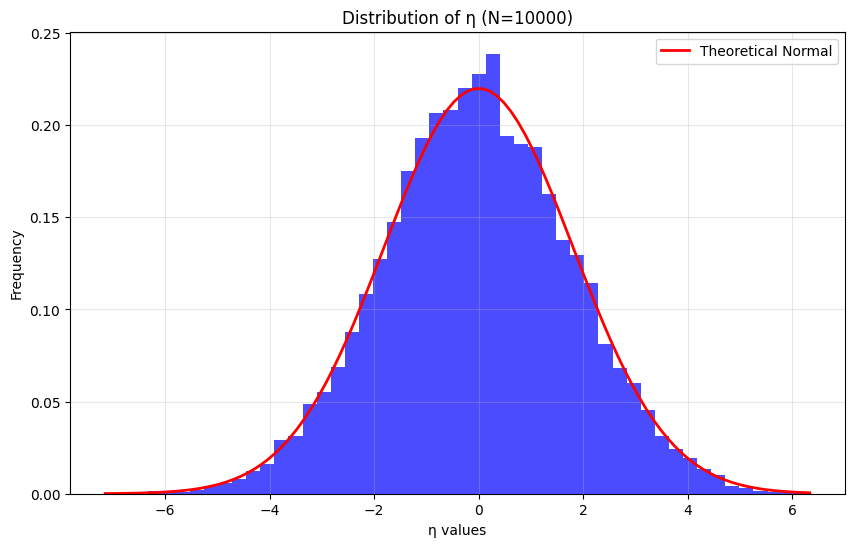

In [4]:
# distribution of eta
grv.plot_distribution() 

# Fractional Random Walk

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from src.fractional_random_walk import FractionalRandomWalk

In [6]:
N = 30000
H_values = {0.1, 0.3, 0.5, 0.7, 0.9}
eta_series = {}

for H in H_values:
    frw = FractionalRandomWalk(N, H)
    eta_series[H] = frw                     # dictionary of class instances chacterized by H
    frw.generate_eta_series()     
    print(f'H={H} done!')          # calculate eta series for each H

H=0.1 done!
H=0.5 done!
H=0.3 done!
H=0.7 done!
H=0.9 done!


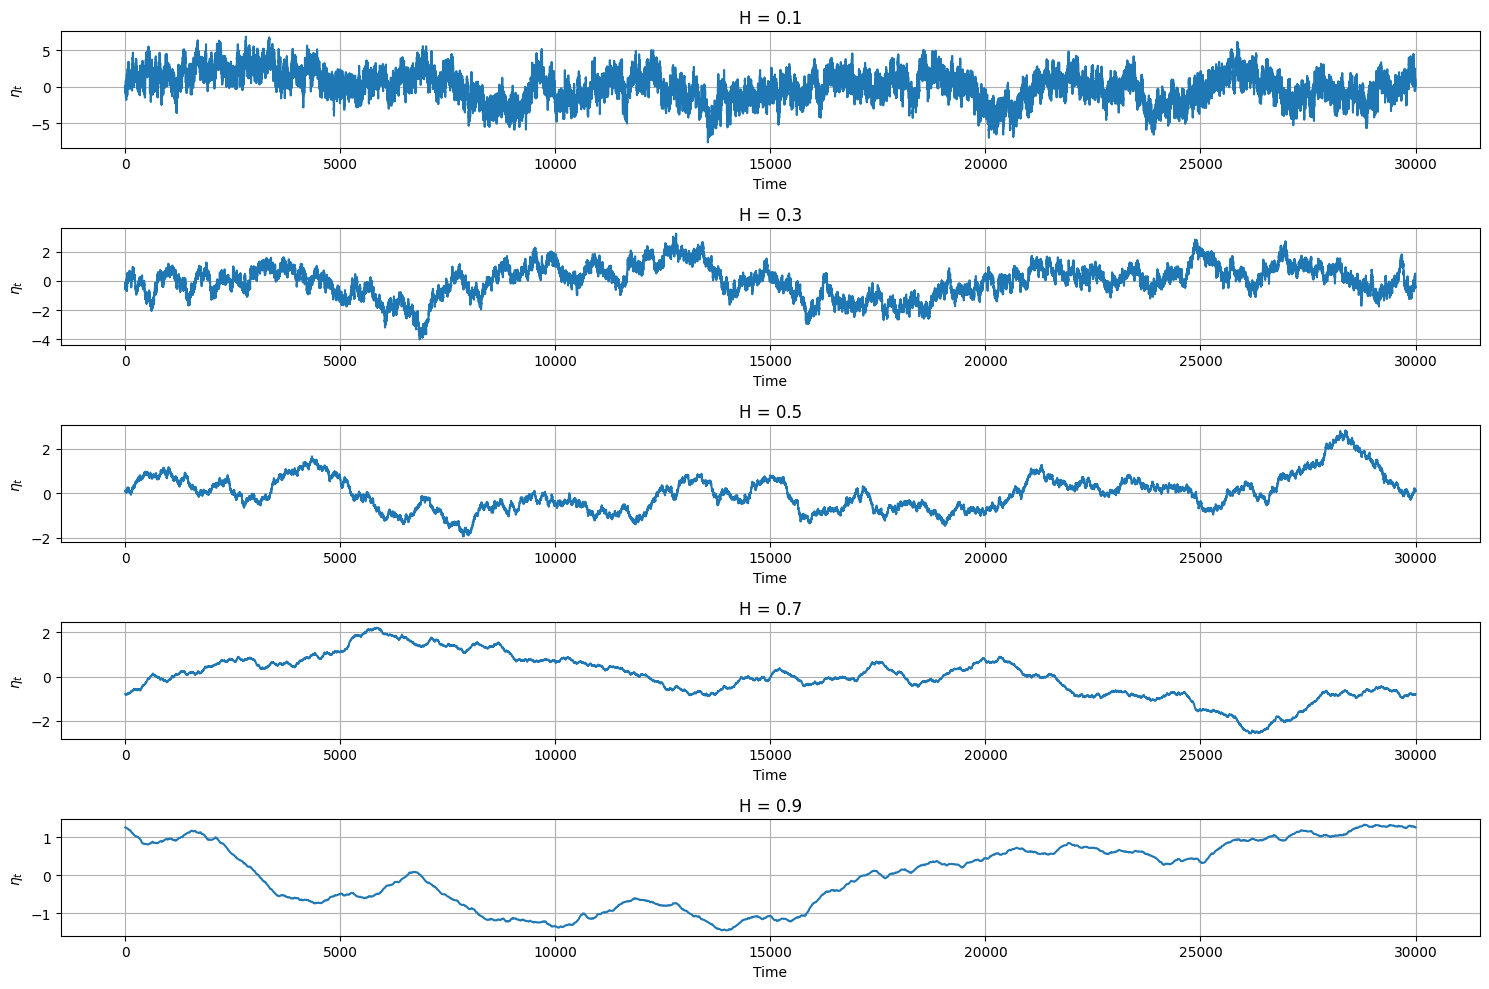

In [9]:
# plotting the eta series for different H values
plt.figure(figsize=(15, 10))
for i, (H, frw) in enumerate(sorted(eta_series.items()), 1):
    plt.subplot(5, 1, i)
    plt.plot(frw.time_series)
    plt.title(f'H = {H}')
    plt.xlabel('Time')
    plt.ylabel('$\eta_t$')
    plt.grid(True)
plt.tight_layout()
plt.savefig('figures/eta_series.png')
plt.show()
plt.close()

## Computing the correlation

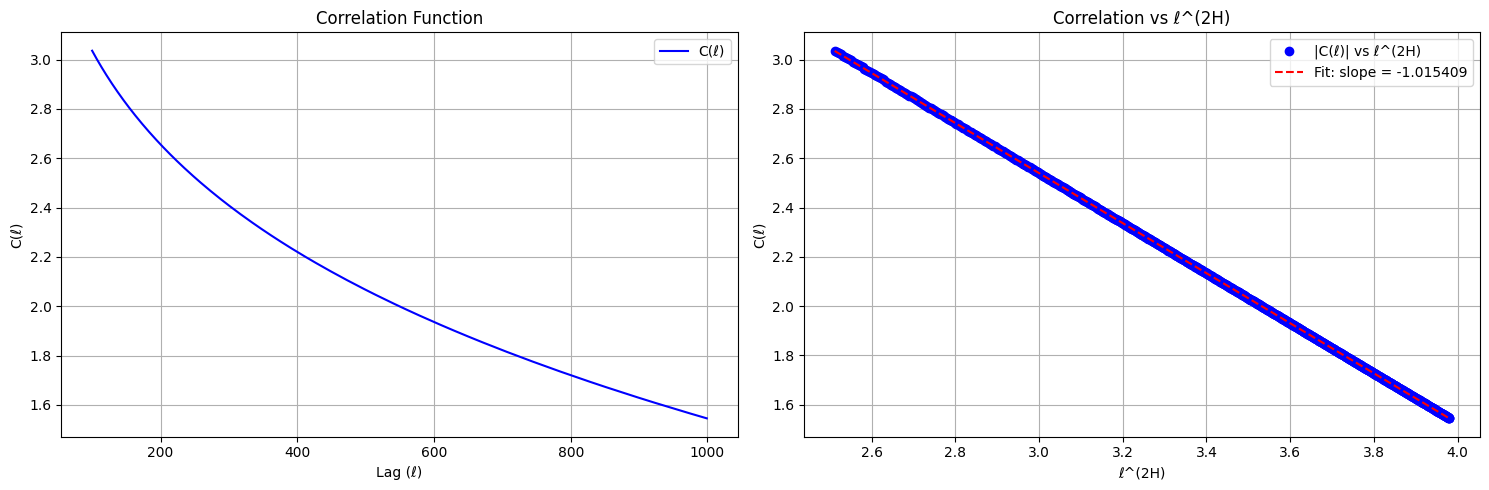

In [7]:
eta_series[0.1].plot_correlation_analysis(min_lag=100, max_lag=1000)

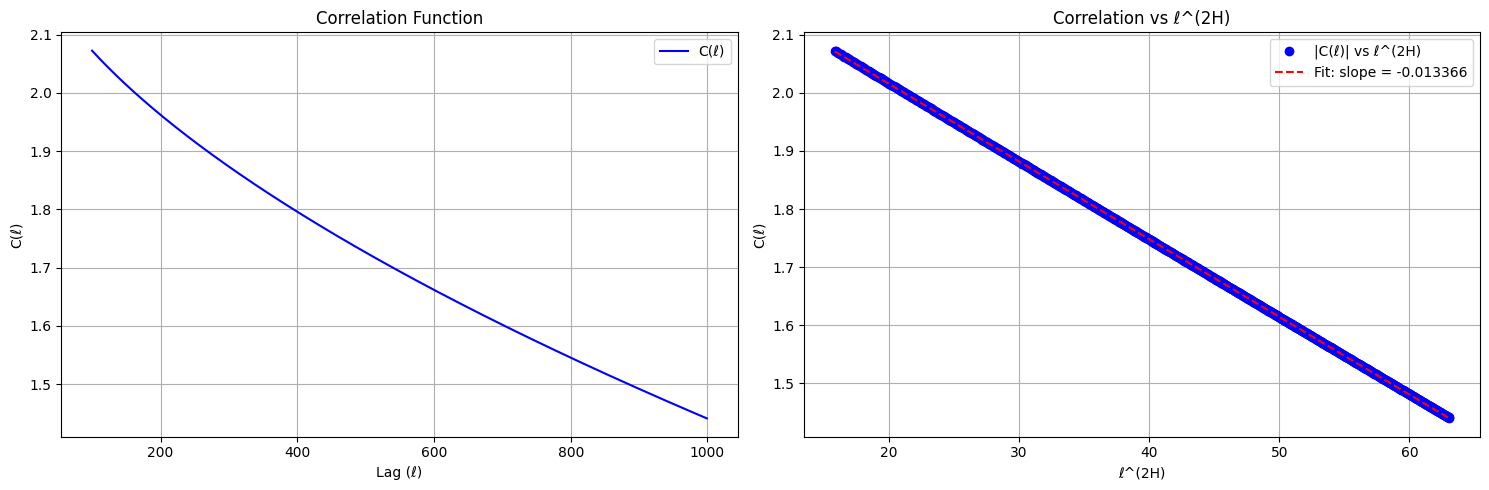

In [8]:
eta_series[0.3].plot_correlation_analysis(min_lag=100, max_lag=1000)

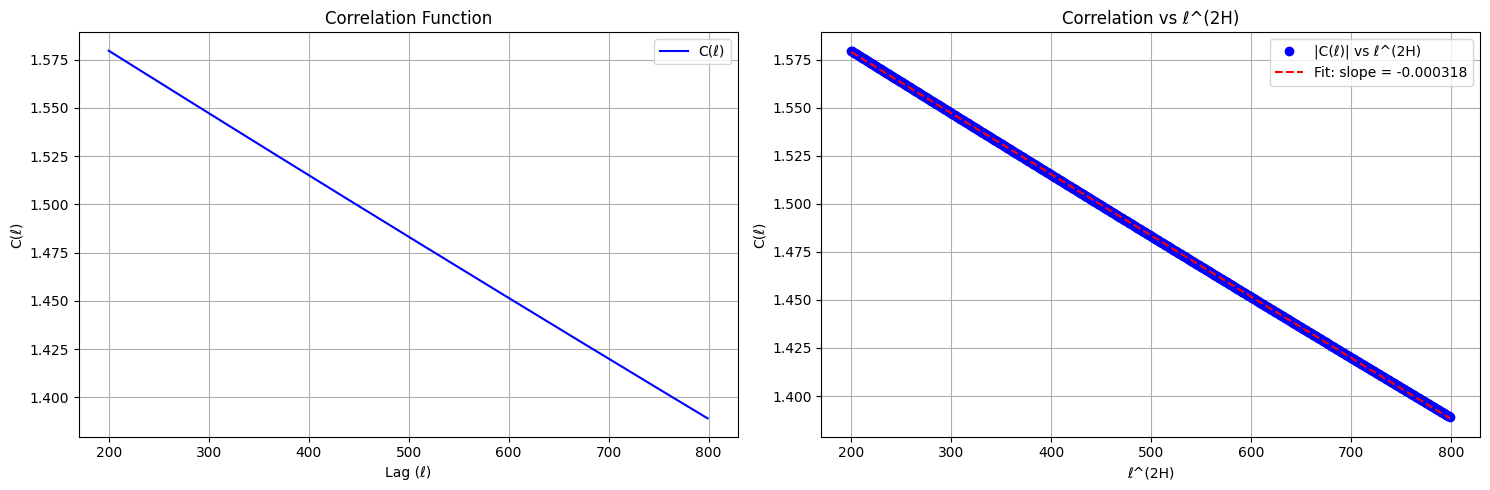

In [9]:
eta_series[0.5].plot_correlation_analysis(min_lag=200, max_lag=800)

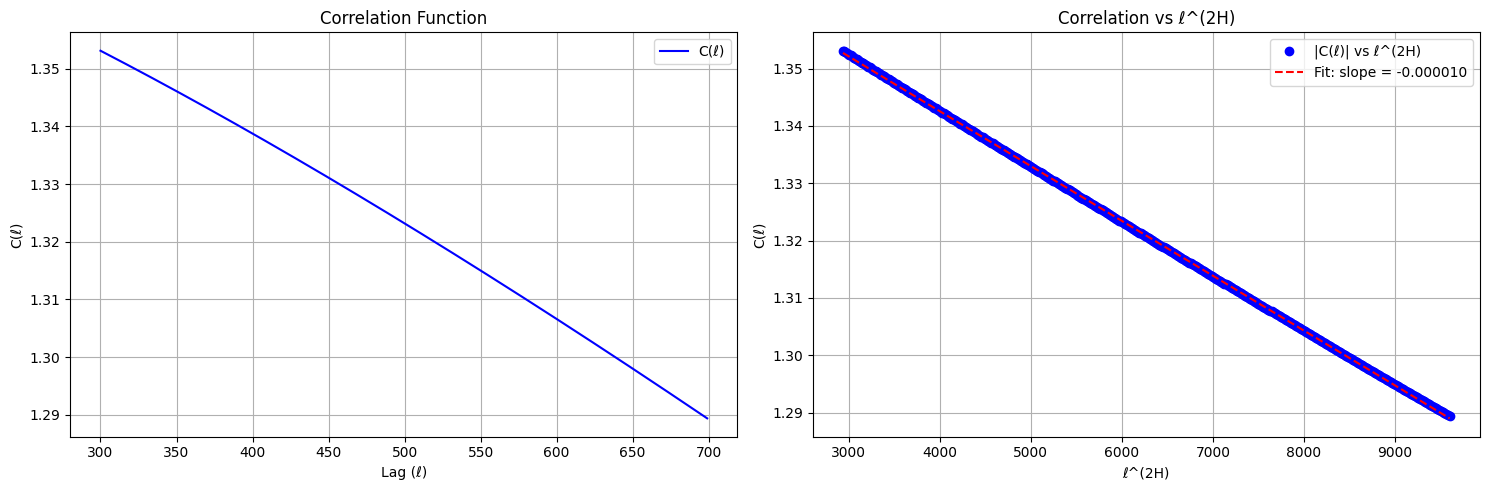

In [10]:
eta_series[0.7].plot_correlation_analysis(min_lag=300, max_lag=700)

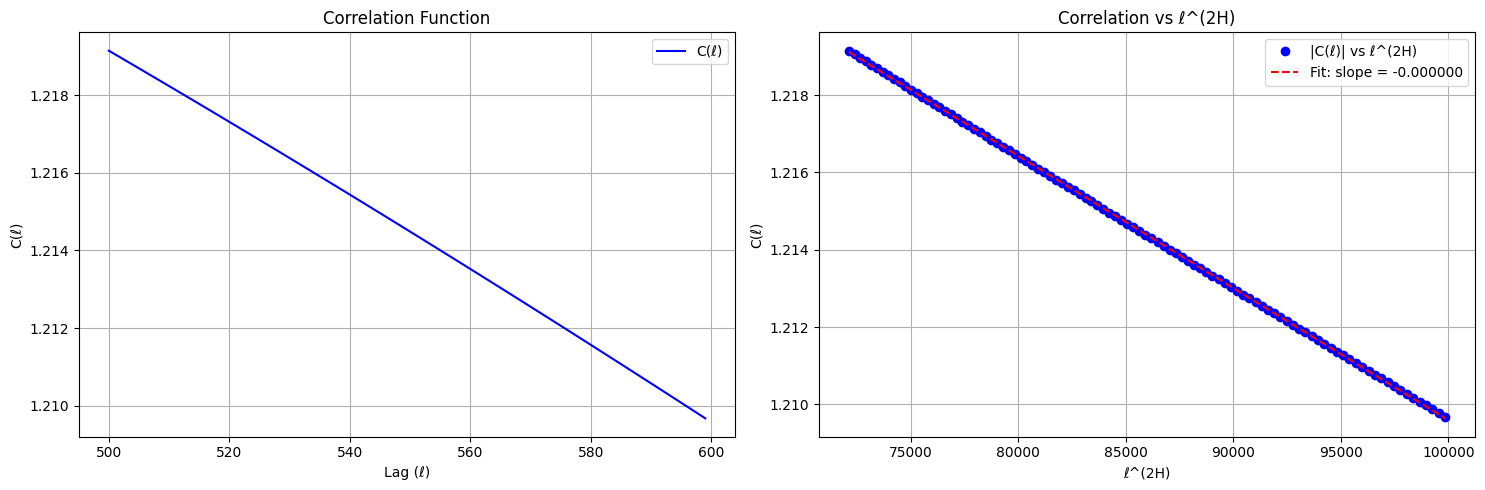

In [11]:
eta_series[0.9].plot_correlation_analysis(min_lag=500, max_lag=600)

## Variogram analysis

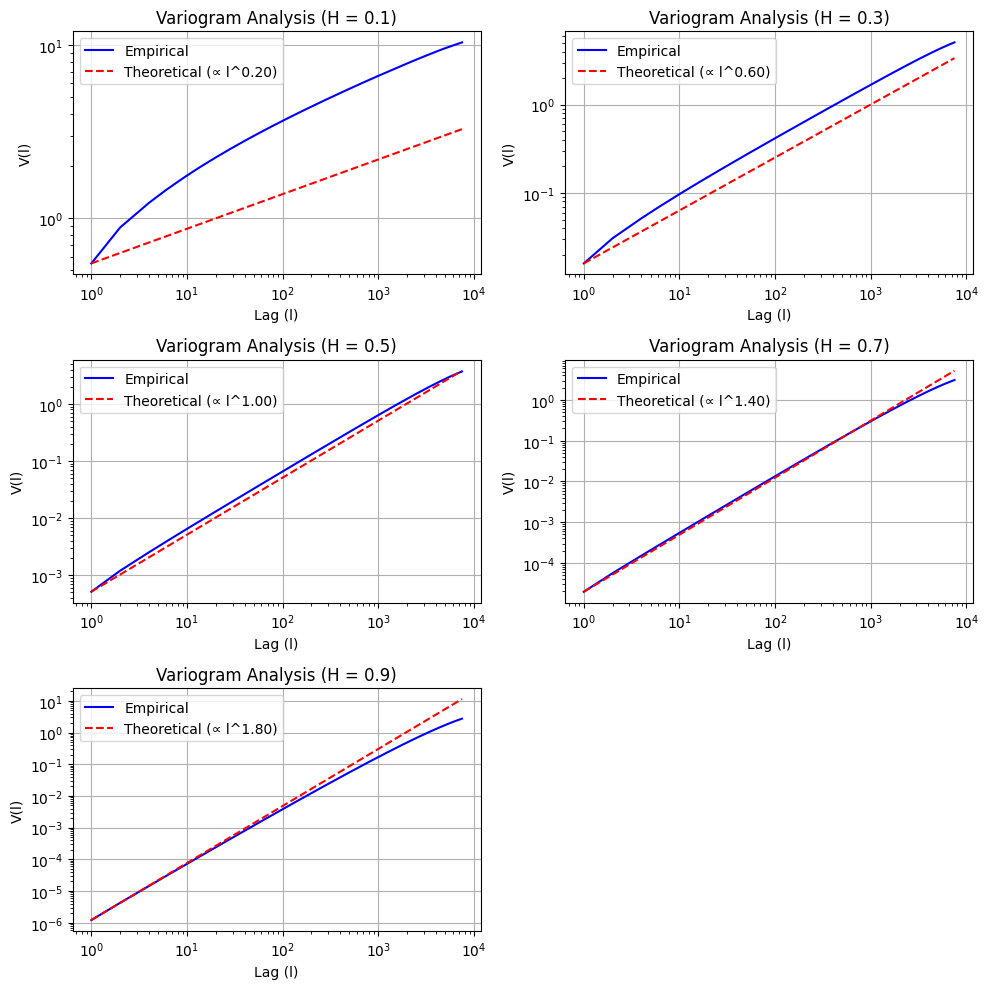

In [12]:
max_lag = N//4

plt.figure(figsize=(10, 10))
for i, H in enumerate(sorted(H_values), 1):
    plt.subplot(3, 2, i)
    lags, variogram = eta_series[H].compute_variogram(max_lag)

    plt.loglog(lags[1:], variogram[1:], 'b-', label='Empirical')

    # Plot theoretical scaling l^(2H)
    x = np.logspace(0, np.log10(max_lag), 100)
    y = x ** (2 * H) * variogram[1] # Scaled by variogram[1] to match the first empirical value thats at lag=1
    plt.loglog(x, y, 'r--', label=f'Theoretical (∝ l^{2*H:.2f})')

    plt.title(f'Variogram Analysis (H = {H})')
    plt.xlabel('Lag (l)')
    plt.ylabel('V(l)')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.savefig('figures/variogram_analysis.png')
plt.show()

### Plots of higher order variograms 

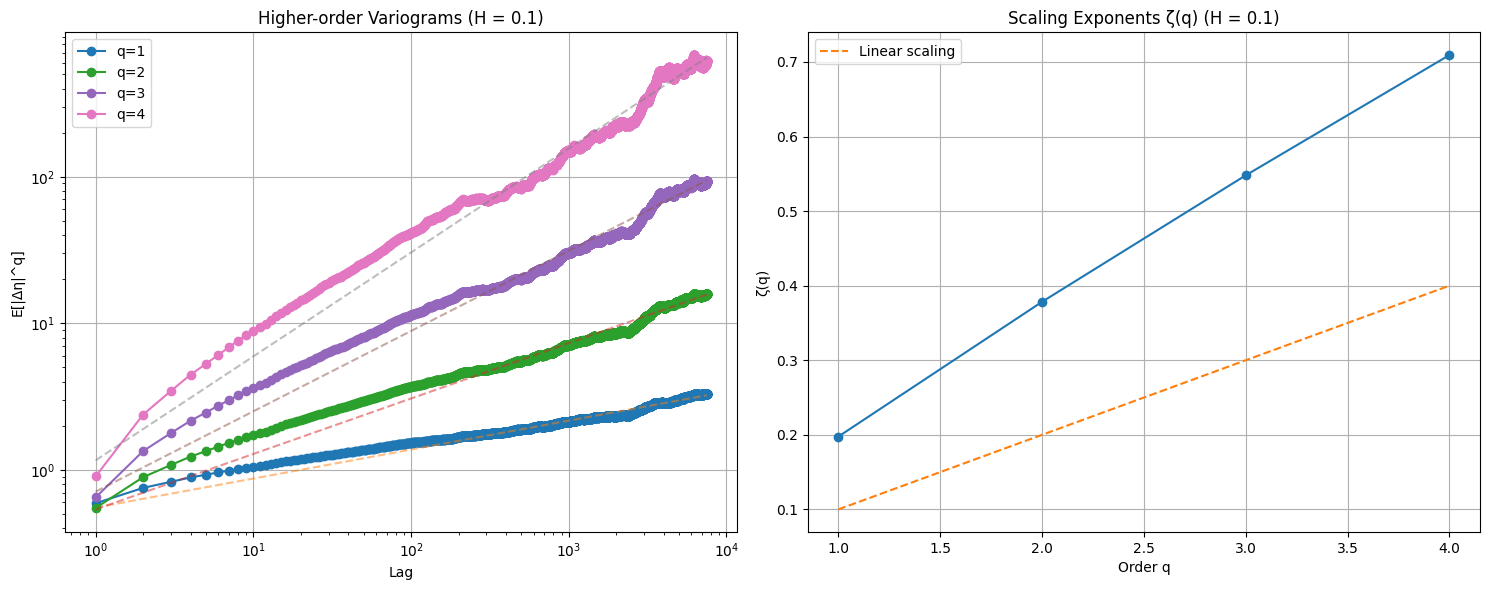

In [14]:
__, __ = eta_series[0.1].analyze_scaling_exponents()

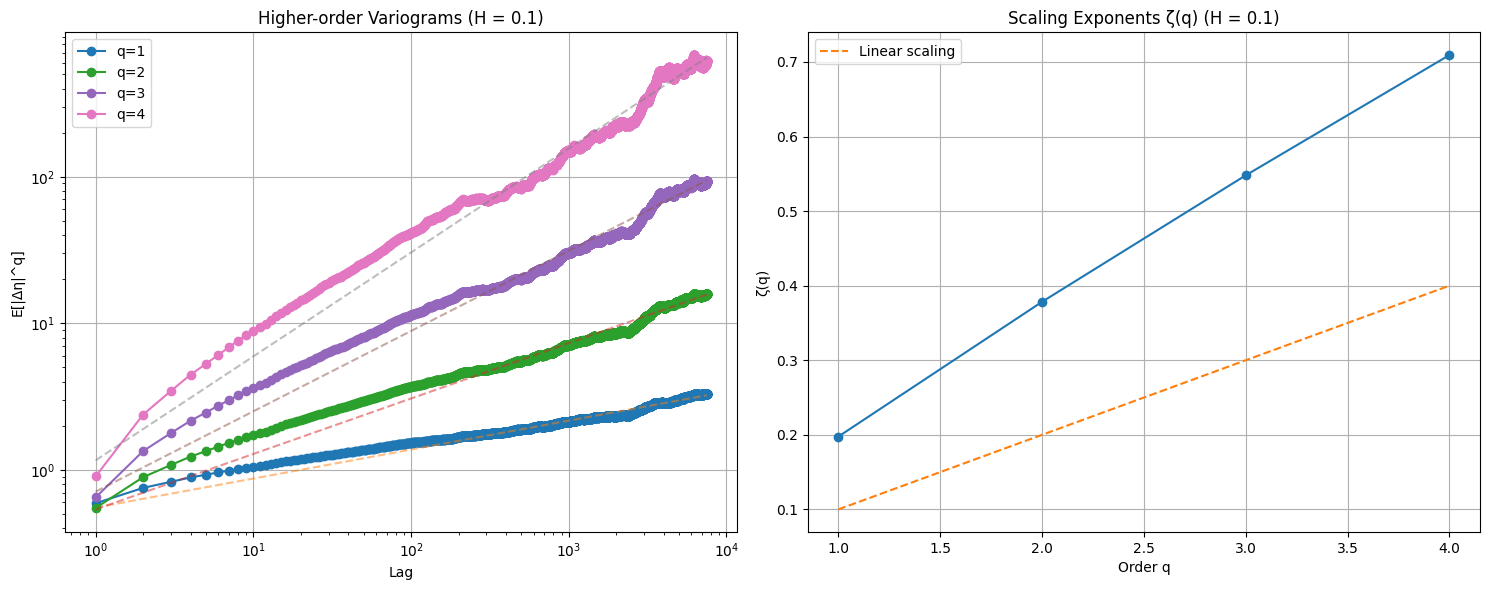

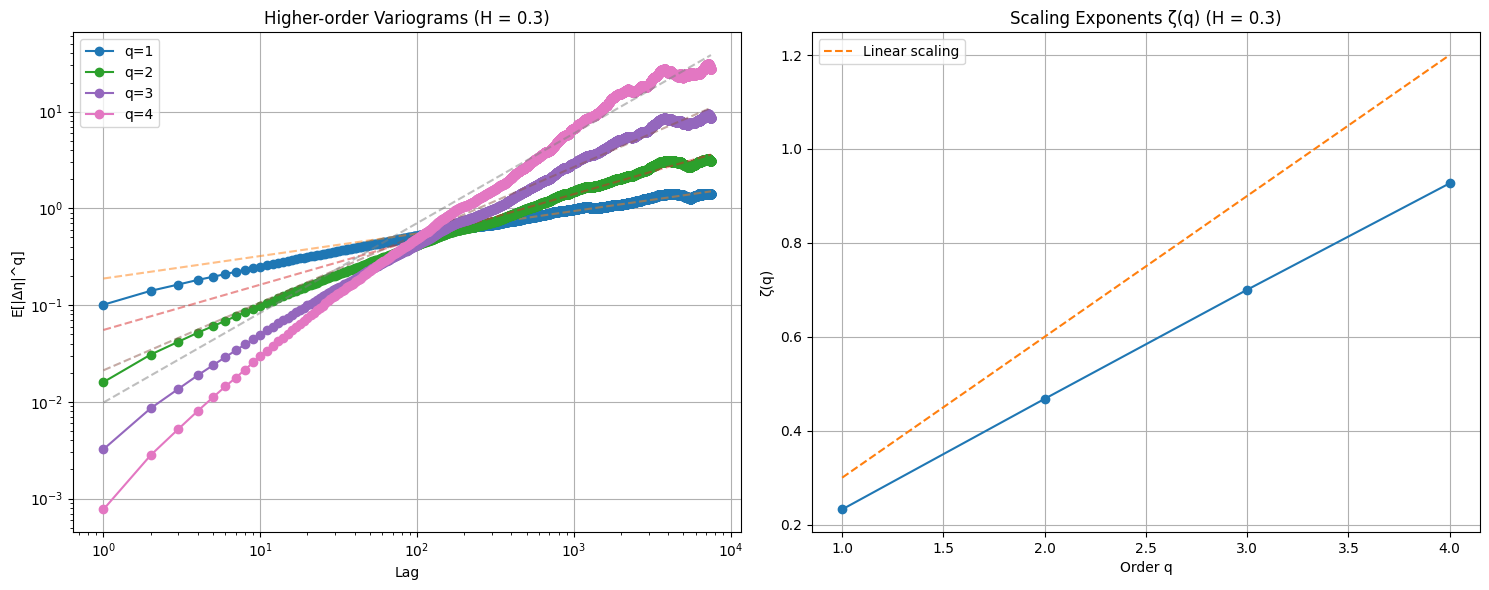

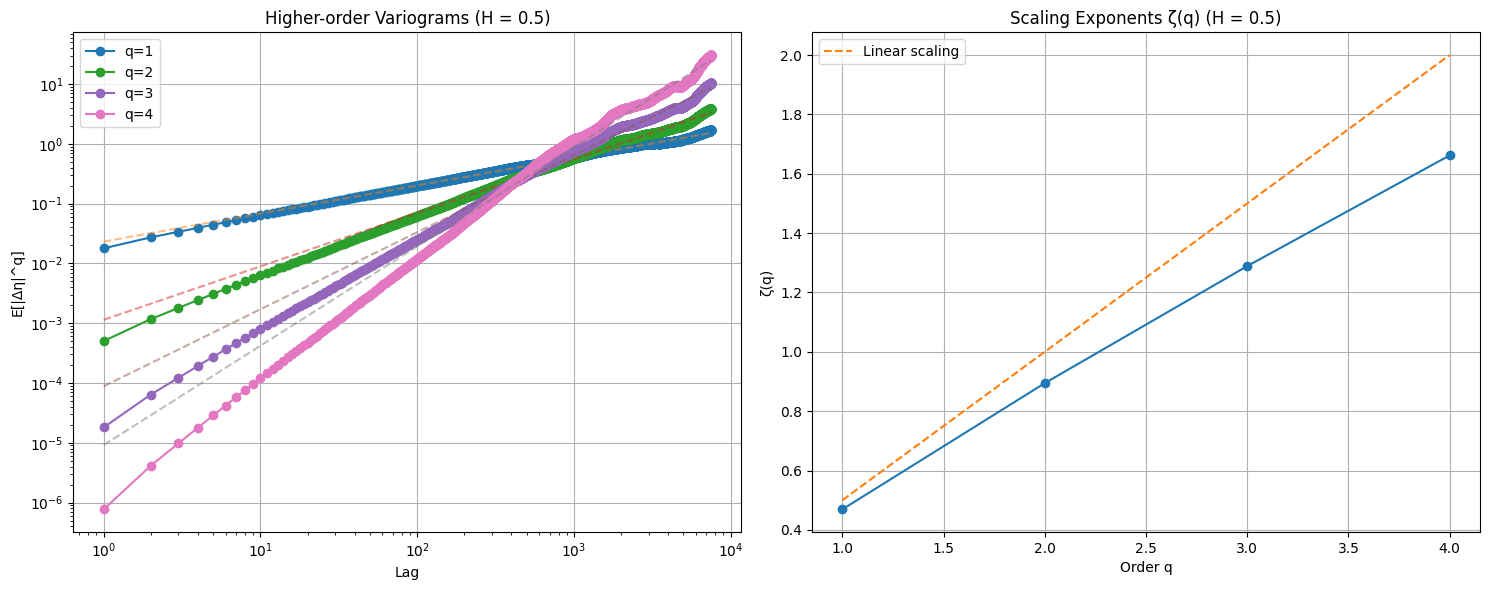

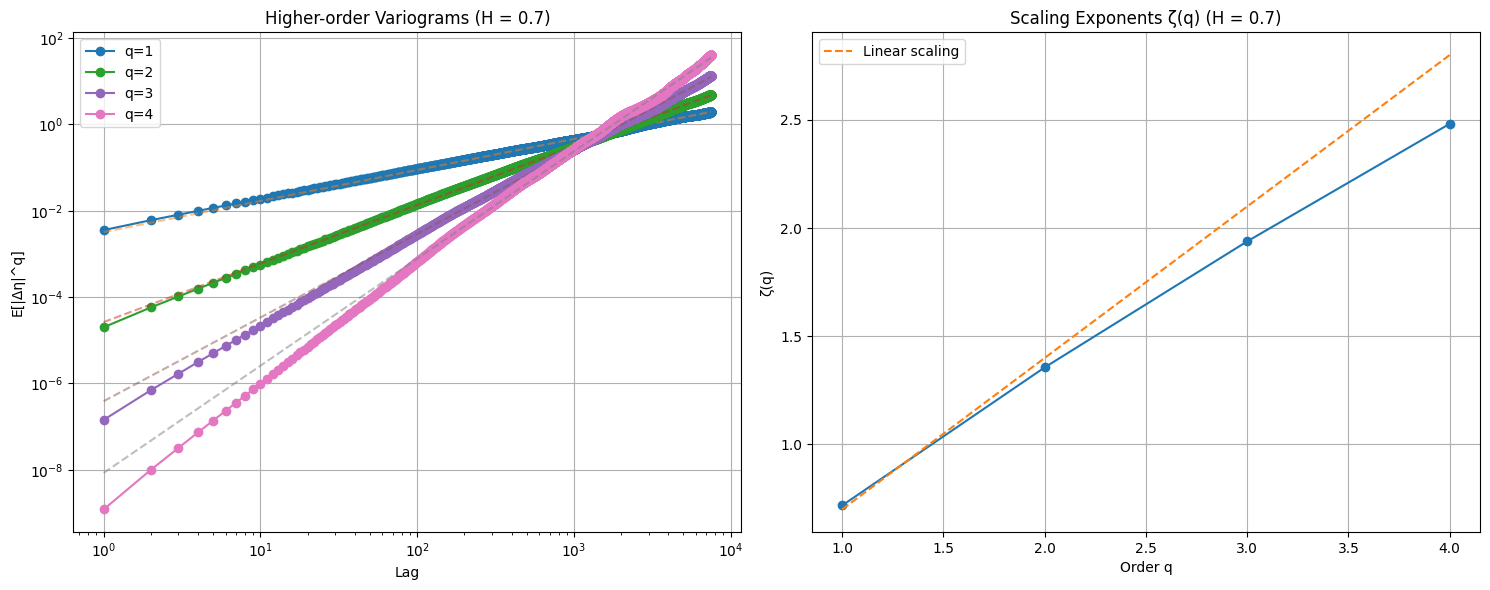

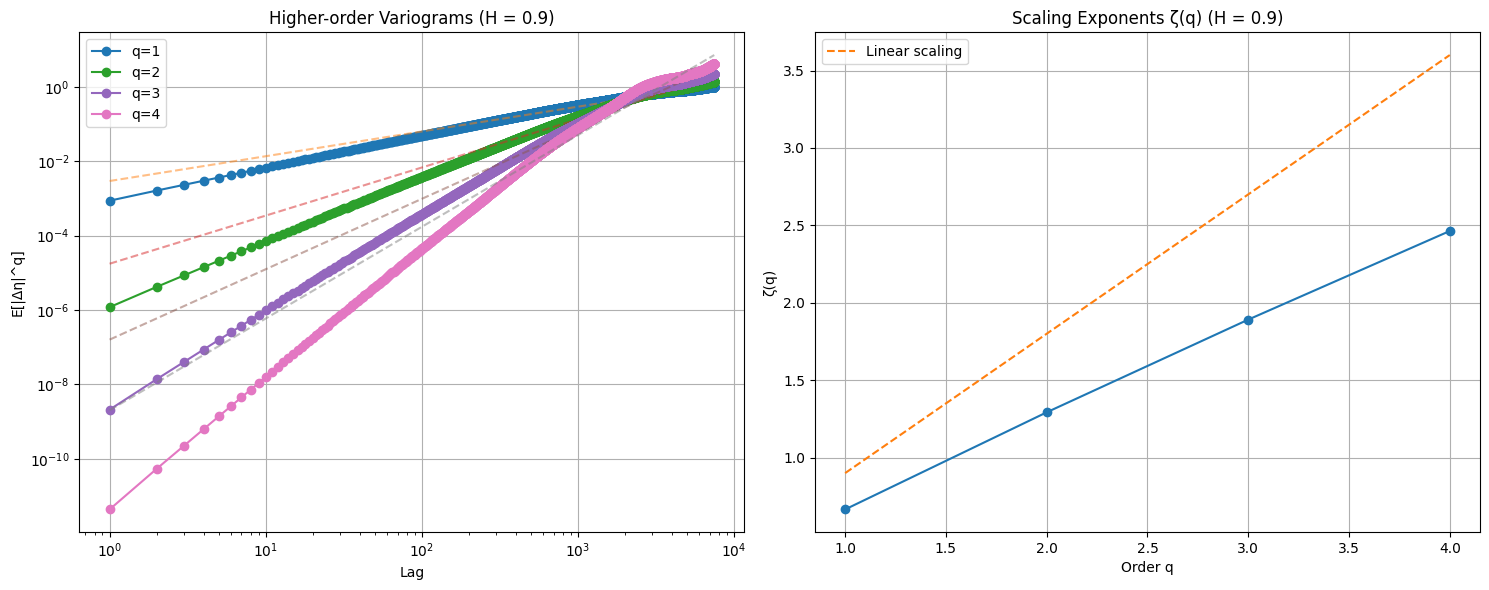

In [13]:
__, __ = eta_series[0.1].analyze_scaling_exponents()
__, __ = eta_series[0.3].analyze_scaling_exponents()
__, __ = eta_series[0.5].analyze_scaling_exponents()
__, __ = eta_series[0.7].analyze_scaling_exponents()
__, __ = eta_series[0.9].analyze_scaling_exponents()

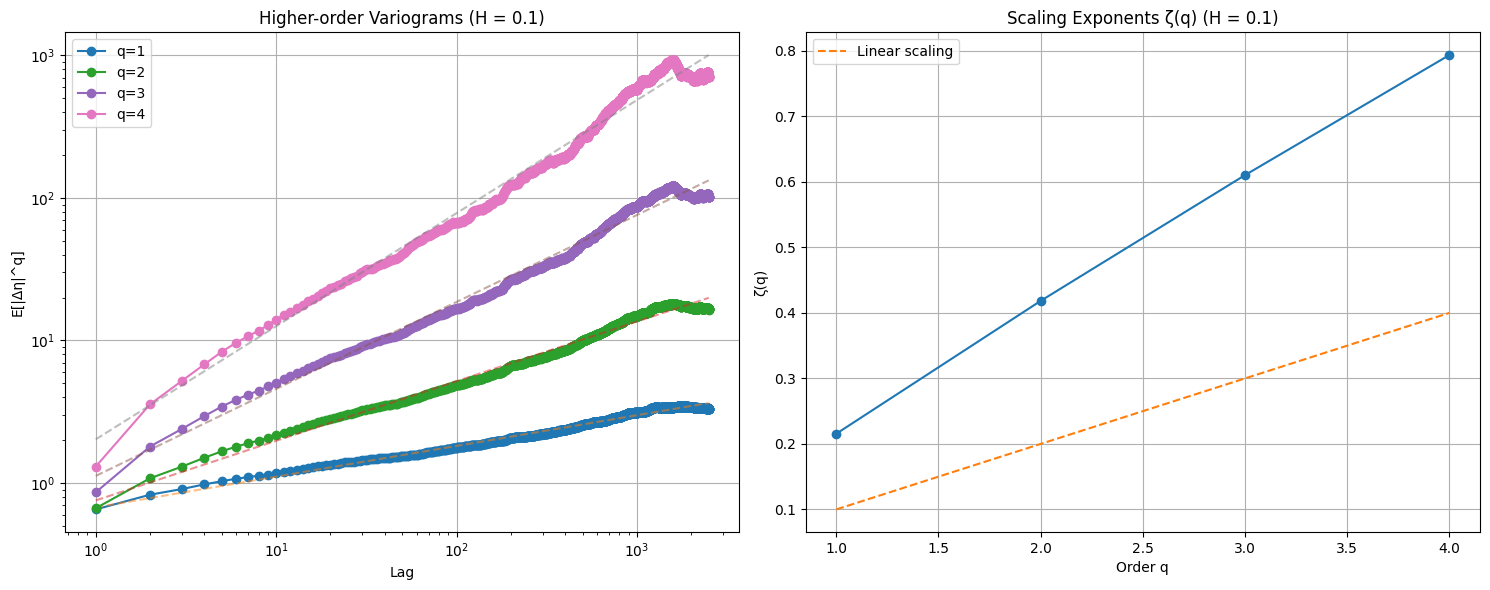

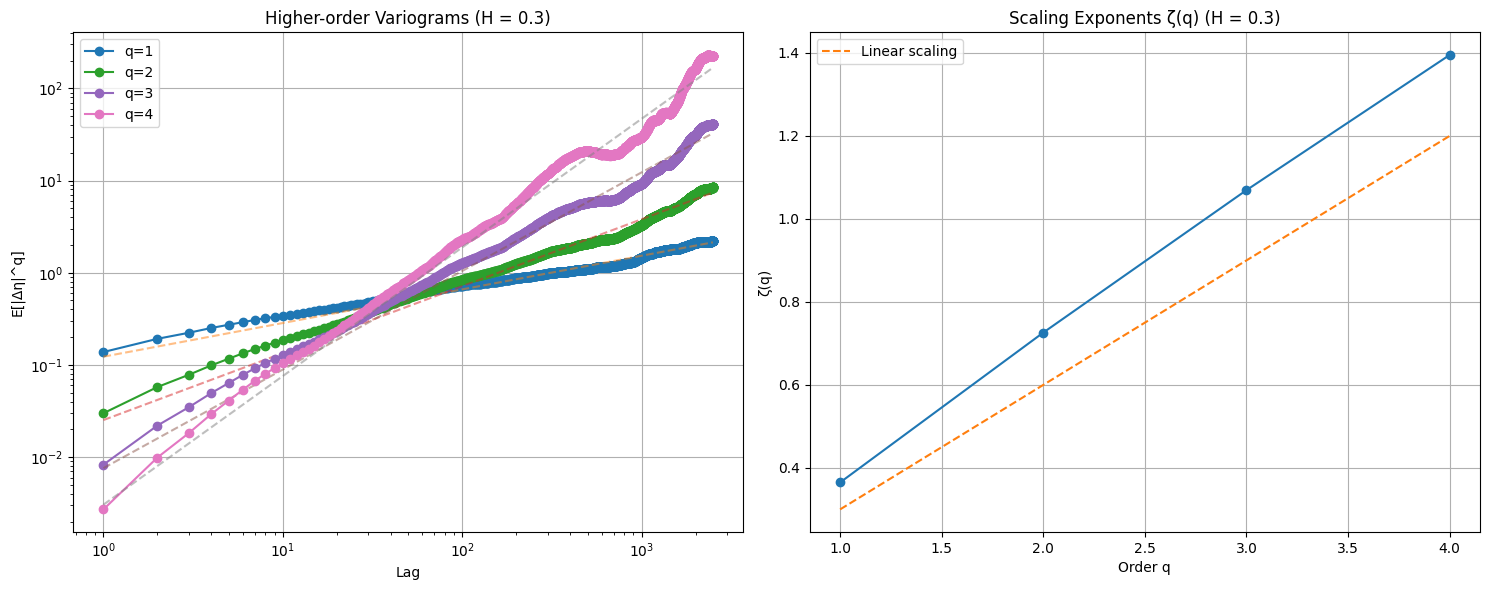

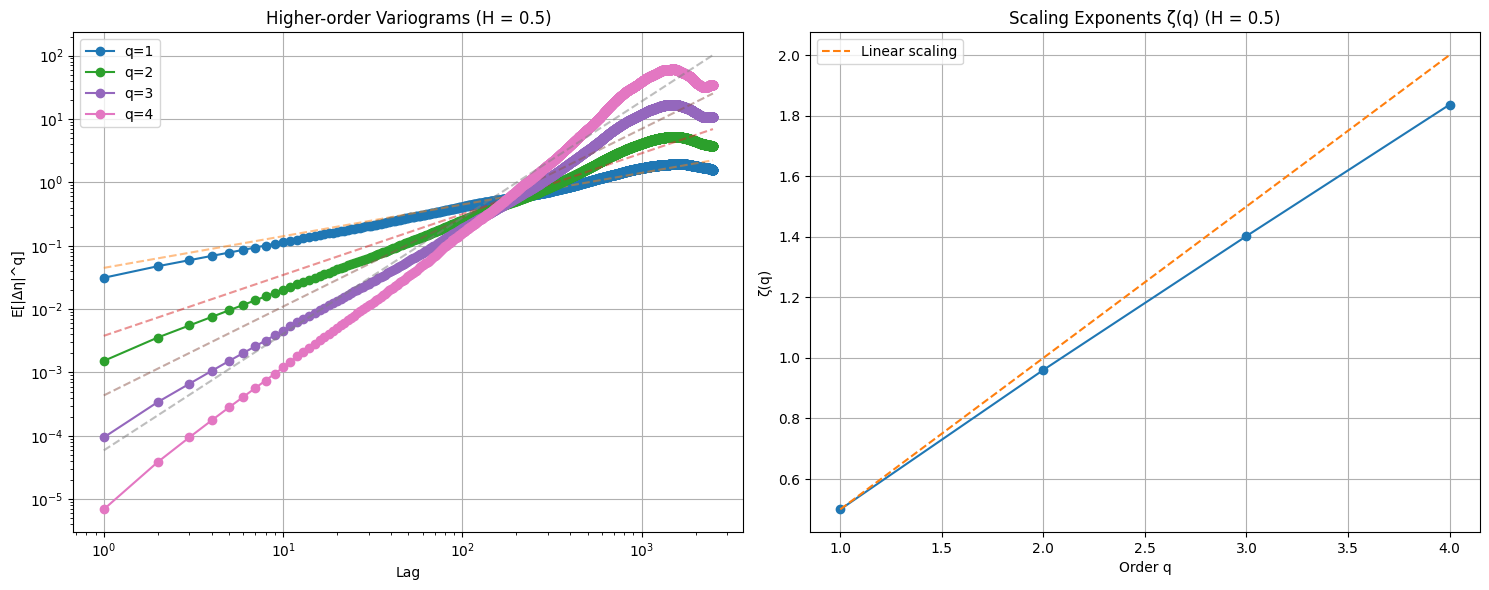

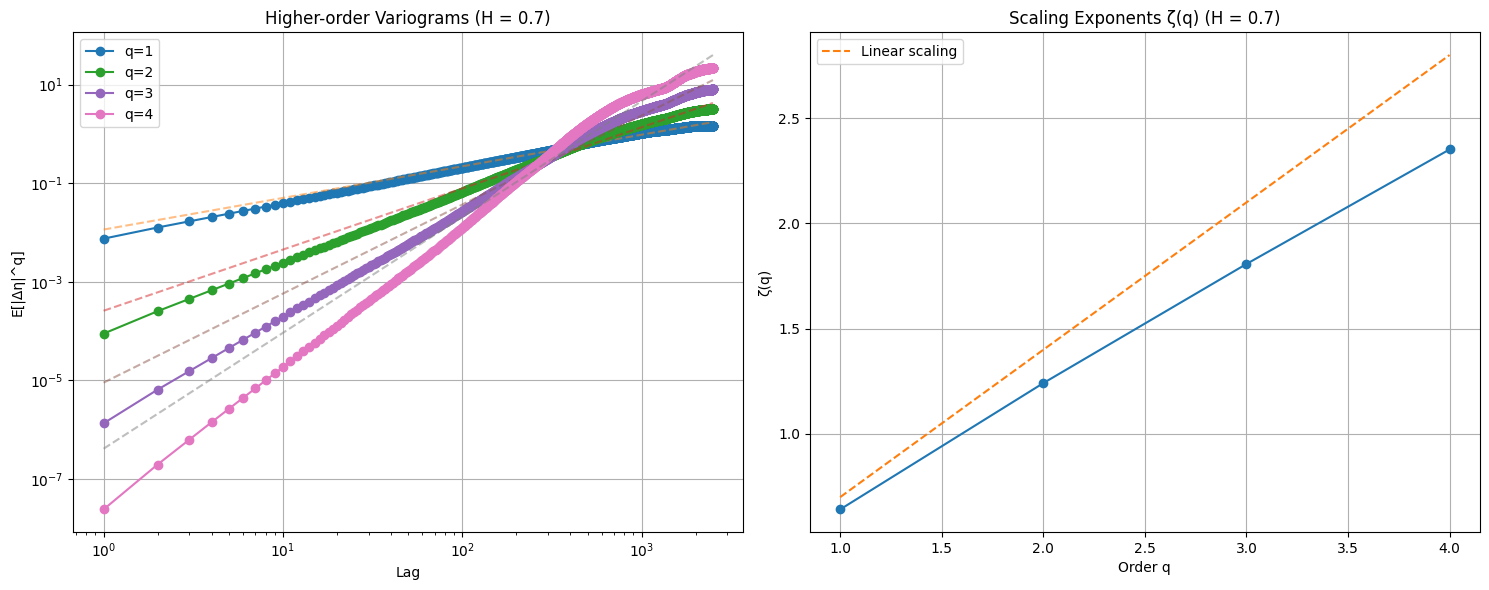

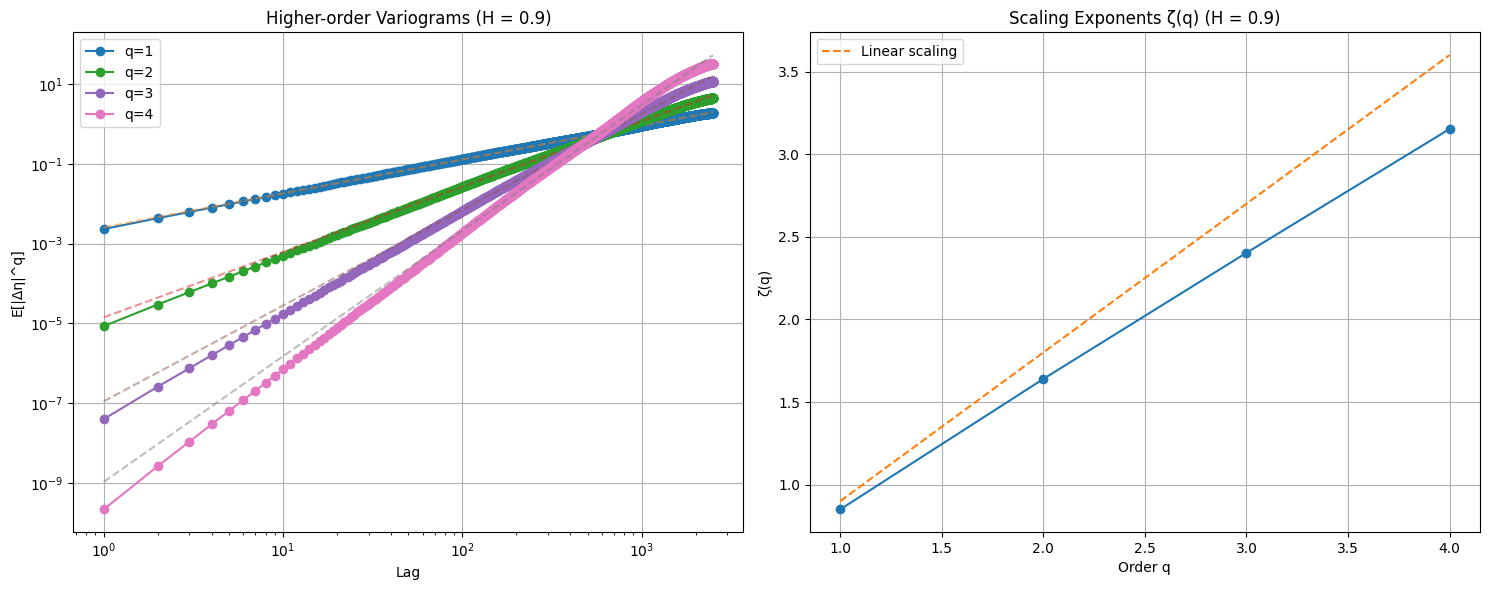

In [4]:
__, __ = eta_series[0.1].analyze_scaling_exponents()
__, __ = eta_series[0.3].analyze_scaling_exponents()
__, __ = eta_series[0.5].analyze_scaling_exponents()
__, __ = eta_series[0.7].analyze_scaling_exponents()
__, __ = eta_series[0.9].analyze_scaling_exponents()

# Rough volatilities in price returns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.price_returns import PriceReturns

### Initial try

In [ ]:
returns[0.6].verify_return_variance(n_simulations=30000)

Empirical variance: 0.971901
Theoretical variance: 1.000000
Relative error: 0.028099


In [16]:
returns[0].analyze_drawdowns()

{'max_drawdown': 1.687497036423553,
 'start_idx': 12,
 'bottom_idx': 16,
 'drawdown_length': 4,
 'drawdown_series': array([ 0.        , -0.81309009, -0.72599977, ...,  0.16763971,
         0.16669583,  0.16871851])}

In [15]:
returns[0.3].analyze_drawdowns()

{'max_drawdown': 85.55226761729716,
 'start_idx': 9,
 'bottom_idx': 9718,
 'drawdown_length': 9709,
 'drawdown_series': array([ 0.        ,  0.71667374,  1.84763176, ..., 74.14106327,
        73.80631648, 74.28078718])}

In [14]:
returns[0.6].analyze_drawdowns()

{'max_drawdown': 8.524900526033468,
 'start_idx': 2591,
 'bottom_idx': 6615,
 'drawdown_length': 4024,
 'drawdown_series': array([0.        , 0.        , 0.        , ..., 1.12683615, 1.13472996,
        1.12646871])}

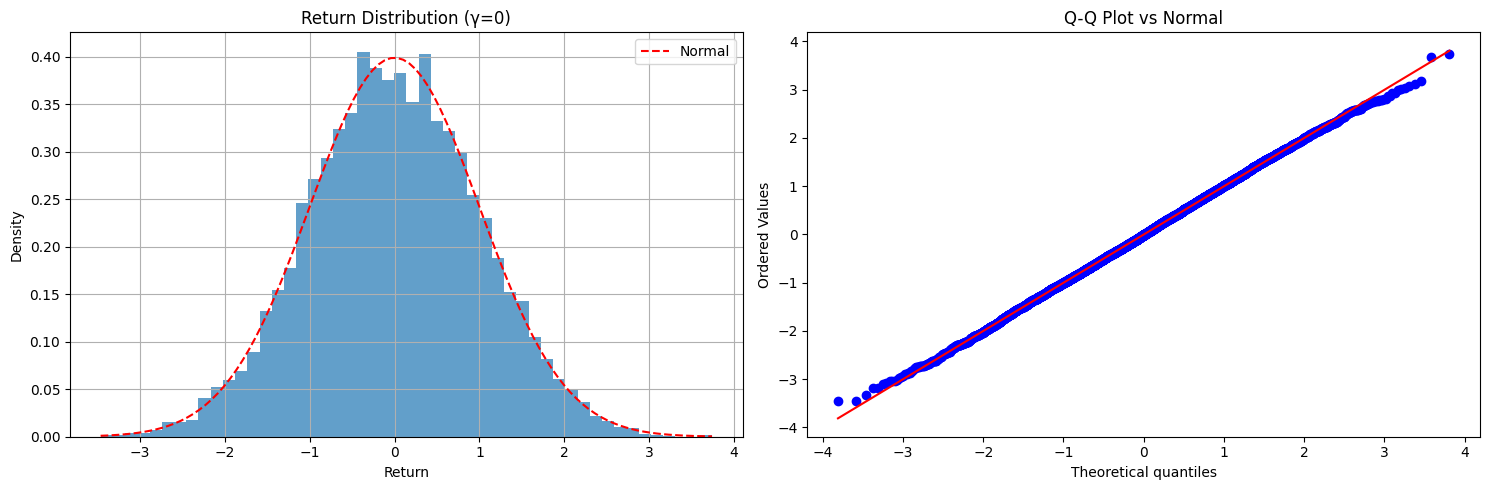

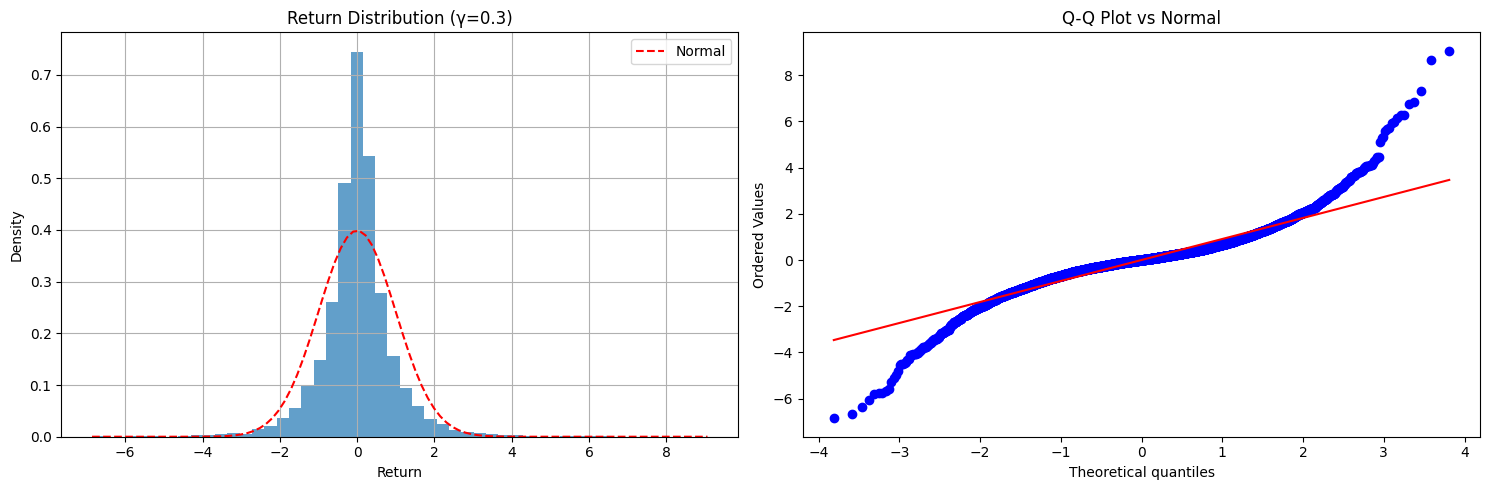

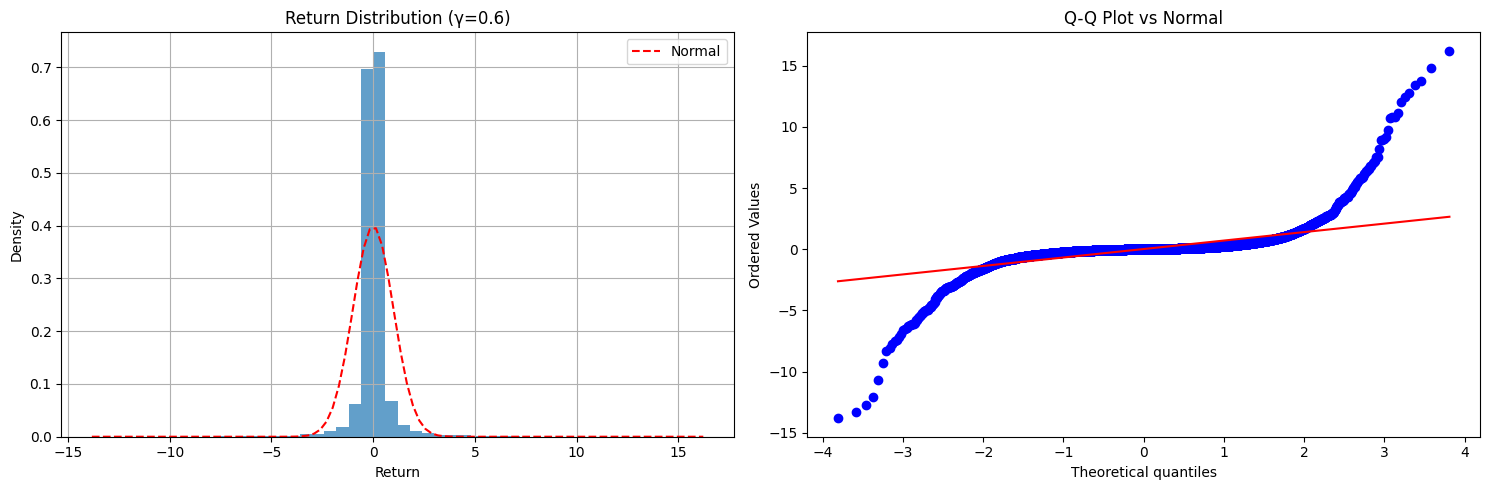

In [18]:
returns[0].plot_return_distribution()
returns[0.3].plot_return_distribution()
returns[0.6].plot_return_distribution()

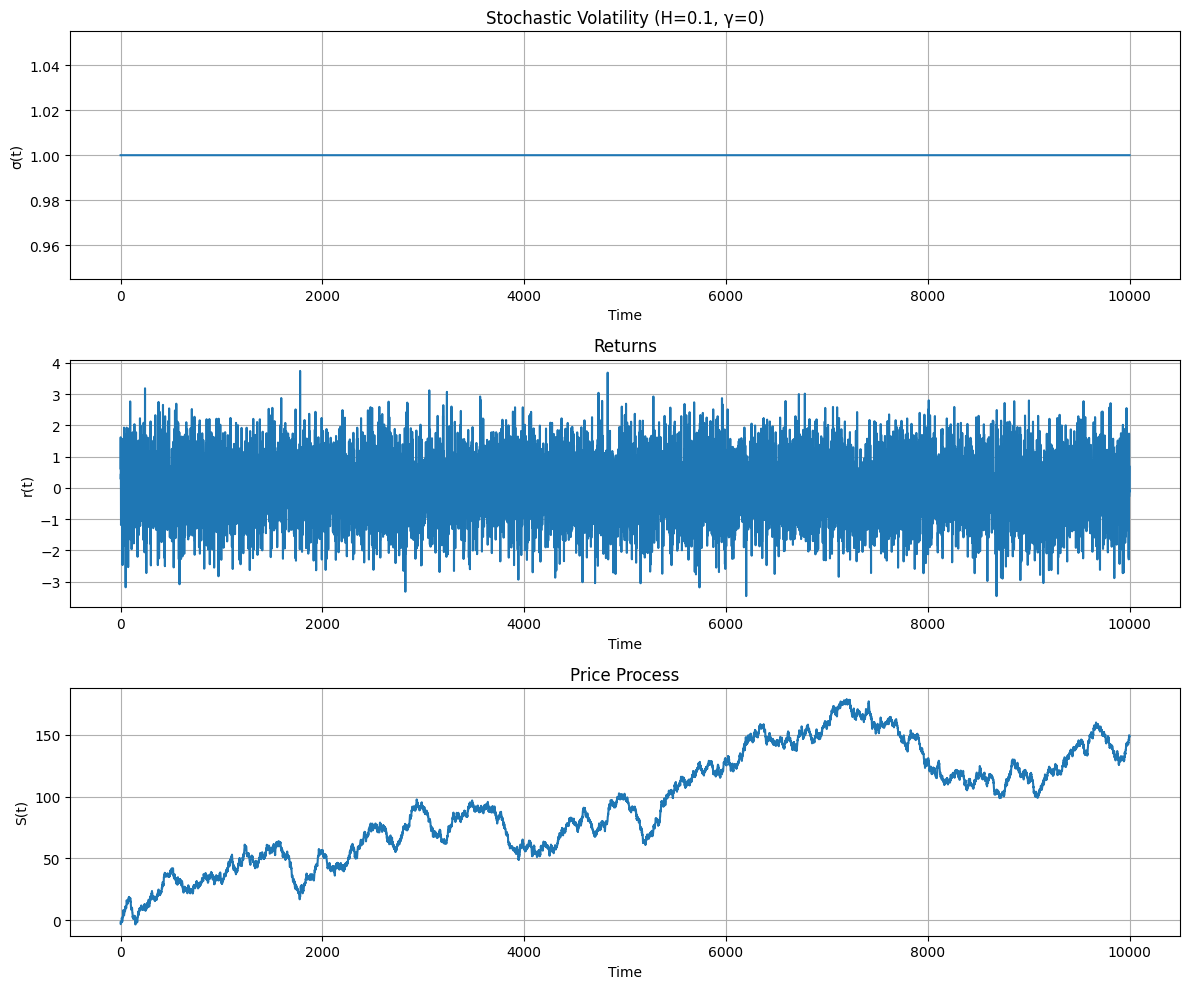

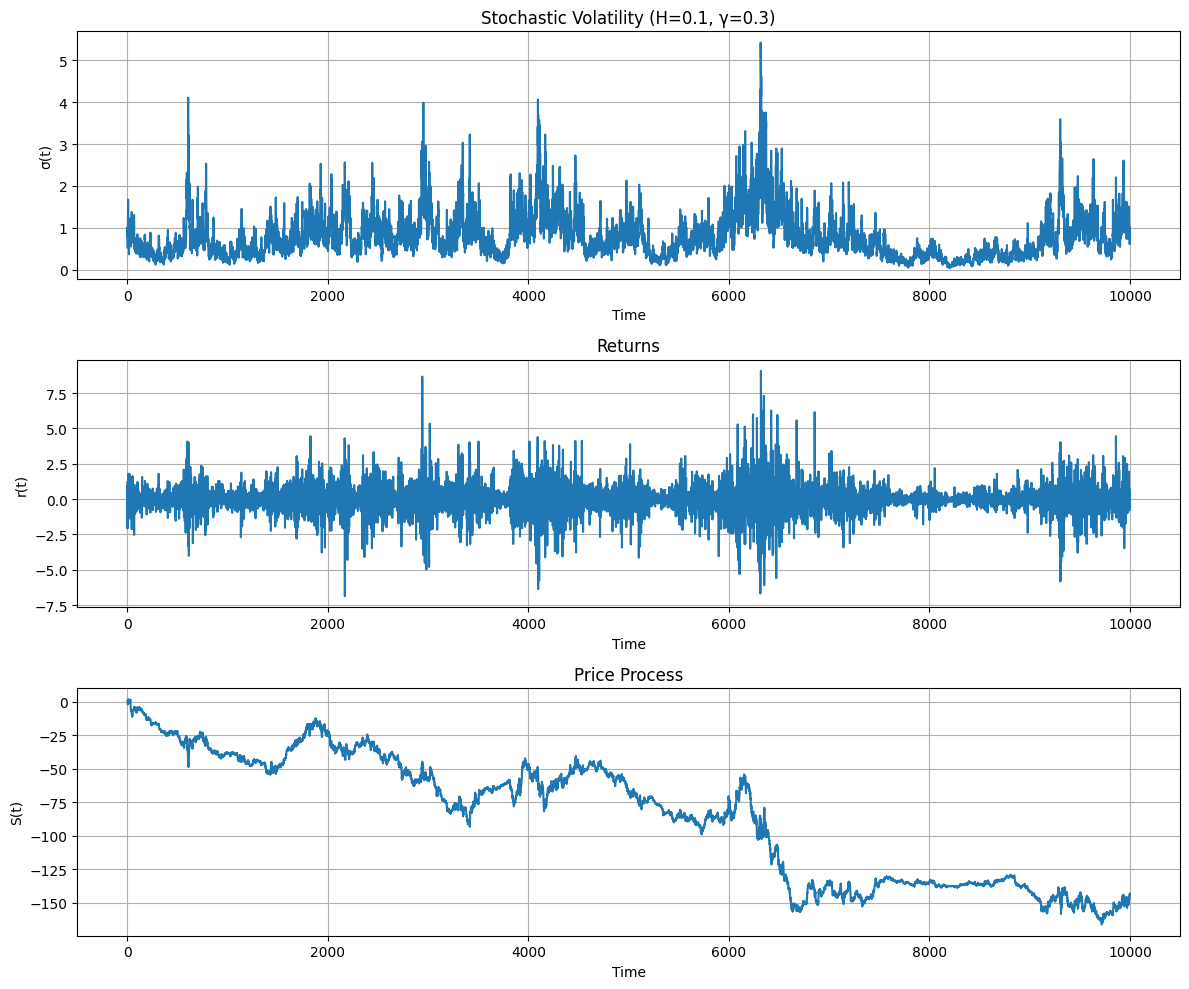

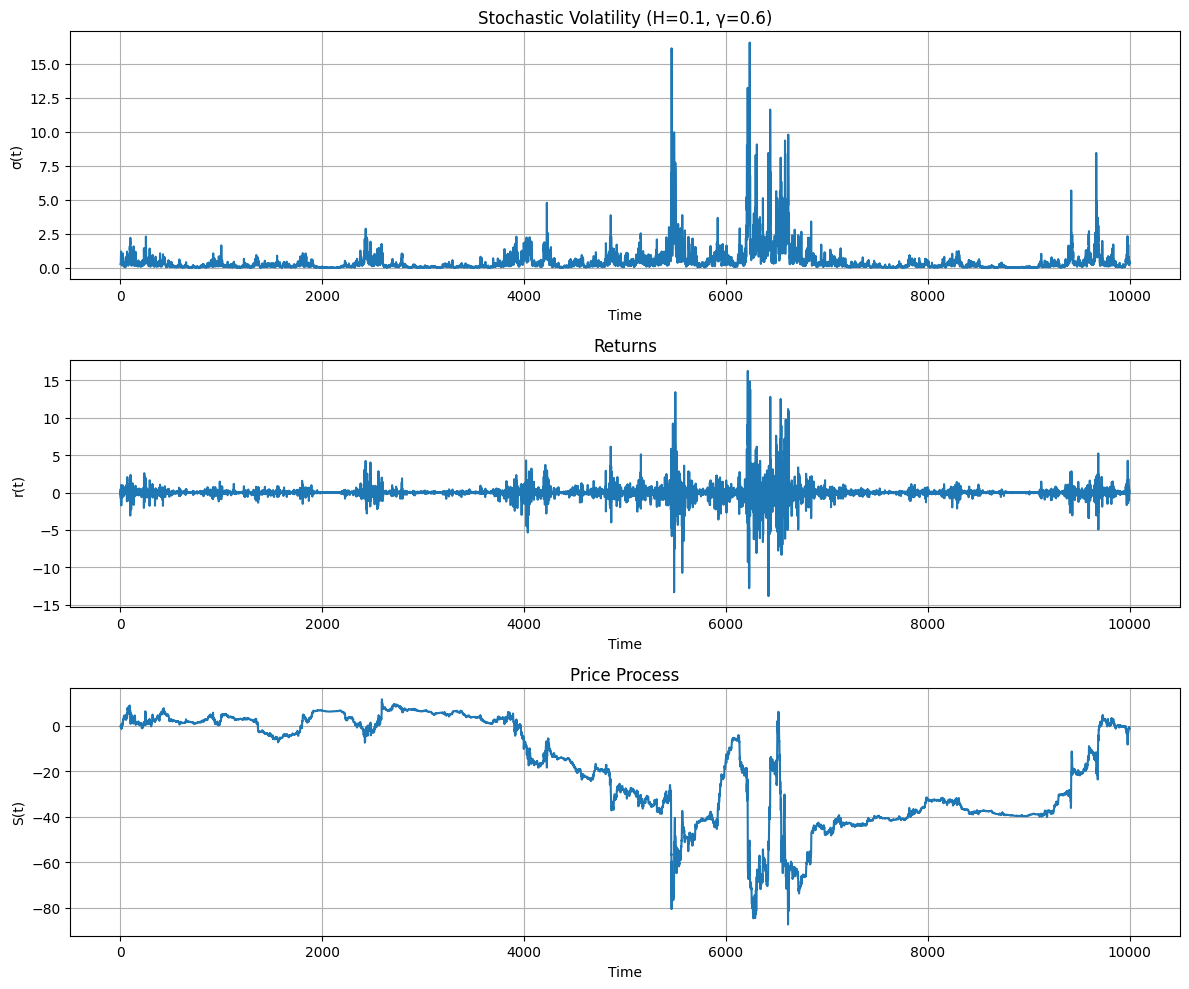

In [17]:
returns[0].plot_price_process()
returns[0.3].plot_price_process()
returns[0.6].plot_price_process()

## Plot process

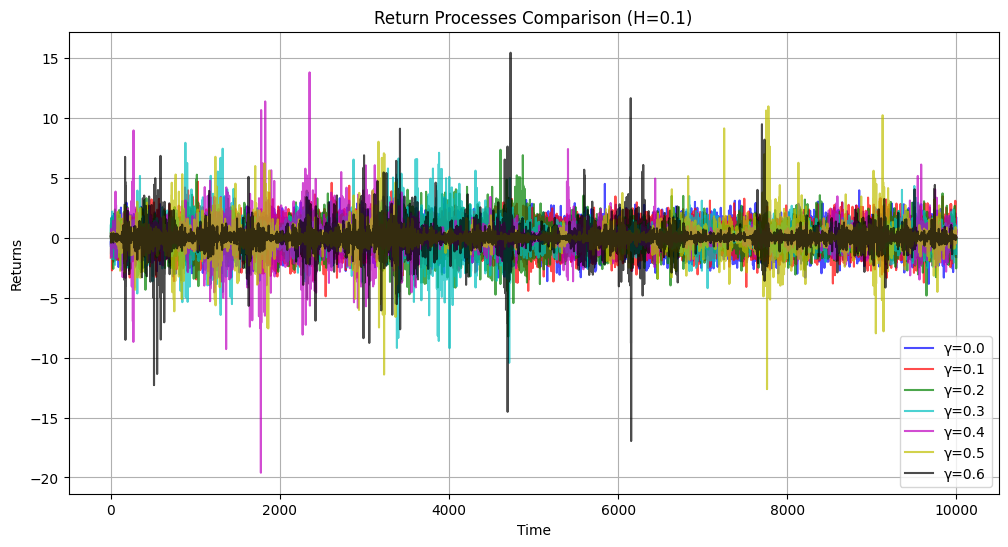

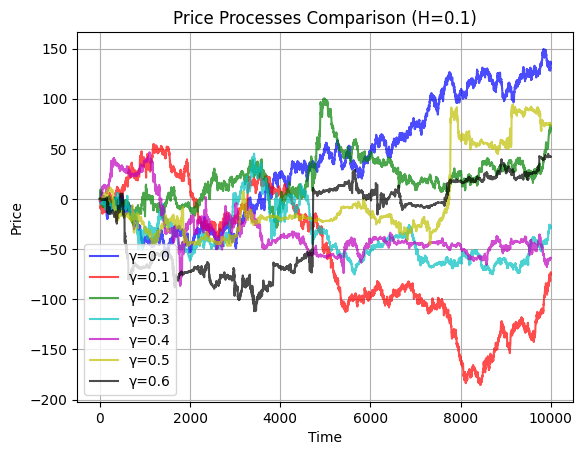

In [2]:
gamma_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
return_process = {};

plt.figure(figsize=(12, 6))

N=10000
H_val = 0.1

np.random.seed(42)

for gamma, color in zip(gamma_values, colors):
    return_process[gamma] = PriceReturns(N=N, H_val=H_val, sigma=1, gamma=gamma)
    return_process[gamma].generate_returns()
    return_process[gamma].generate_prices()
    plt.plot(return_process[gamma].returns, color, alpha=0.7, label=f'γ={gamma}')
    
plt.title(f'Return Processes Comparison (H={H_val})')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.savefig('figures/return_processes_comparison.png')
plt.show() 

for gamma, color in zip(gamma_values, colors):
    return_process[gamma].generate_prices()
    plt.plot(return_process[gamma].prices, color, alpha=0.7, label=f'γ={gamma}')
    
plt.title(f'Price Processes Comparison (H={H_val})')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('figures/price_processes_comparison.png')
plt.show() 

## Drawdown Analysis

The drawdown seems to be decreasing as a function of $\gamma$. Is this to be expected?

In [3]:
print(return_process[0].analyze_drawdowns())
print(return_process[0.3].analyze_drawdowns())
print(return_process[0.6].analyze_drawdowns())

{'max_drawdown': 64.49575873169823, 'start_idx': 32, 'bottom_idx': 1453, 'drawdown_length': 1421, 'drawdown_series': array([ 0.        ,  0.30549946,  0.90288052, ..., 14.48435859,
       12.77082886, 14.39074867])}
{'max_drawdown': 236.53011035158443, 'start_idx': 1507, 'bottom_idx': 8116, 'drawdown_length': 6609, 'drawdown_series': array([  0.        ,   0.76946124,   1.12974266, ..., 122.48355274,
       122.0722957 , 121.92754991])}
{'max_drawdown': 74.53130650228618, 'start_idx': 3468, 'bottom_idx': 4719, 'drawdown_length': 1251, 'drawdown_series': array([0.        , 0.0148304 , 0.        , ..., 6.45442154, 7.66464363,
       7.66820772])}


In [11]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [15]:
del(analyze_gamma_drawdowns)
def analyze_gamma_drawdowns(N=10000, H_val=0.1, sigma=1.0, n_simulations=100):
    """
    Analyze how drawdowns behave for different gamma values through Monte Carlo simulation.
    
    Args:
        N (int): Number of time steps per simulation
        H_val (float): Hurst parameter
        sigma (float): Base volatility
        n_simulations (int): Number of Monte Carlo simulations
    """
    gamma_values = np.linspace(0, 1, 11)  # 0 to 1 in steps of 0.1
    # gamma_values = [0, 0.3, 0.6]  # 0 to 1 in steps of 0.1
    max_drawdowns = {gamma: [] for gamma in gamma_values}
    drawdown_lengths = {gamma: [] for gamma in gamma_values}

    np.random.seed(1024)
    
    for gamma in gamma_values:
        print(f"Processing γ = {gamma:.1f}")
        for _ in range(n_simulations):
            pr = PriceReturns(N=N, H_val=H_val, sigma=sigma, gamma=gamma)
            pr.generate_prices()
            dd = pr.analyze_drawdowns()
            max_drawdowns[gamma].append(dd['max_drawdown'])
            drawdown_lengths[gamma].append(dd['drawdown_length'])
    
    # Create plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Average max drawdown vs gamma
    avg_dd = [np.mean(max_drawdowns[g]) for g in gamma_values]
    std_dd = [np.std(max_drawdowns[g]) for g in gamma_values]
    axes[0,0].errorbar(gamma_values, avg_dd, yerr=std_dd, fmt='bo-')
    axes[0,0].set_title('Average Maximum Drawdown')
    axes[0,0].set_xlabel('γ')
    axes[0,0].set_ylabel('Max Drawdown')
    axes[0,0].grid(True)
    
    # Plot 2: Average drawdown length vs gamma
    avg_len = [np.mean(drawdown_lengths[g]) for g in gamma_values]
    std_len = [np.std(drawdown_lengths[g]) for g in gamma_values]
    axes[0,1].errorbar(gamma_values, avg_len, yerr=std_len, fmt='ro-')
    axes[0,1].set_title('Average Drawdown Length')
    axes[0,1].set_xlabel('γ')
    axes[0,1].set_ylabel('Length (time steps)')
    axes[0,1].grid(True)
    
    # Plot 3: Distribution of max drawdowns for selected gammas
    selected_gammas = [0.0, 0.5, 1.0]
    # selected_gammas = gamma_values
    for gamma in selected_gammas:
        axes[1,0].hist(max_drawdowns[gamma], bins=20, alpha=0.3, 
                        label=f'γ={gamma}', density=True)
    axes[1,0].set_title('Distribution of Max Drawdowns')
    axes[1,0].set_xlabel('Max Drawdown')
    axes[1,0].set_ylabel('Density')
    axes[1,0].legend()
    axes[1,0].grid(True)
    
    # Plot 4: Distribution of drawdown lengths for selected gammas
    for gamma in selected_gammas:
        axes[1,1].hist(drawdown_lengths[gamma], bins=20, alpha=0.3,
                        label=f'γ={gamma}', density=True)
    axes[1,1].set_title('Distribution of Drawdown Lengths')
    axes[1,1].set_xlabel('Length (time steps)')
    axes[1,1].set_ylabel('Density')
    axes[1,1].legend()
    axes[1,1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Return summary statistics
    summary = {
        'gamma_values': gamma_values,
        'avg_max_drawdown': avg_dd,
        'std_max_drawdown': std_dd,
        'avg_drawdown_length': avg_len,
        'std_drawdown_length': std_len
    }
    return summary 

Processing γ = 0.0
Processing γ = 0.1
Processing γ = 0.2
Processing γ = 0.3
Processing γ = 0.4
Processing γ = 0.5
Processing γ = 0.6
Processing γ = 0.7
Processing γ = 0.8
Processing γ = 0.9
Processing γ = 1.0


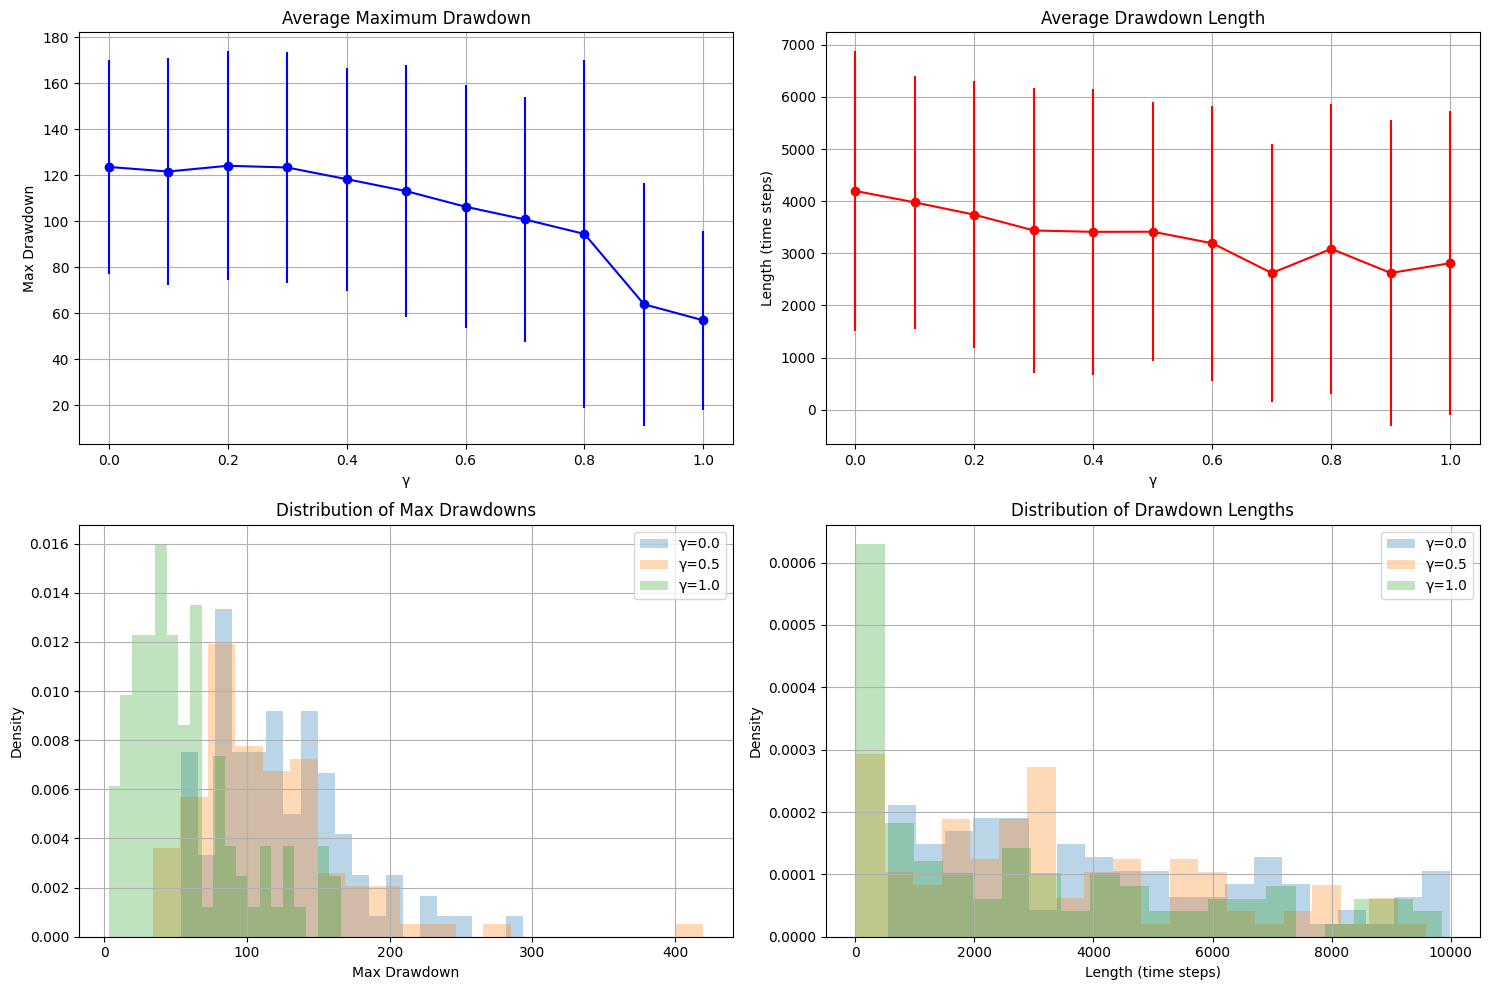

{'gamma_values': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'avg_max_drawdown': [123.68299641714835,
  121.6791173751012,
  124.18181527749533,
  123.44530942016492,
  118.36722152827683,
  113.17150744754314,
  106.37156702420822,
  100.82142629769274,
  94.52195342271813,
  63.936477561947775,
  56.930466667175004],
 'std_max_drawdown': [46.50448737894612,
  49.25625300902407,
  49.8994387220332,
  50.276888926584405,
  48.5428427438621,
  54.66151386678664,
  52.84239235505594,
  53.12131241252168,
  75.73149102449622,
  52.72634441007884,
  38.86073802495202],
 'avg_drawdown_length': [4195.45,
  3975.94,
  3740.16,
  3437.47,
  3411.48,
  3414.02,
  3191.62,
  2621.78,
  3084.82,
  2622.41,
  2810.73],
 'std_drawdown_length': [2683.4971823163896,
  2422.171083222653,
  2565.924452200415,
  2731.2669274715718,
  2746.150623982596,
  2480.1038566156863,
  2636.4273241642754,
  2473.084784555515,
  2777.472975134052,
  2925.1285034849325,
  2909.879935169147]}

In [16]:
analyze_gamma_drawdowns()

Processing γ = 0.0
Processing γ = 0.3
Processing γ = 0.6


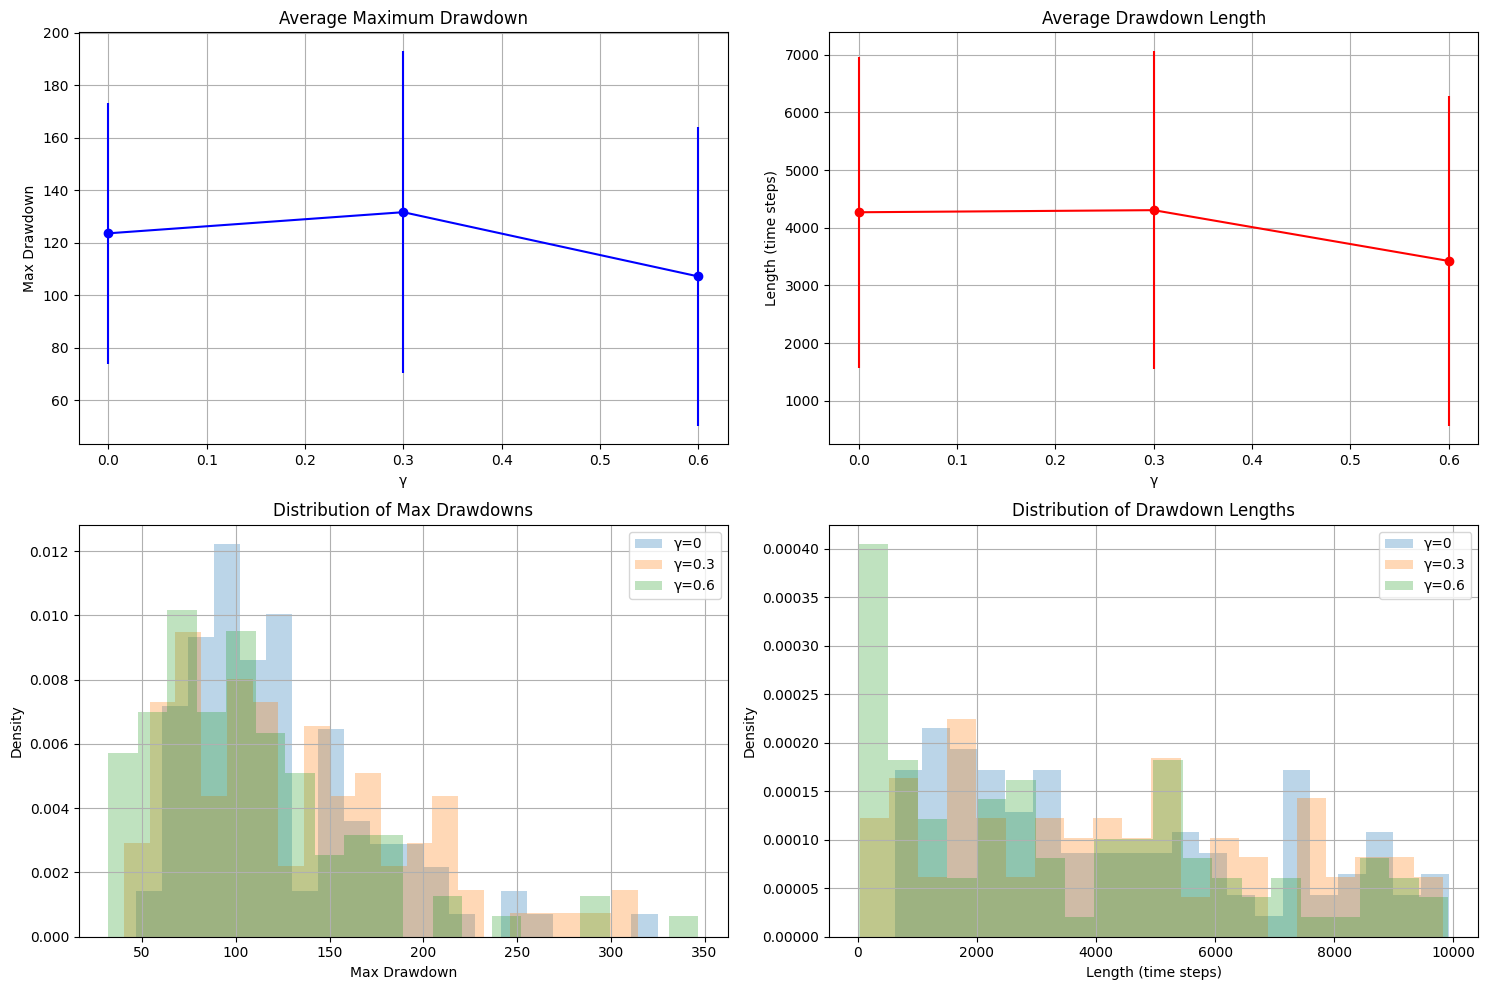

{'gamma_values': [0, 0.3, 0.6],
 'avg_max_drawdown': [123.5668144867498, 131.6136957903024, 107.1430688197789],
 'std_max_drawdown': [49.68859174711981,
  61.353012792654816,
  56.75287508403787],
 'avg_drawdown_length': [4268.78, 4305.0, 3424.61],
 'std_drawdown_length': [2690.9829601095585,
  2756.452375790302,
  2850.0777775176593]}

In [ ]:
analyze_gamma_drawdowns()

## Correlation of absolute return 

In [4]:
return_process.keys()

dict_keys([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

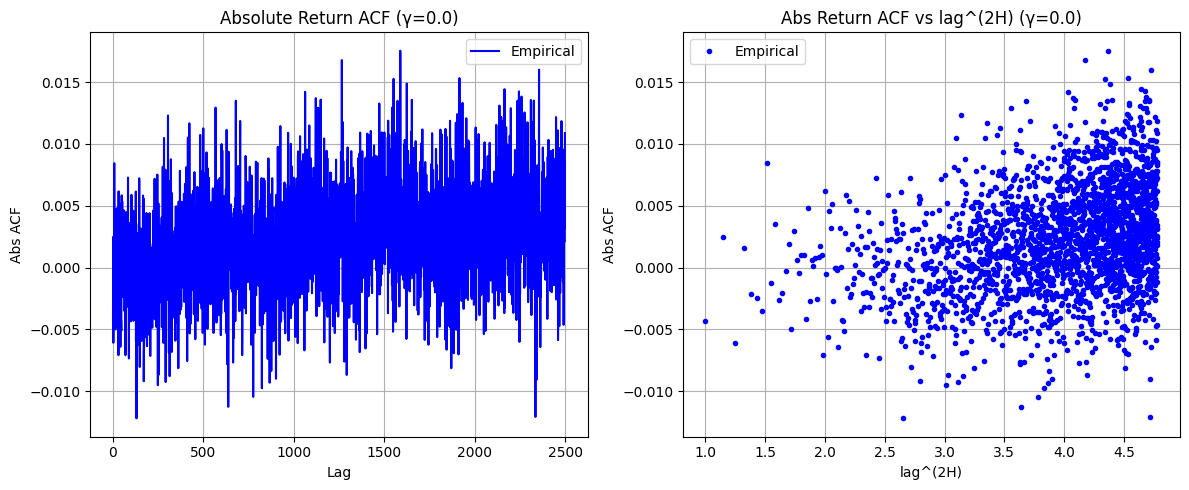

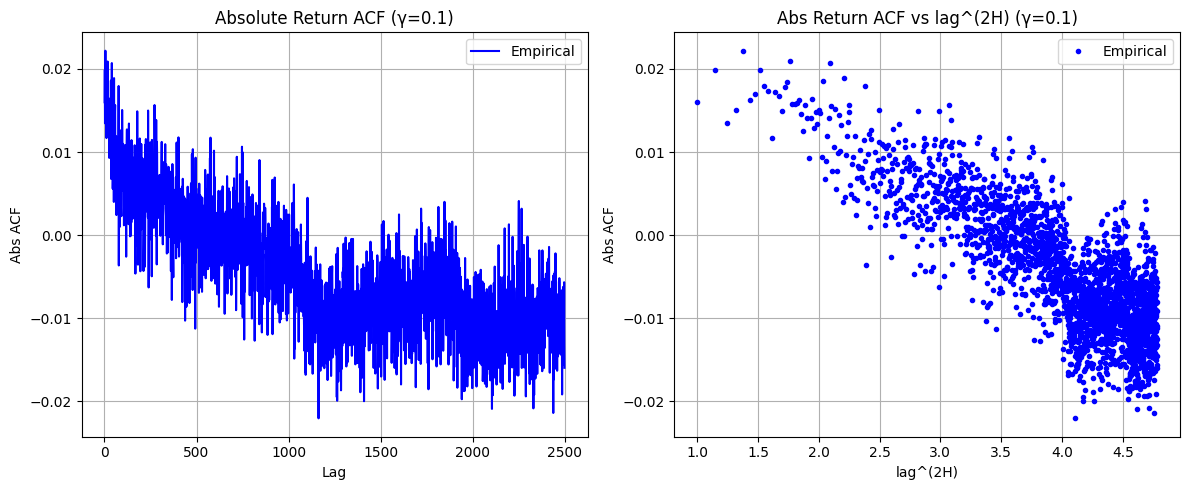

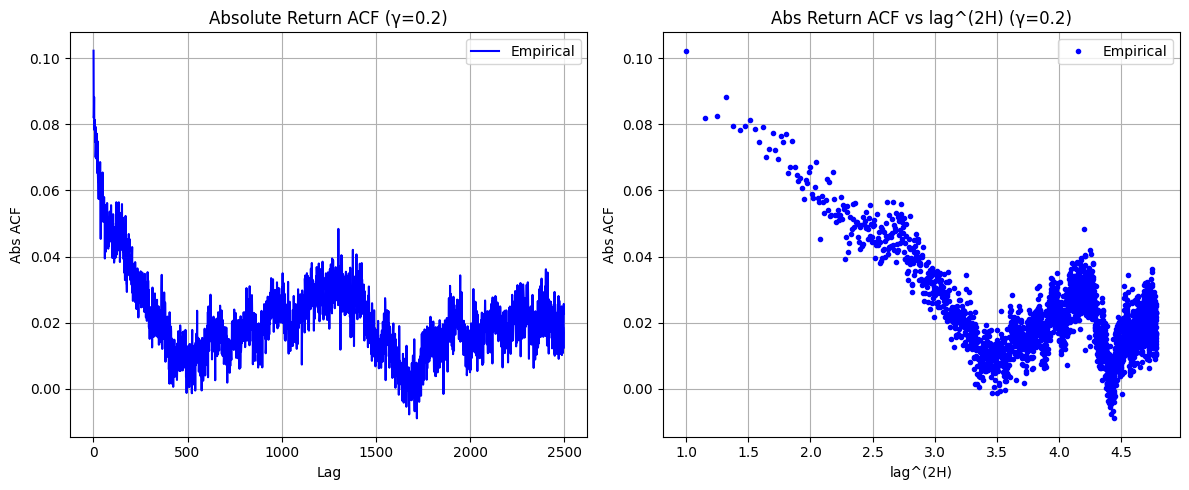

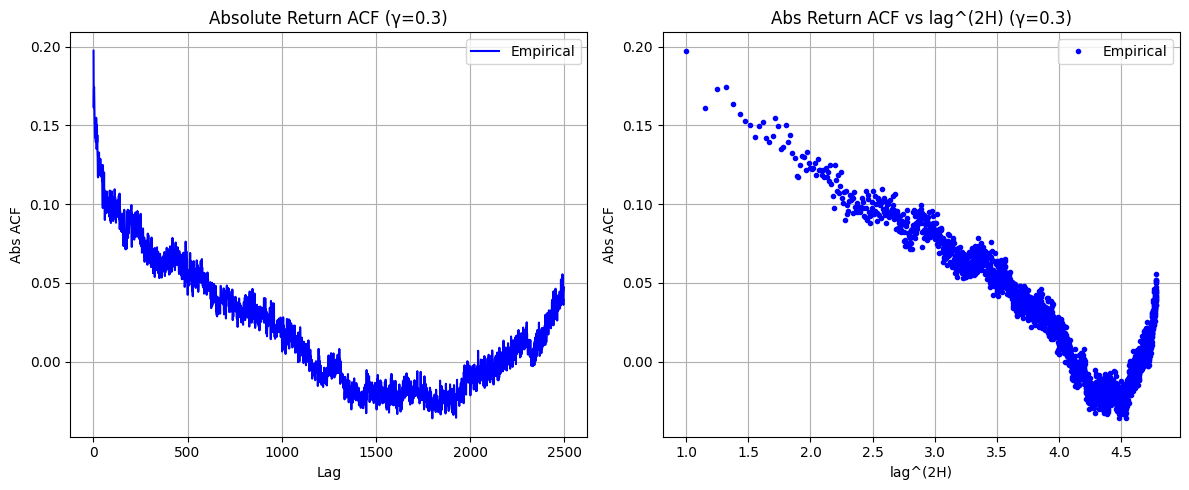

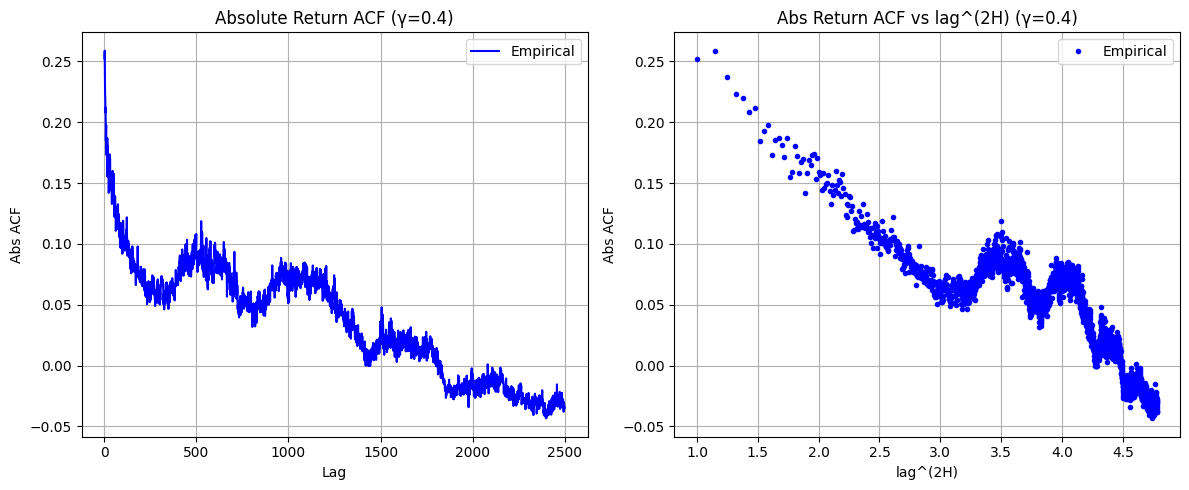

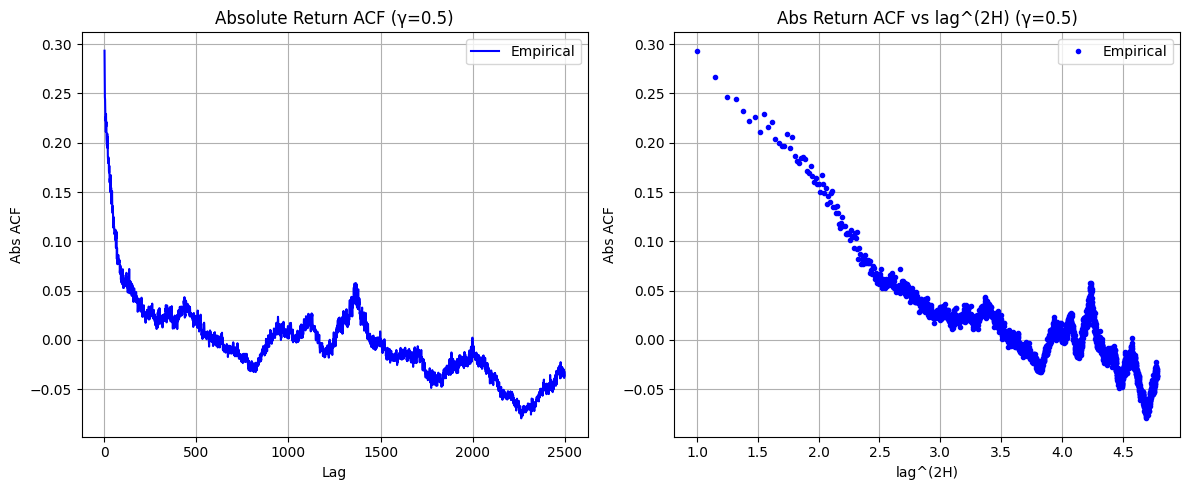

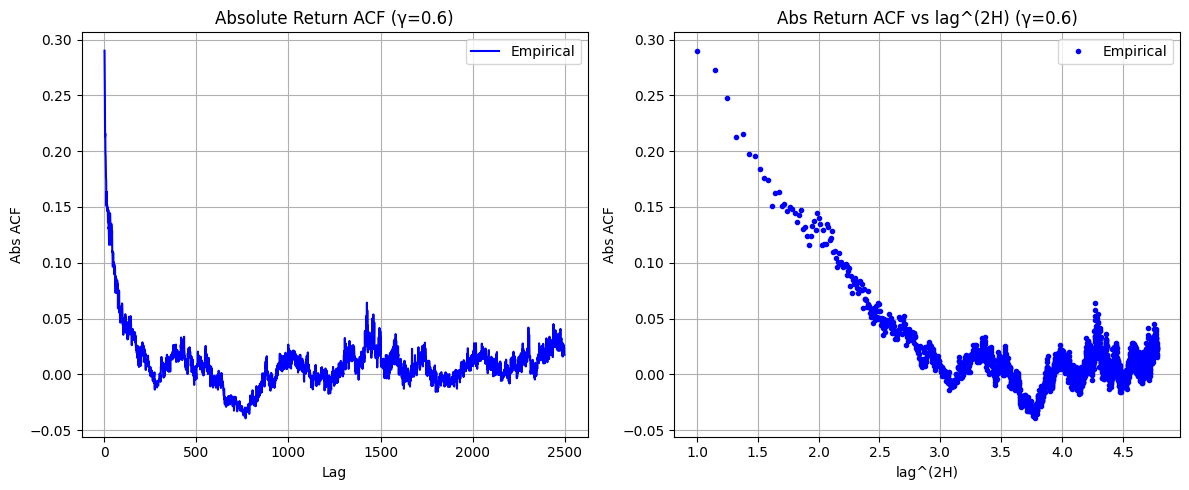

In [3]:
return_process[0.0].plot_abs_return_correlation()
return_process[0.1].plot_abs_return_correlation()
return_process[0.2].plot_abs_return_correlation()
return_process[0.3].plot_abs_return_correlation()
return_process[0.4].plot_abs_return_correlation()
return_process[0.5].plot_abs_return_correlation()
return_process[0.6].plot_abs_return_correlation()

## Price Variogram

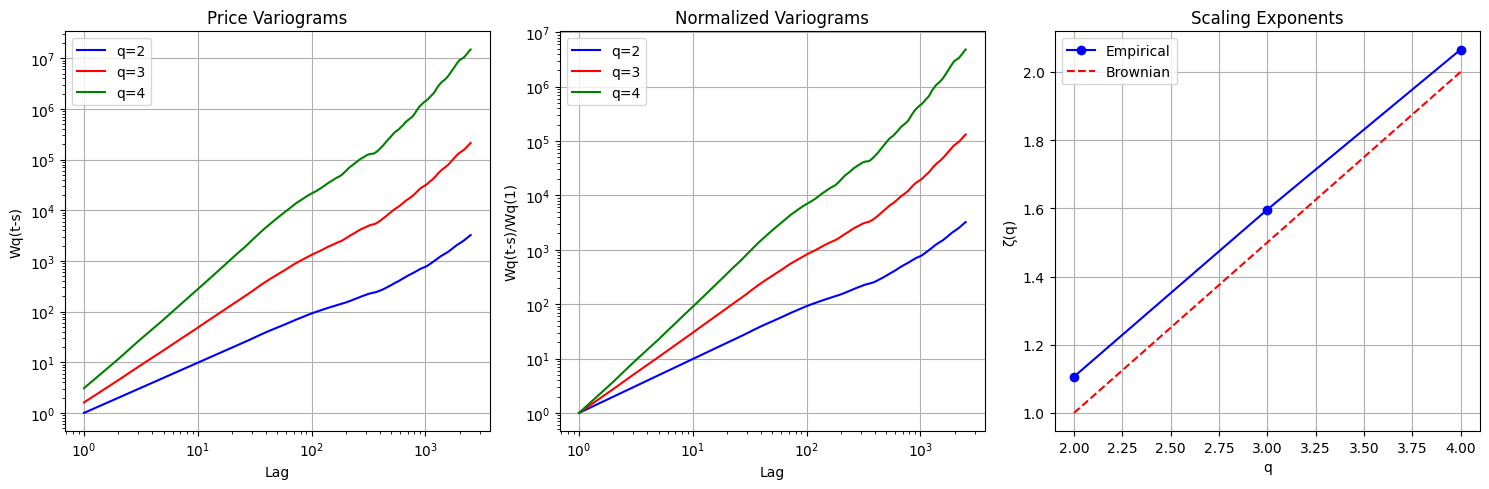

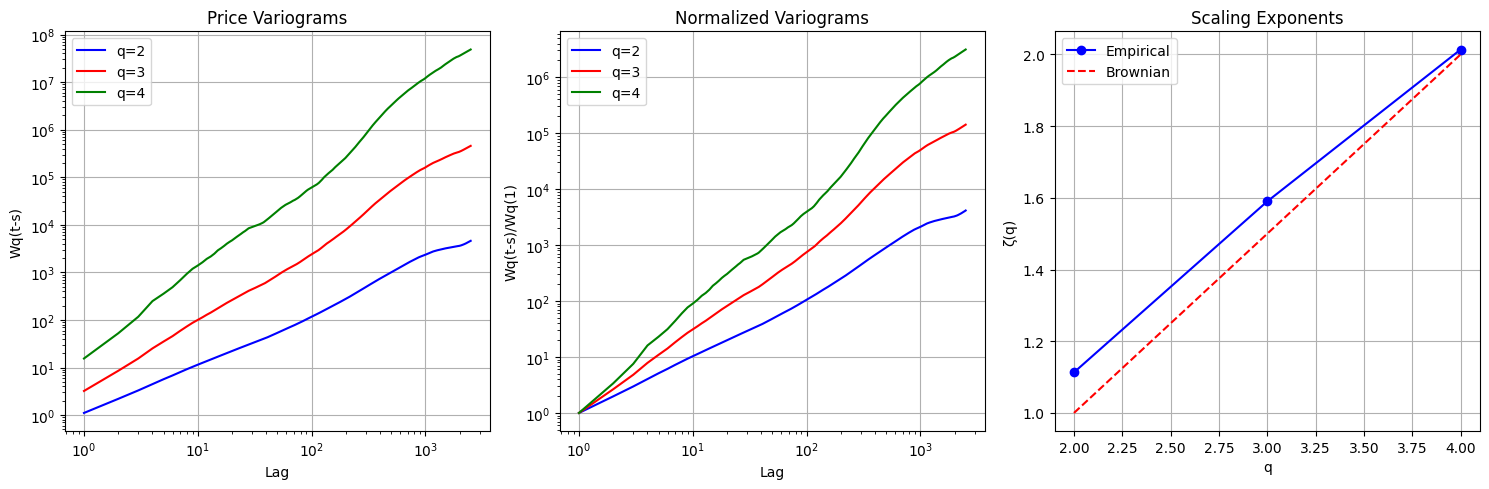

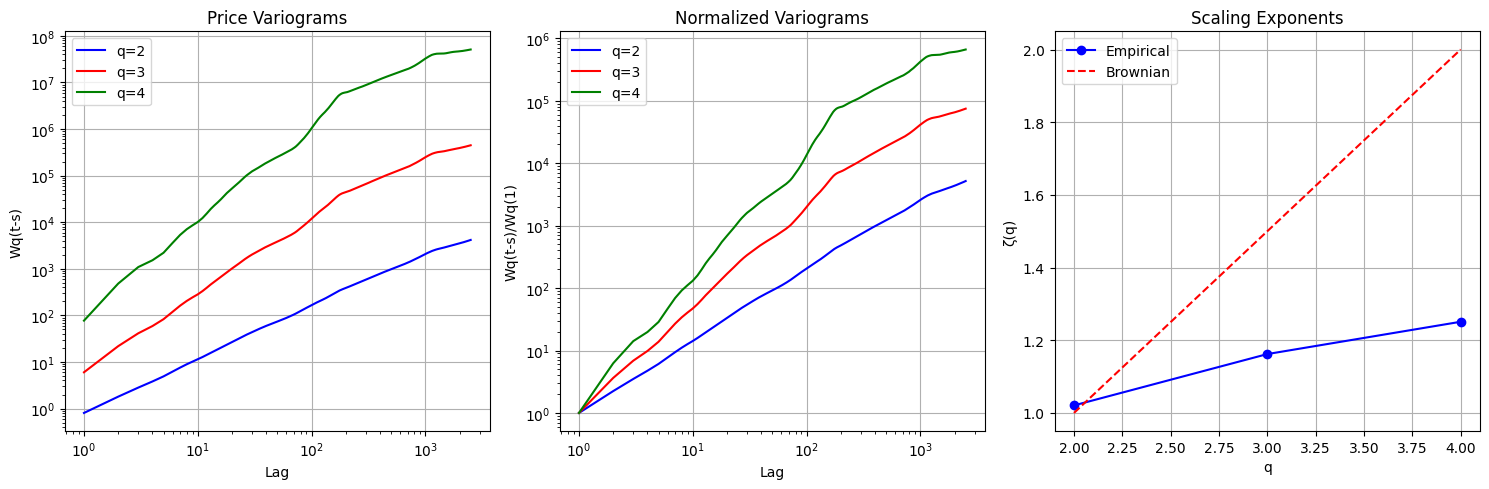

[1.0207285851392693, 1.1620115152399453, 1.2508935221923816]

In [4]:
return_process[0].plot_price_variogram()
return_process[0.3].plot_price_variogram()
return_process[0.6].plot_price_variogram()

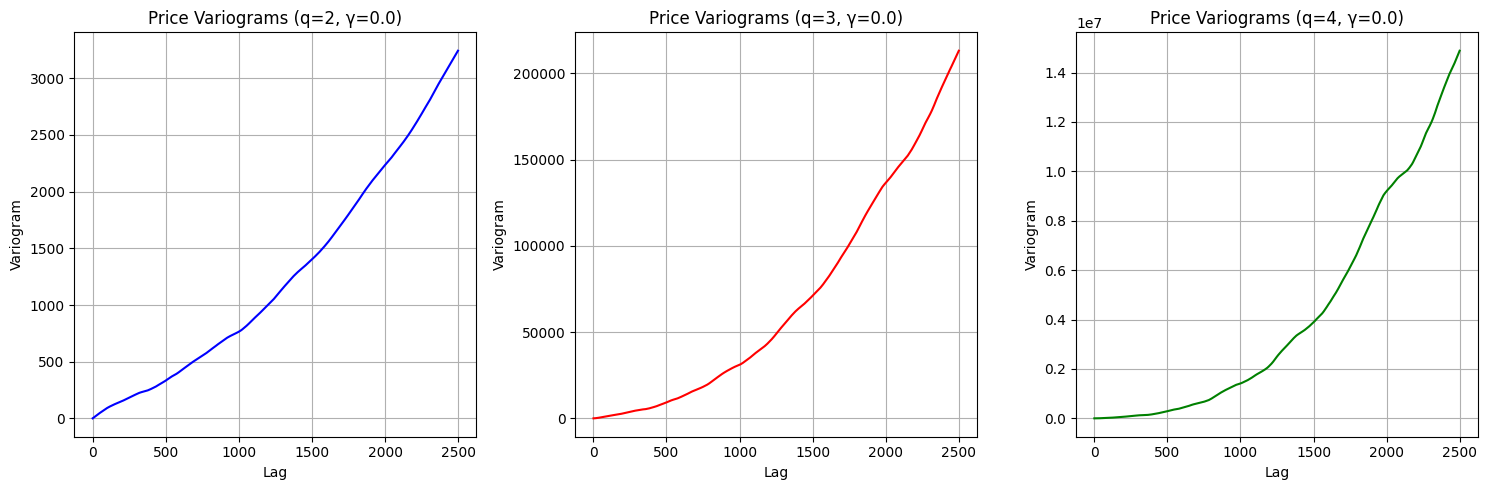

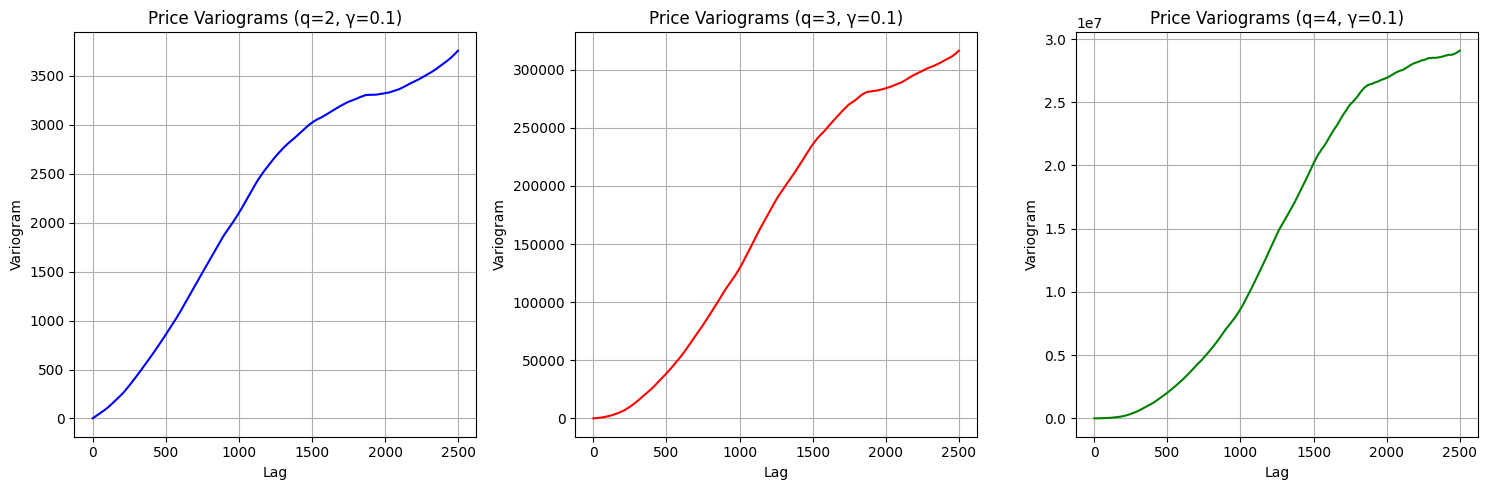

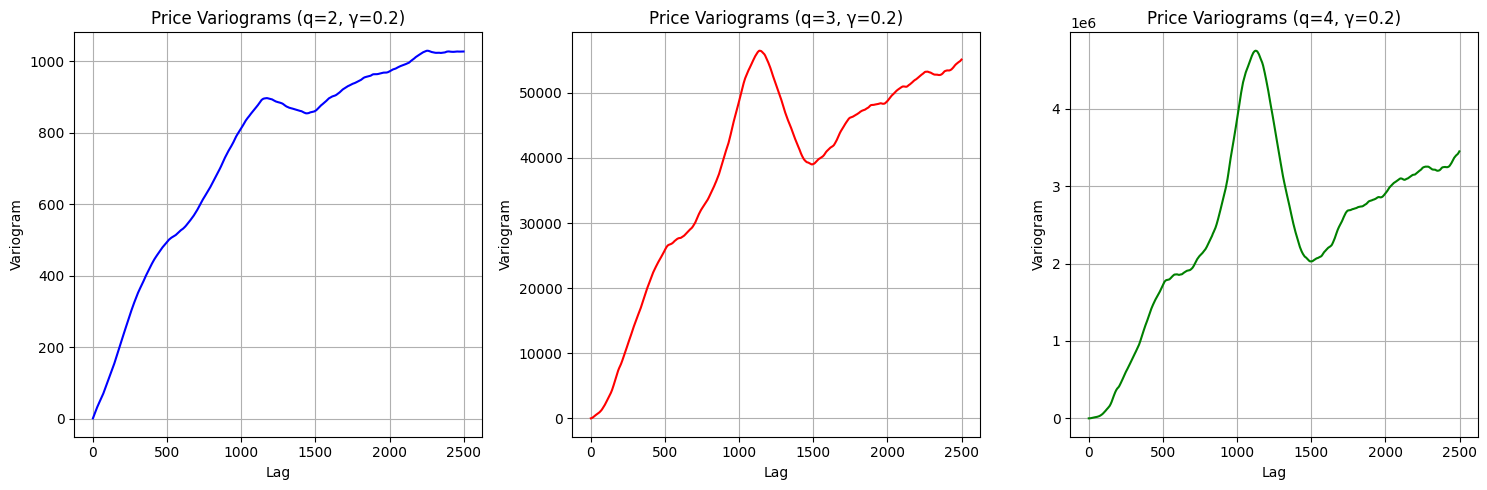

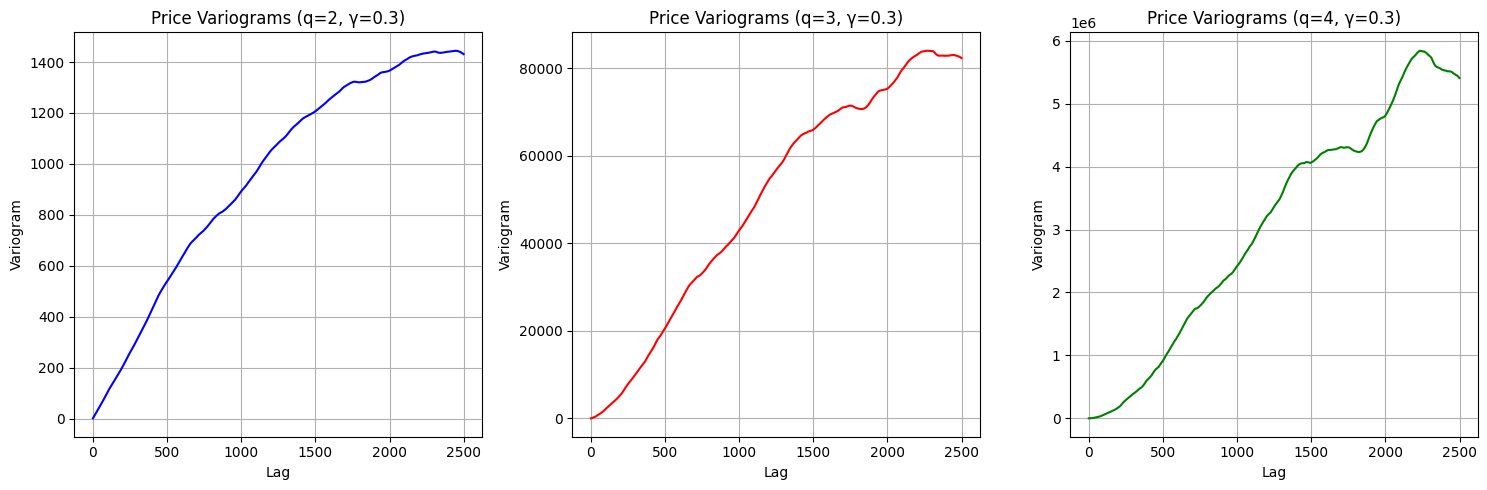

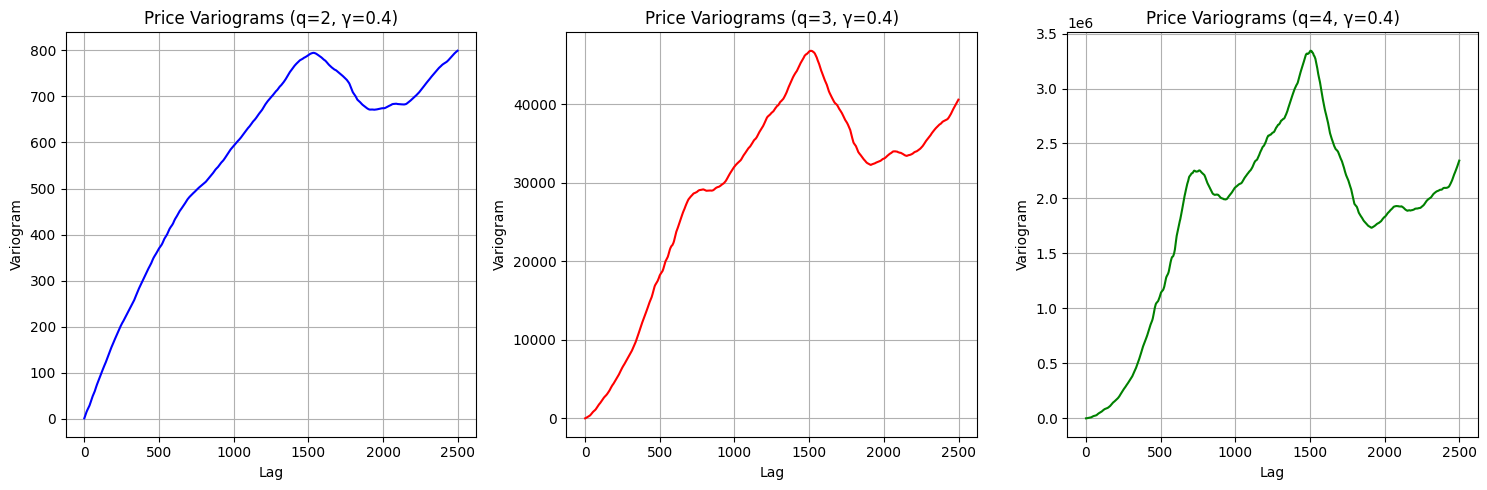

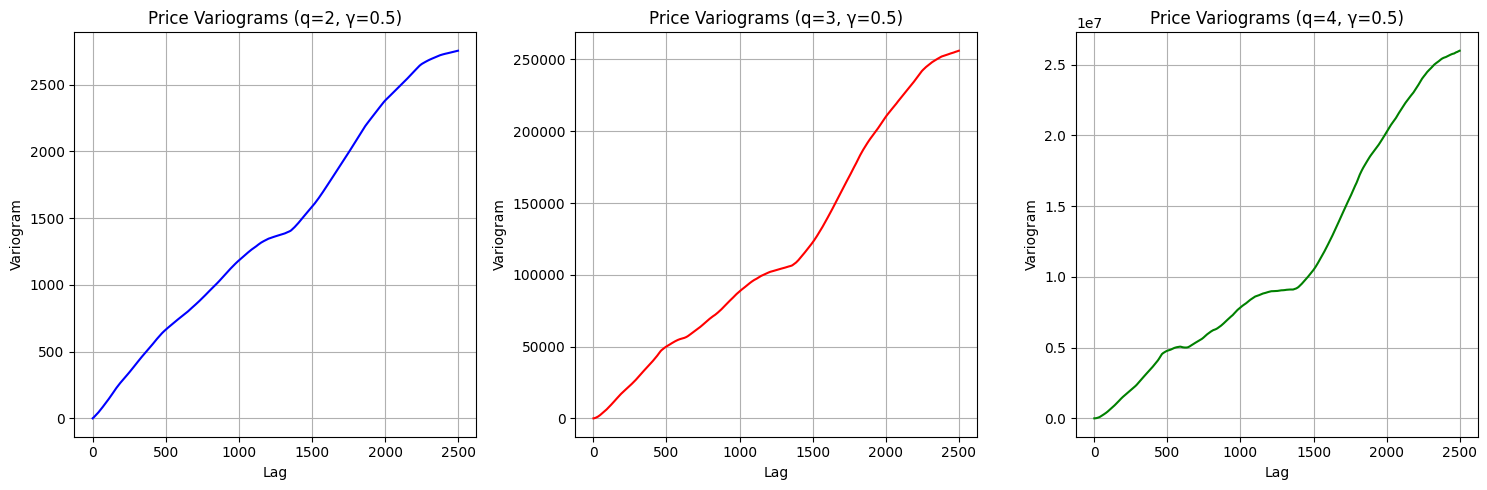

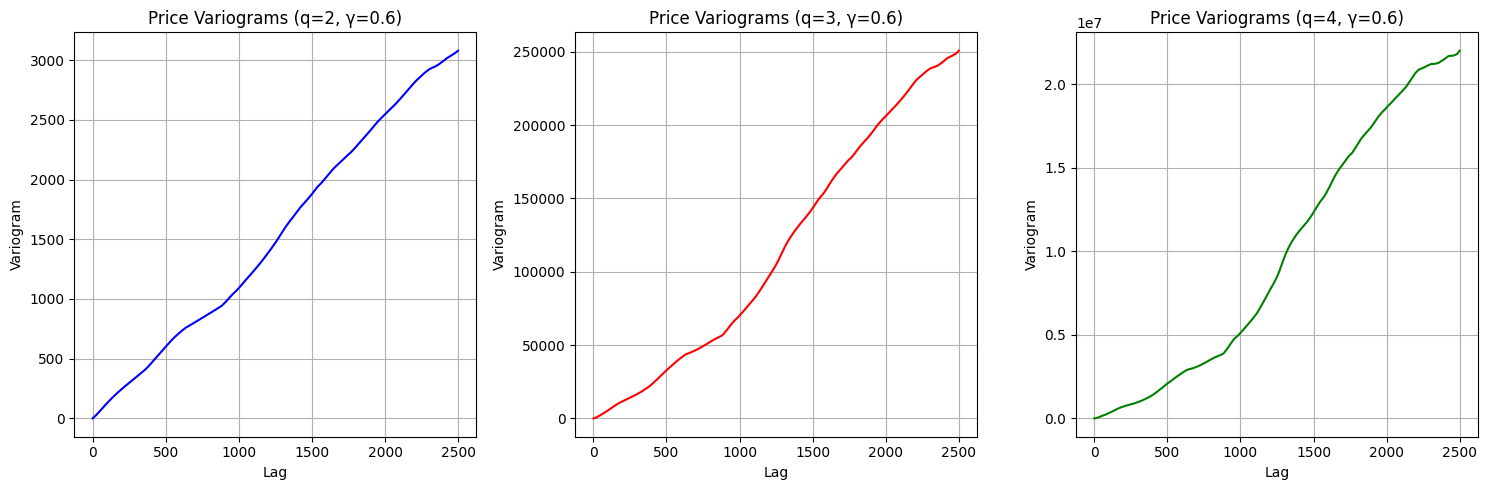

In [3]:
return_process[0].plot_price_variogram()
return_process[0.1].plot_price_variogram()
return_process[0.2].plot_price_variogram()
return_process[0.3].plot_price_variogram()
return_process[0.4].plot_price_variogram()
return_process[0.5].plot_price_variogram()
return_process[0.6].plot_price_variogram()

In [33]:
variograms

{2: array([1.00215867e+00, 1.99500816e+00, 2.98892417e+00, ...,
        3.23843120e+03, 3.24055346e+03, 3.24265094e+03]),
 3: array([1.61553556e+00, 4.43716839e+00, 8.14918033e+00, ...,
        2.12715316e+05, 2.12900722e+05, 2.13083785e+05]),
 4: array([3.08924012e+00, 1.15537701e+01, 2.61040422e+01, ...,
        1.48520799e+07, 1.48673296e+07, 1.48823560e+07])}

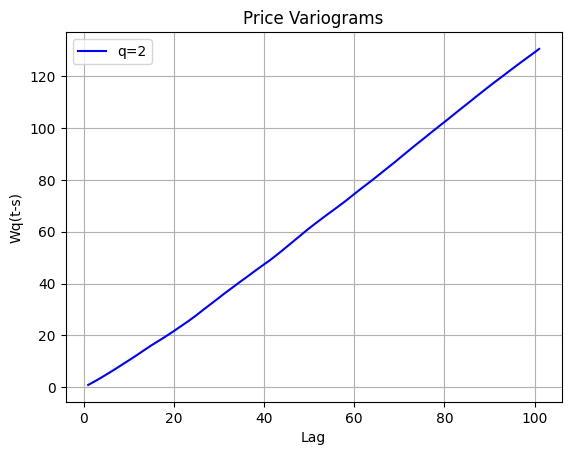

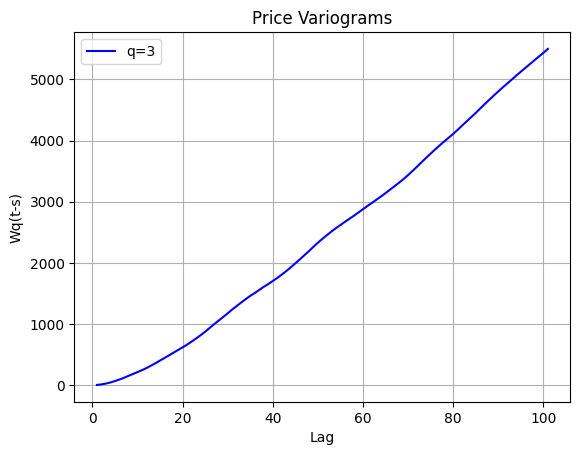

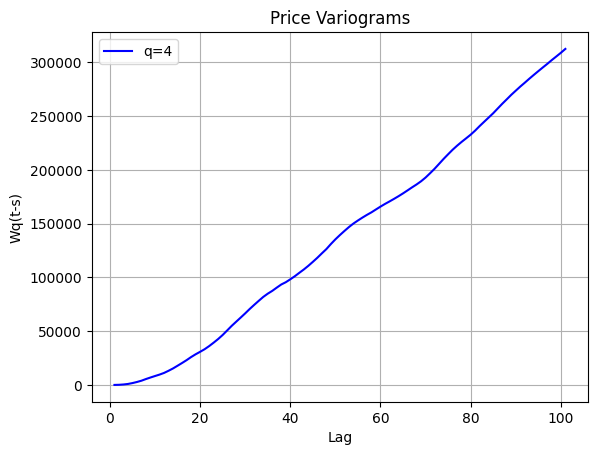

In [36]:
lags, variograms = return_process[0.6].compute_price_variogram()

plt.plot(lags[:101], variograms[2][:101], f'b-', label=f'q={2}')
plt.title('Price Variograms')
plt.xlabel('Lag')
plt.ylabel('Wq(t-s)')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(lags[:101], variograms[3][:101], f'b-', label=f'q={3}')
plt.title('Price Variograms')
plt.xlabel('Lag')
plt.ylabel('Wq(t-s)')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(lags[:101], variograms[4][:101], f'b-', label=f'q={4}')
plt.title('Price Variograms')
plt.xlabel('Lag')
plt.ylabel('Wq(t-s)')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
max_lag = N//100
lags = np.arange(max_lag)
variogram = np.zeros(max_lag)

for lag in lags[1:]:
    variogram[lag] = np.mean((return_process[0.0].prices[:-lag] - return_process[0.0].prices[lag:])**2)

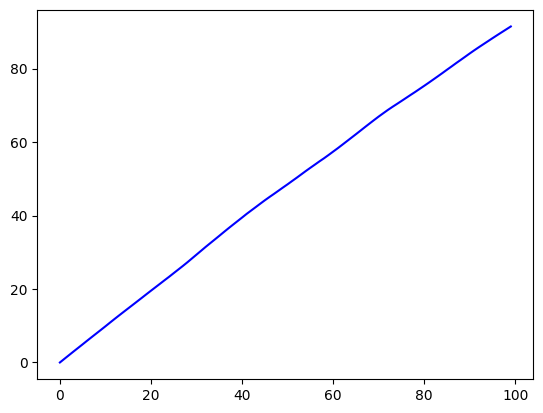

In [31]:
plt.plot(lags, variogram, 'b-', label='Empirical')

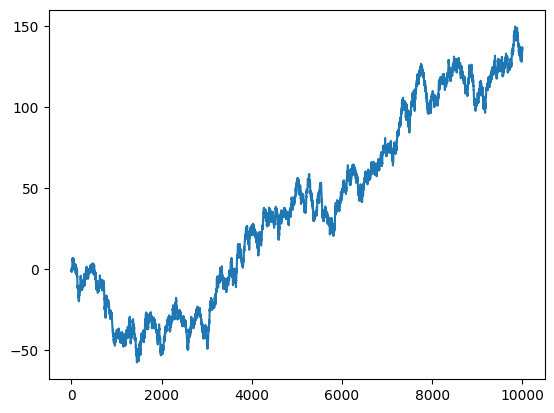

In [22]:
plt.plot(return_process[0.0].prices)

## Non-linear ACF and volatility clustering

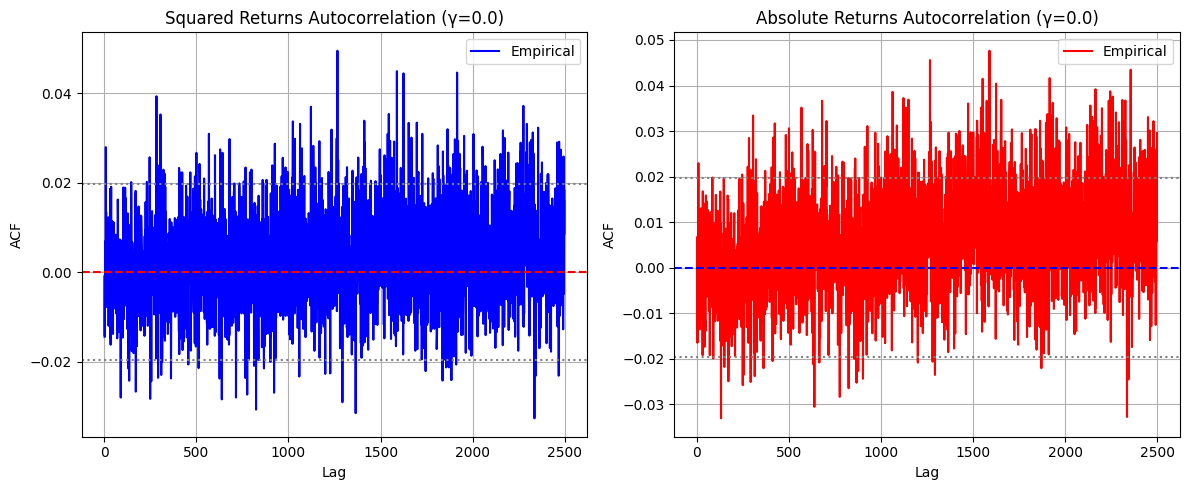

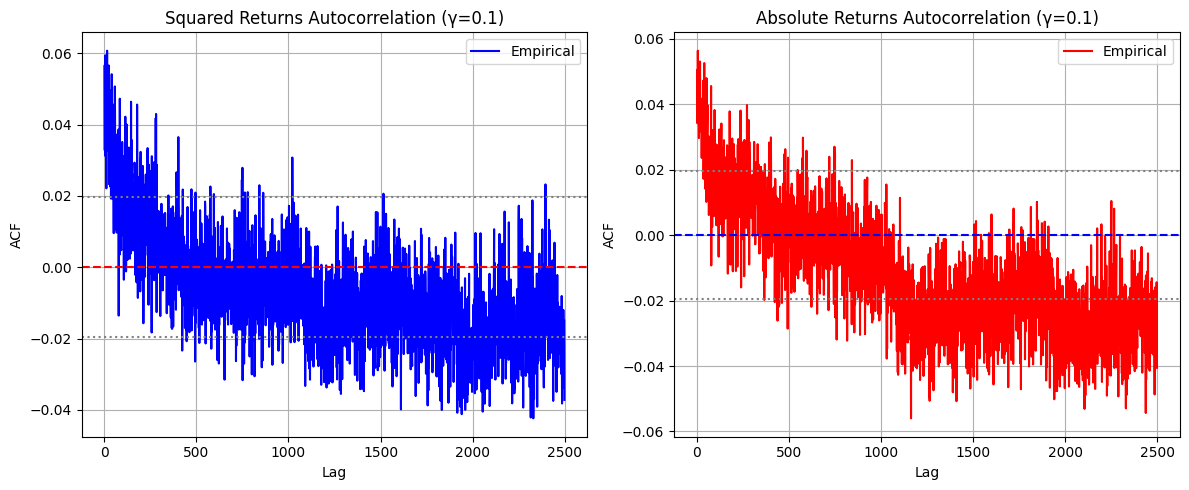

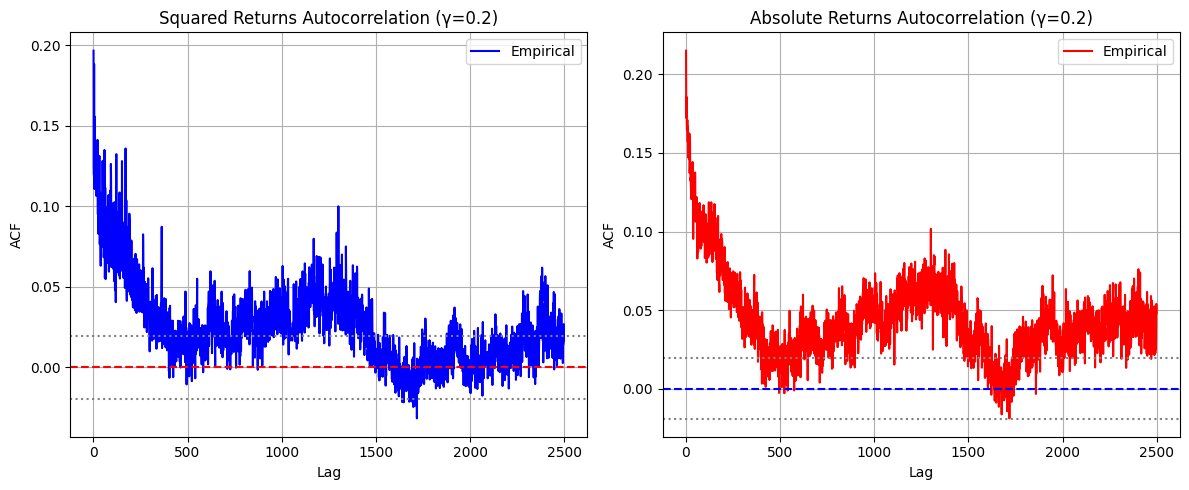

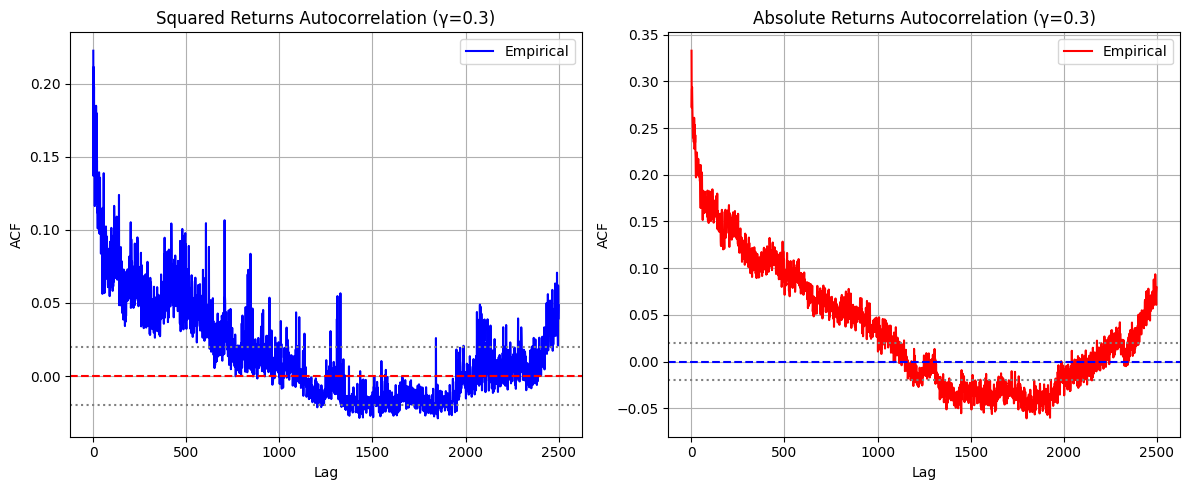

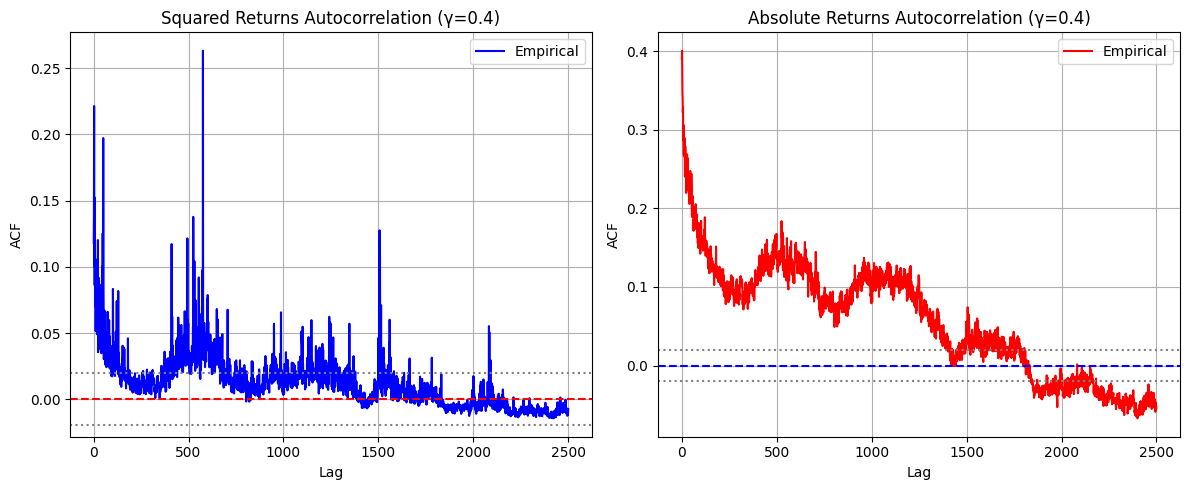

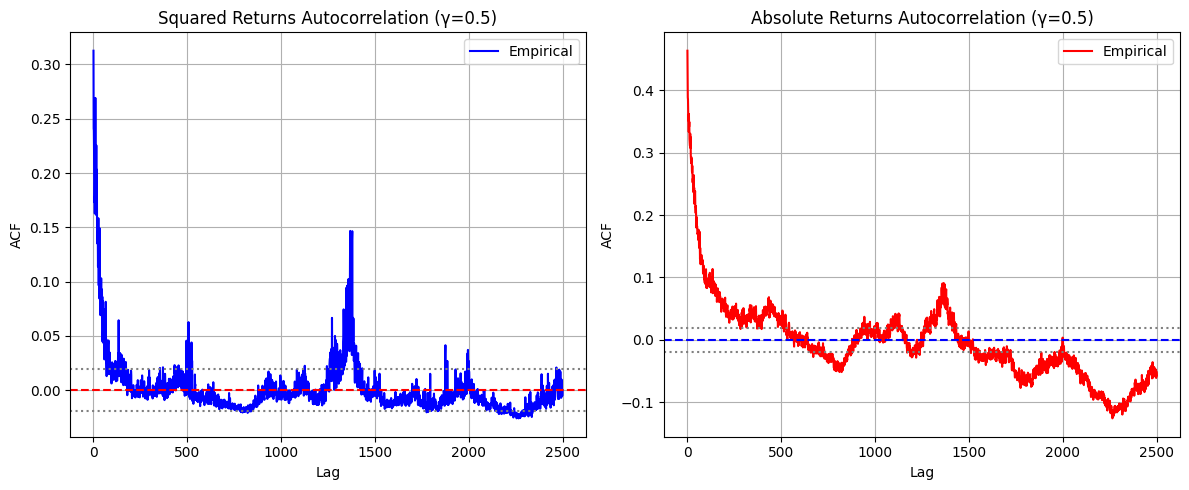

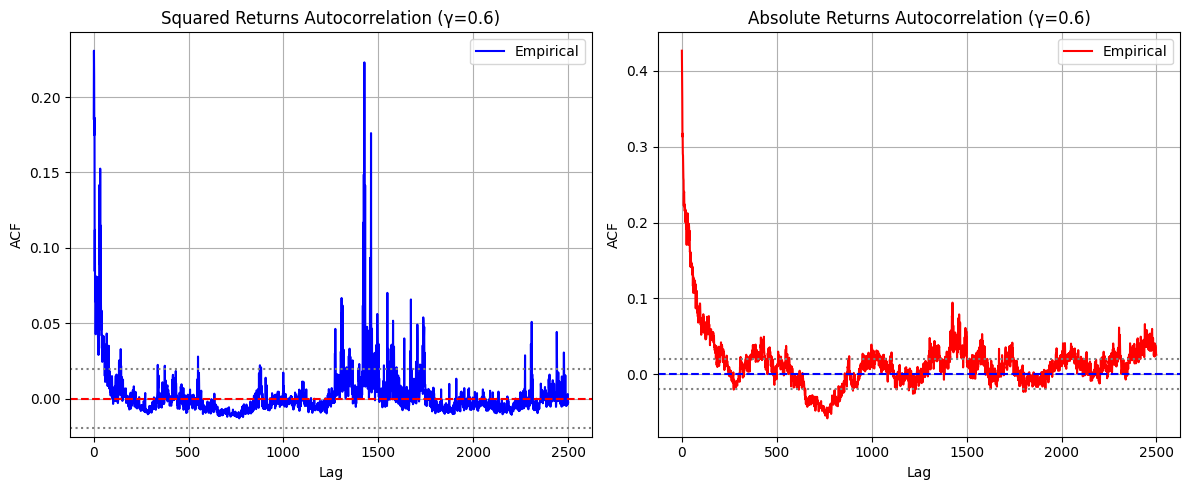

In [3]:
return_process[0.0].plot_autocorrelation()
return_process[0.1].plot_autocorrelation()
return_process[0.2].plot_autocorrelation()
return_process[0.3].plot_autocorrelation()
return_process[0.4].plot_autocorrelation()
return_process[0.5].plot_autocorrelation()
return_process[0.6].plot_autocorrelation()

## Distribution of price returns as a function of vol-of-vol parameter

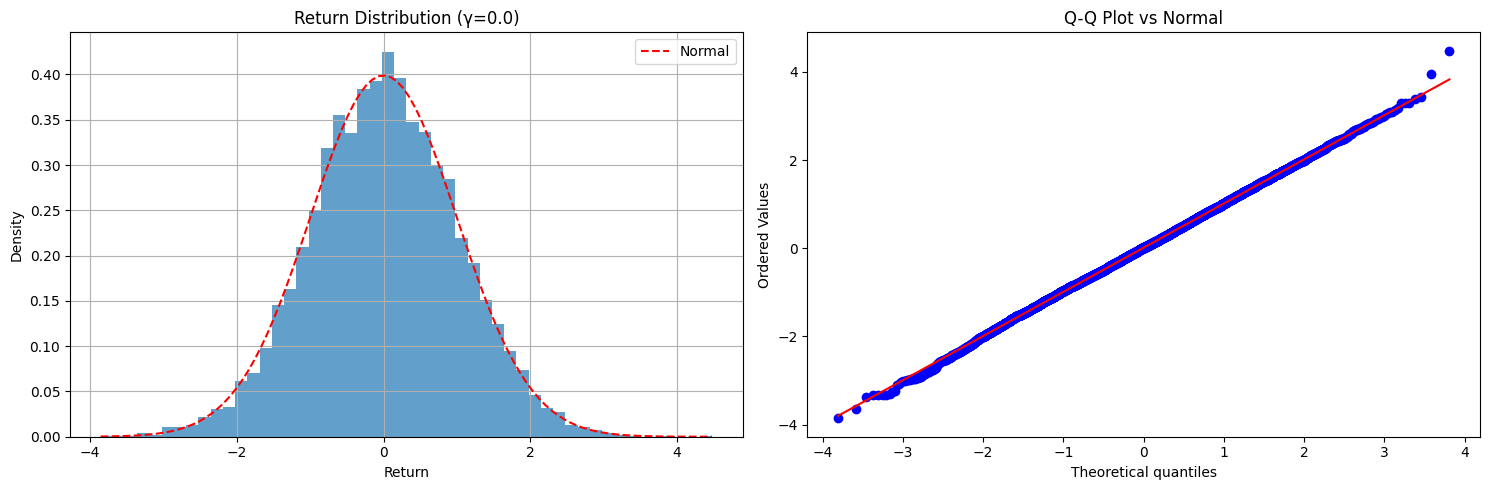

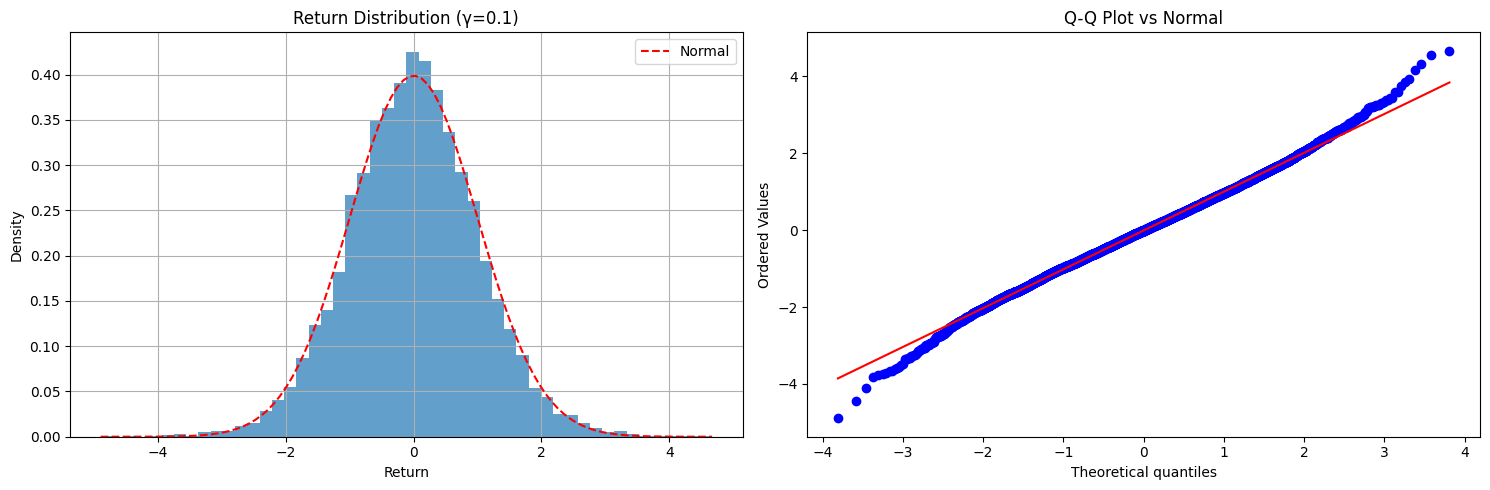

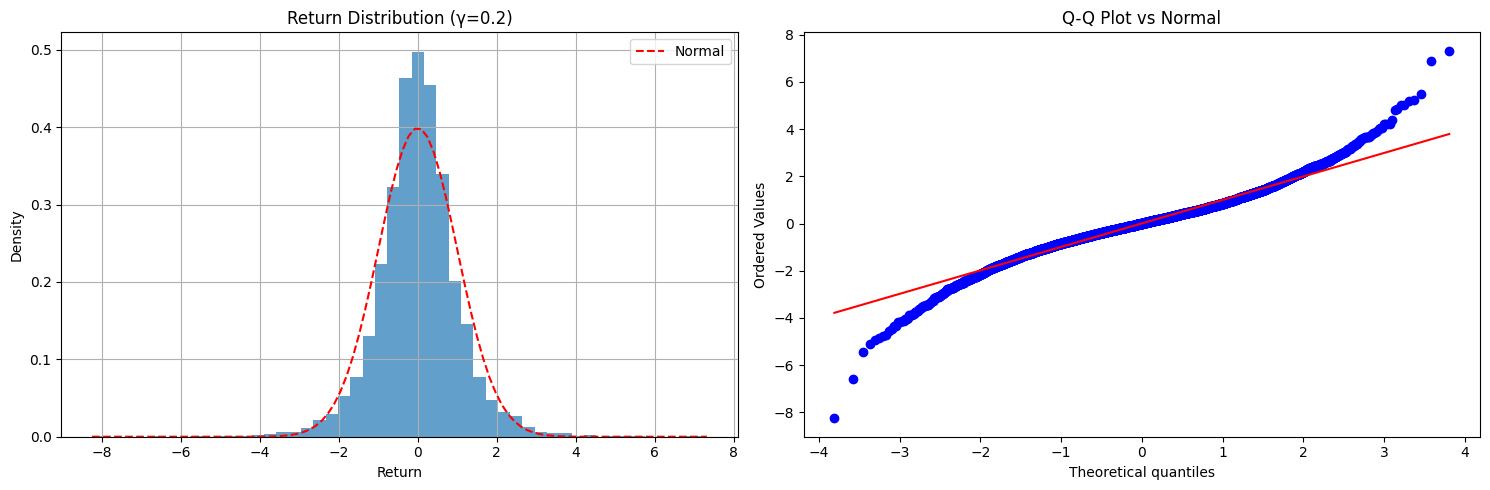

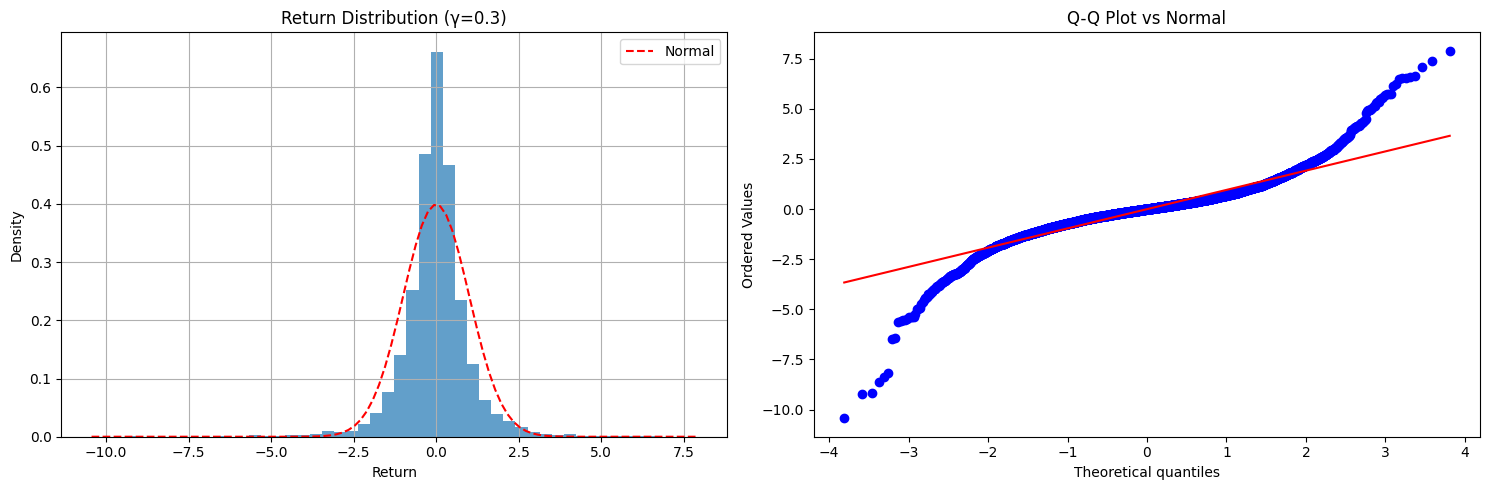

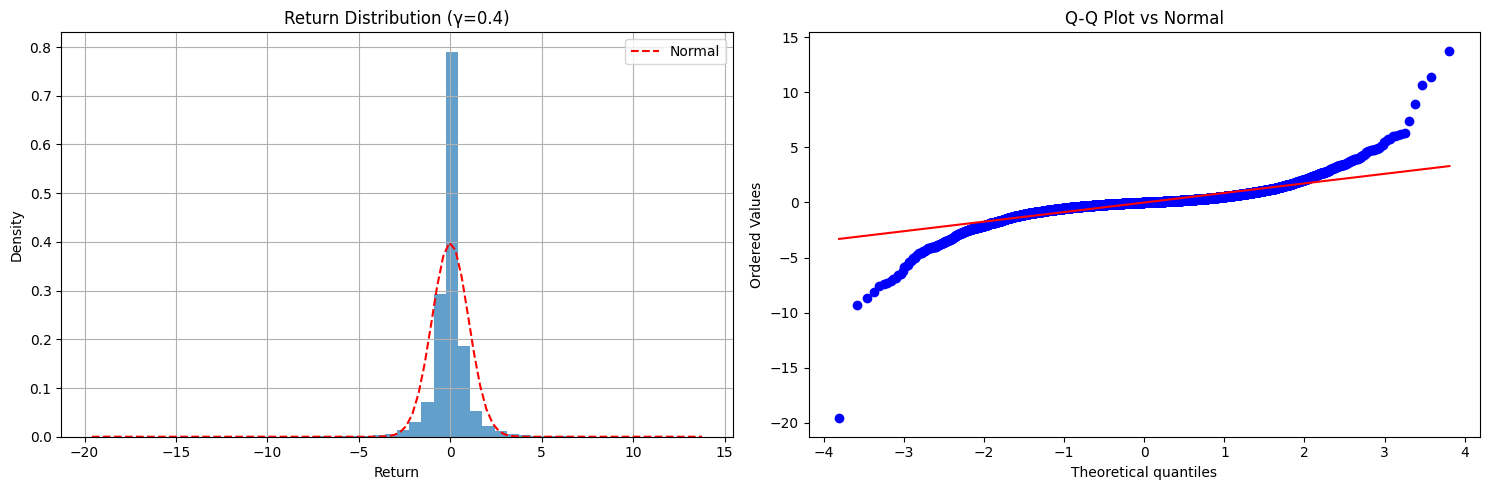

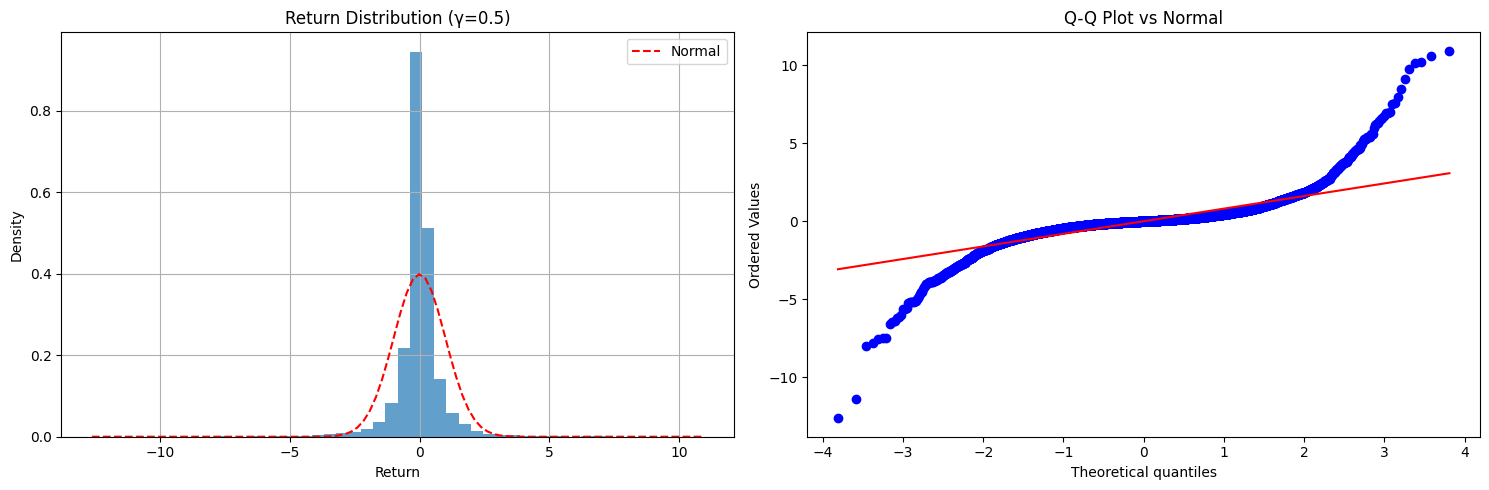

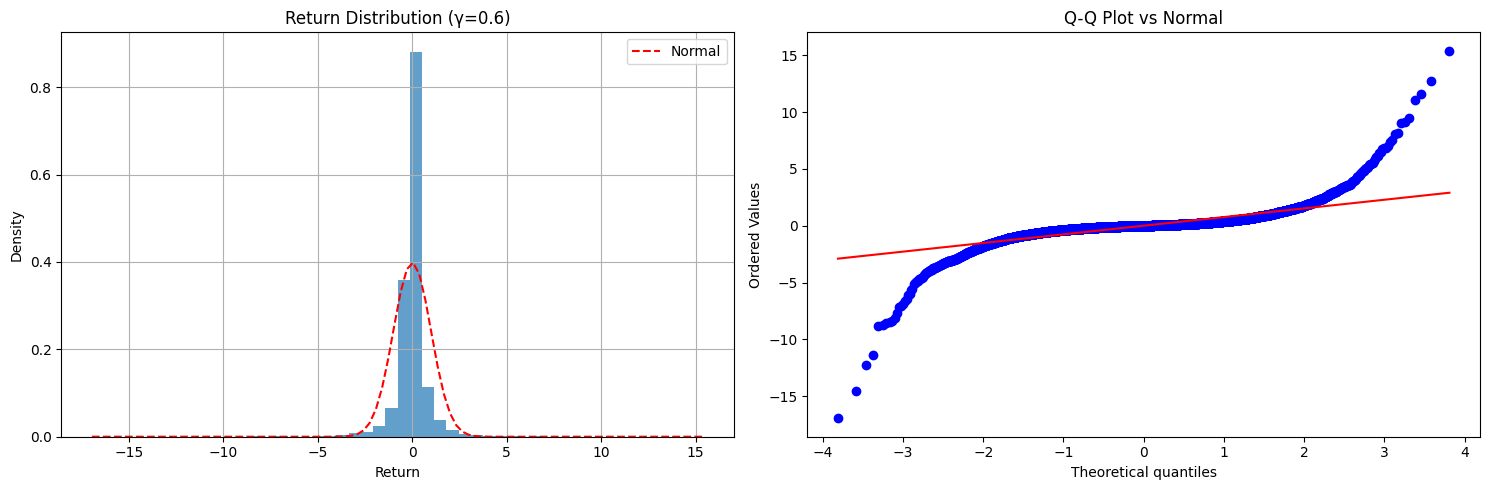

In [3]:
return_process[0.0].plot_return_distribution()
return_process[0.1].plot_return_distribution()
return_process[0.2].plot_return_distribution()
return_process[0.3].plot_return_distribution()
return_process[0.4].plot_return_distribution()
return_process[0.5].plot_return_distribution()
return_process[0.6].plot_return_distribution()

### test code for non-linear ACF

In [13]:
sample_ser = np.random.normal(0, 1, 10000)

mean = np.mean(sample_ser)
variance = np.var(sample_ser)

data_squared = sample_ser**2 
mean_data_squared = np.mean(data_squared)
variance_data_squared = np.var(data_squared)

data_abs = np.abs(sample_ser)
mean_data_abs = np.mean(data_abs)
variance_data_abs = np.var(data_abs)


lags = np.arange(max_lag)
acf = np.zeros(max_lag)
squared_acf = np.zeros(max_lag)
abs_acf = np.zeros(max_lag)

for lag in lags[1:]:
    acf[lag] = (np.mean(sample_ser[:-lag] * sample_ser[lag:]) -mean**2) / variance
    squared_acf[lag] = (np.mean(data_squared[:-lag] * data_squared[lag:]) - mean_data_squared**2) / variance_data_squared
    abs_acf[lag] = (np.mean(data_abs[:-lag] * data_abs[lag:]) - mean_data_abs**2) / variance_data_abs

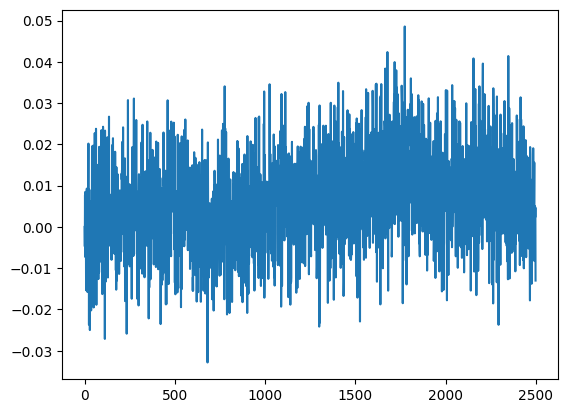

In [14]:
plt.plot(lags,abs_acf)
plt.show()

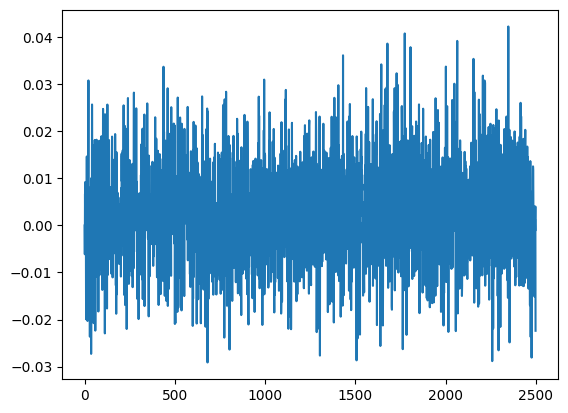

In [15]:
plt.plot(lags, squared_acf)
plt.show()

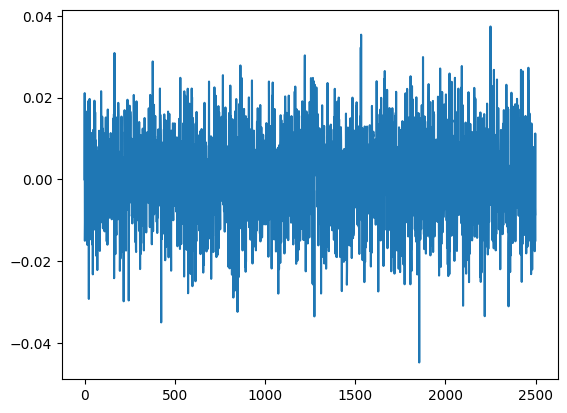

In [16]:
plt.plot(lags, acf)
plt.show()

# Others

Analyzing Fractional Random Walks...
Generating process for H = 0.7 and N = 10000
Generating process for H = 0.5 and N = 10000
Generating process for H = 0.3 and N = 10000
Generating process for H = 0.1 and N = 10000


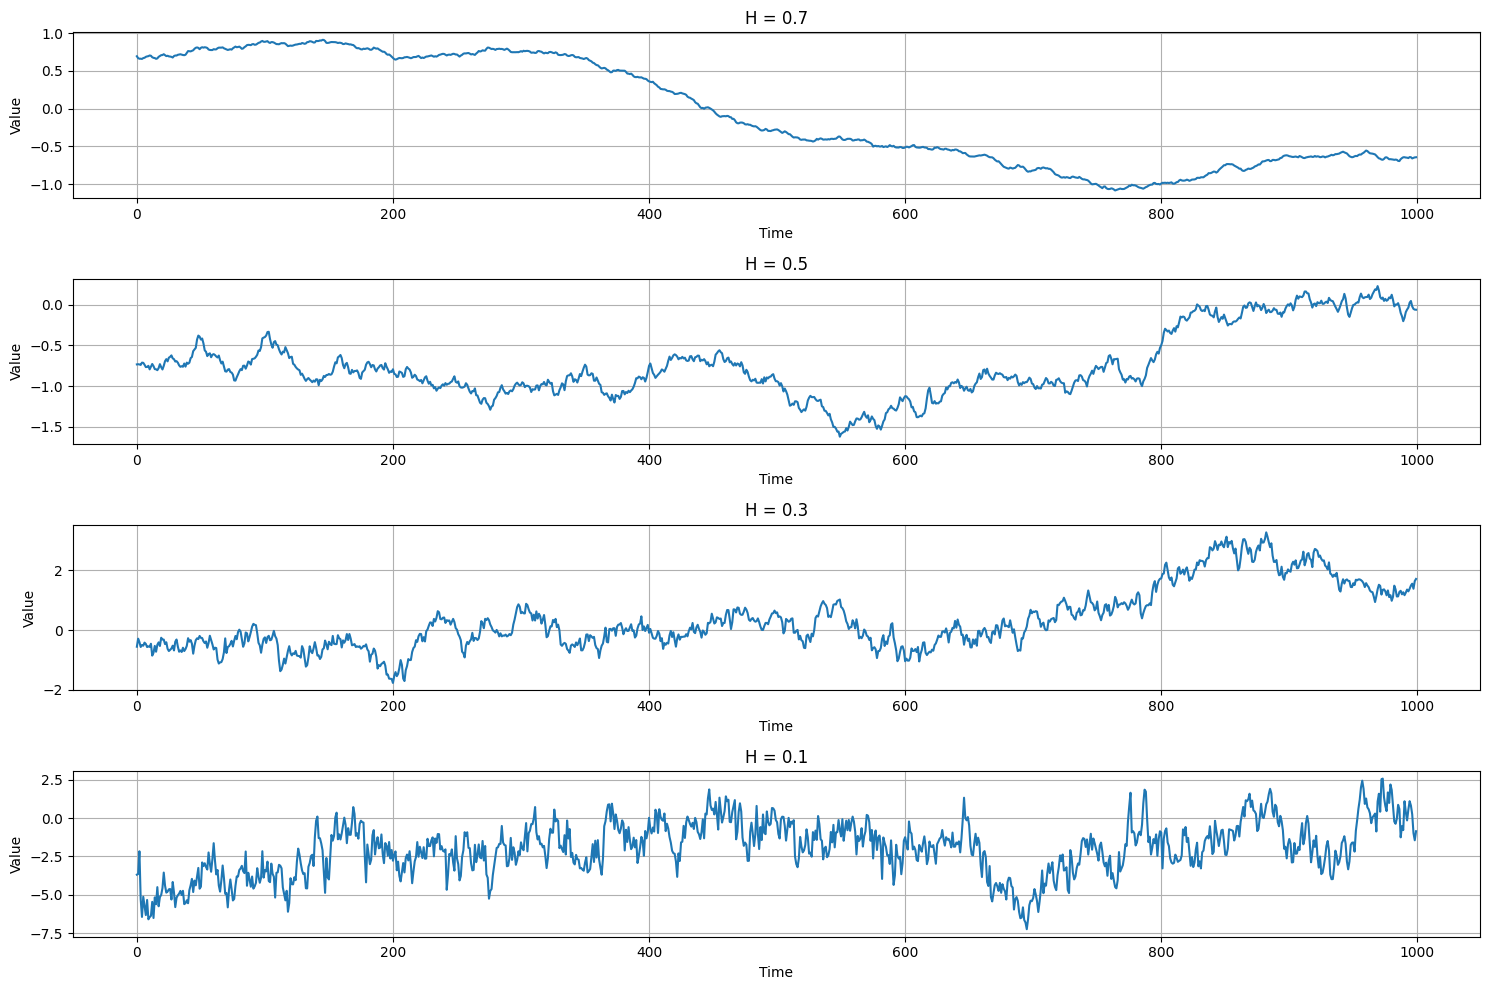


Analyzing correlation functions...

H = 0.7


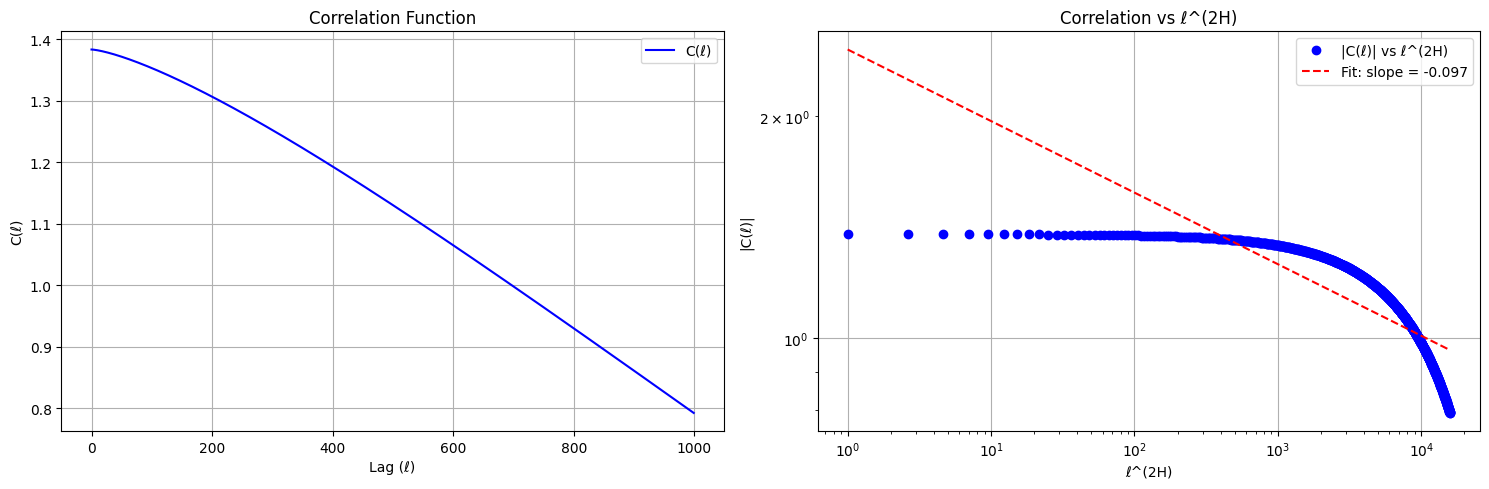

Correlation at lag 1: 1.3833
Correlation decay rate: 0.0001 per unit lag

H = 0.5


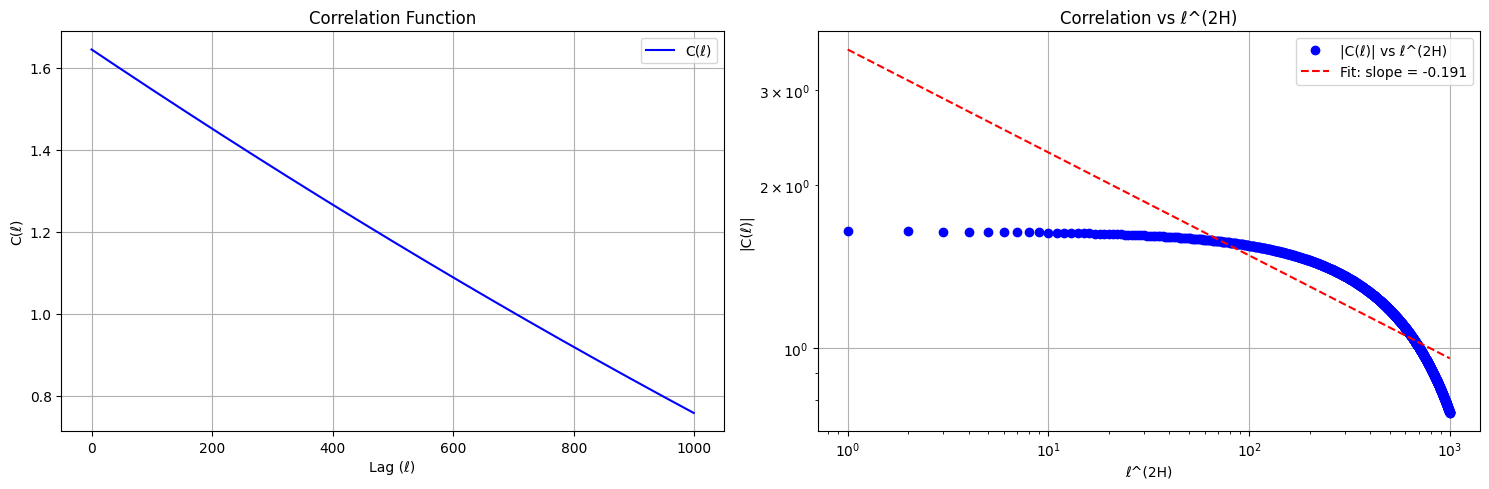

Correlation at lag 1: 1.6440
Correlation decay rate: 0.0010 per unit lag

H = 0.3


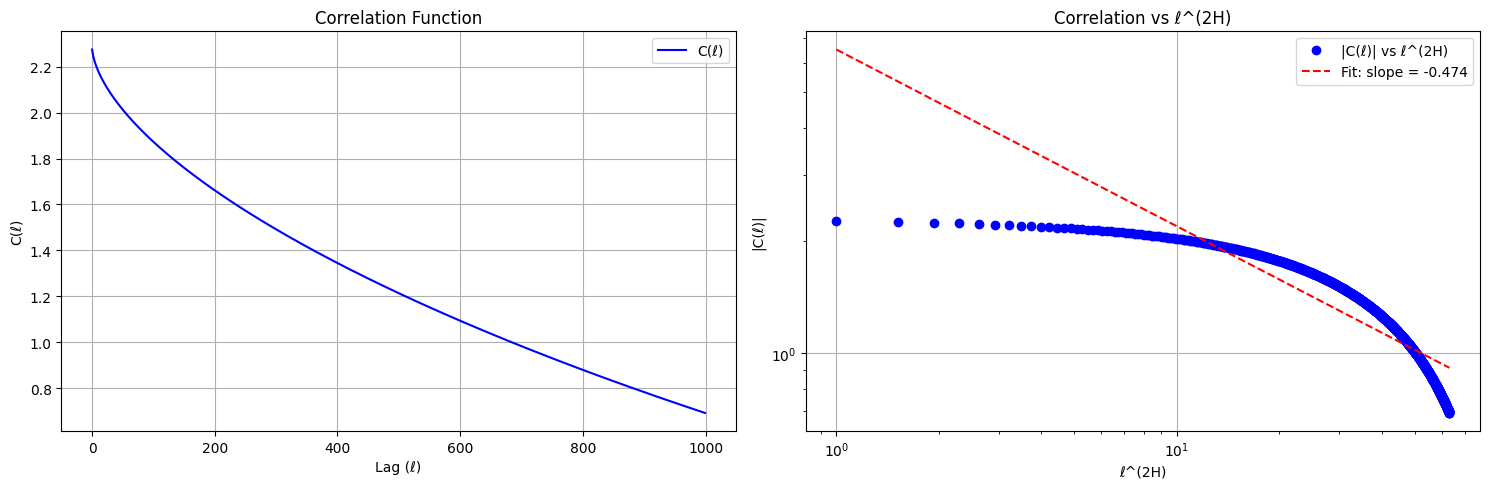

Correlation at lag 1: 2.2603
Correlation decay rate: 0.0087 per unit lag

H = 0.1


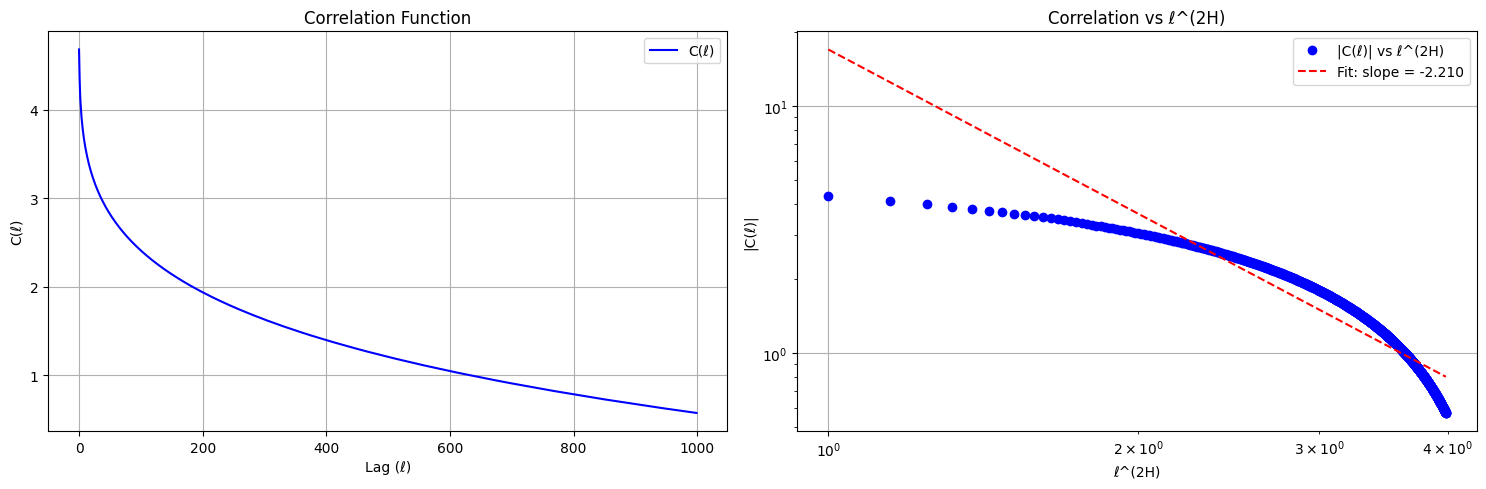

Correlation at lag 1: 4.3397
Correlation decay rate: 0.0841 per unit lag


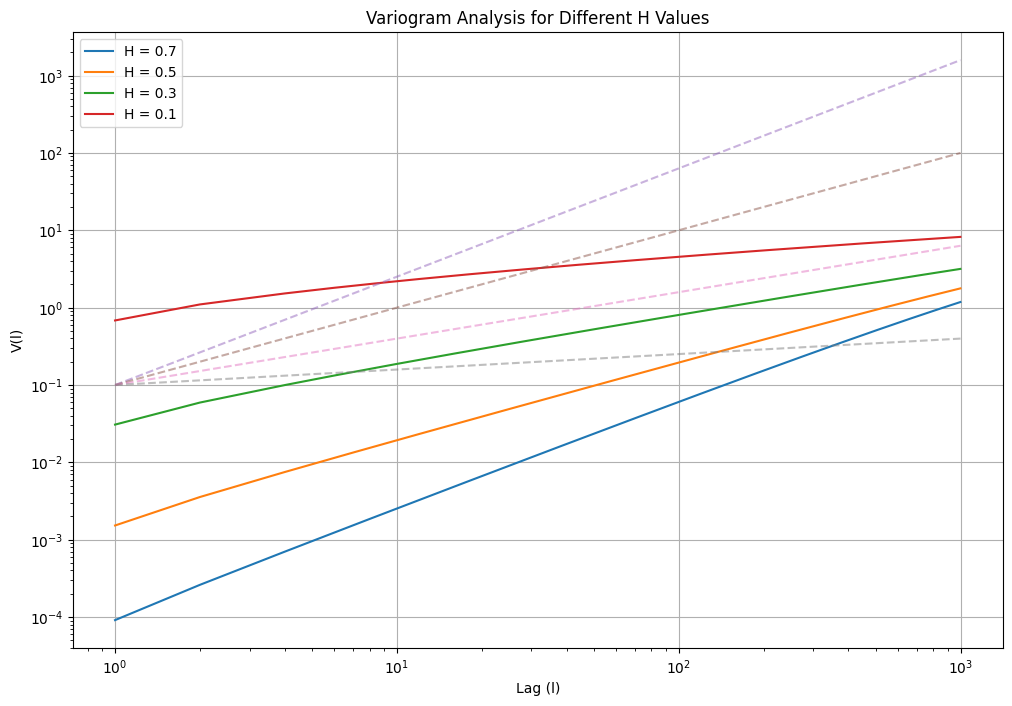


Analyzing scaling exponents for H = 0.7


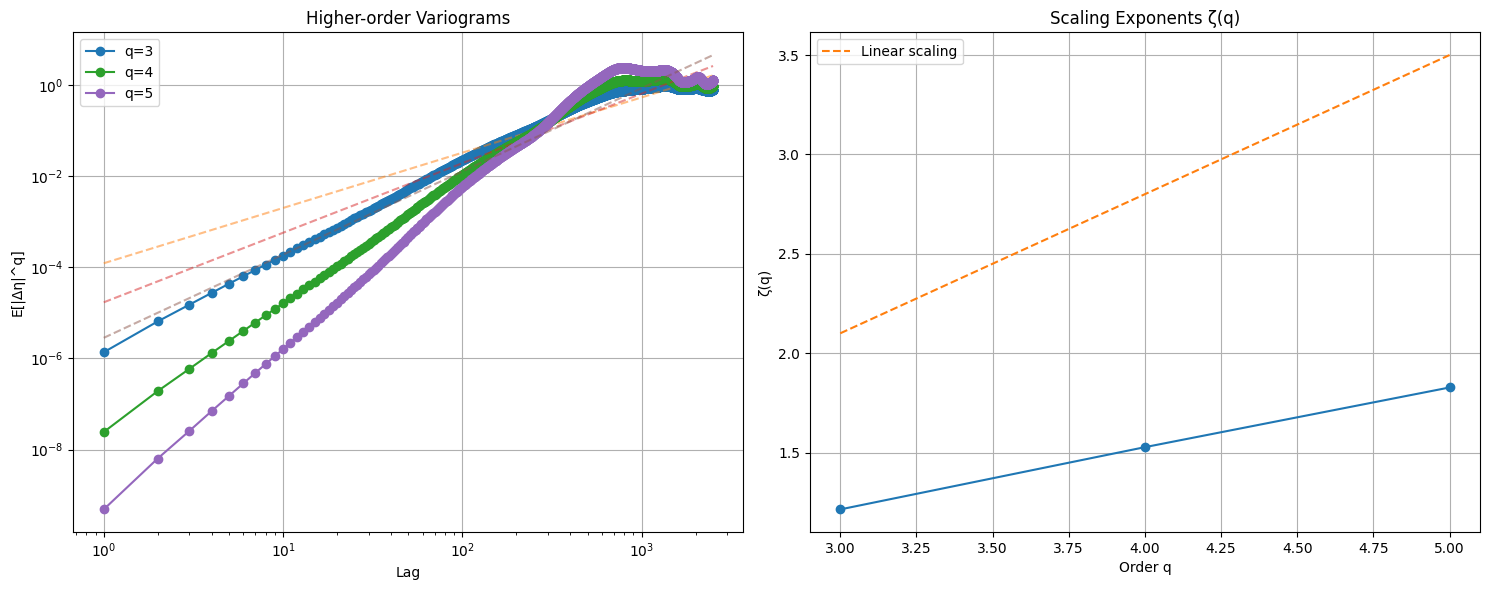

Orders: [3 4 5]
Scaling exponents: [1.2141216  1.52727396 1.82751176]
Expected exponents: [2.0999999999999996, 2.8, 3.5]
Relative difference: [0.42184686 0.45454501 0.47785378]

Analyzing scaling exponents for H = 0.5


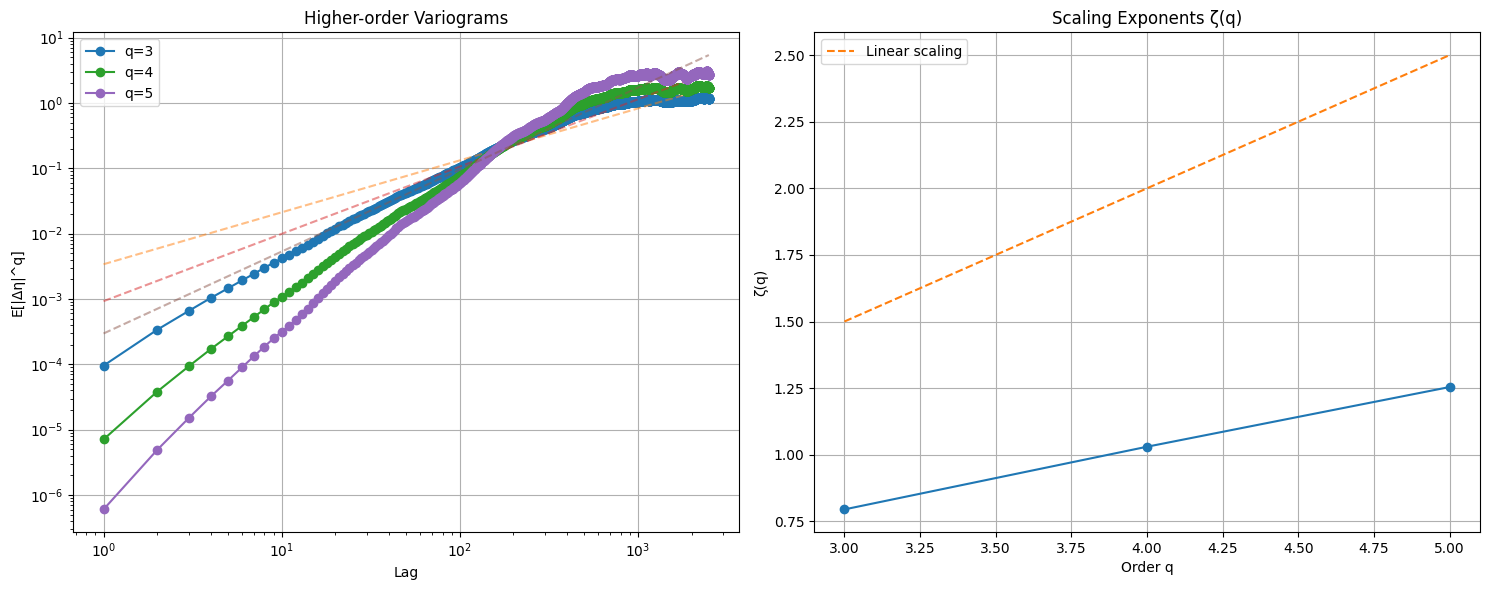

Orders: [3 4 5]
Scaling exponents: [0.79489007 1.03014997 1.25422728]
Expected exponents: [1.5, 2.0, 2.5]
Relative difference: [0.47007328 0.48492502 0.49830909]

Analyzing scaling exponents for H = 0.3


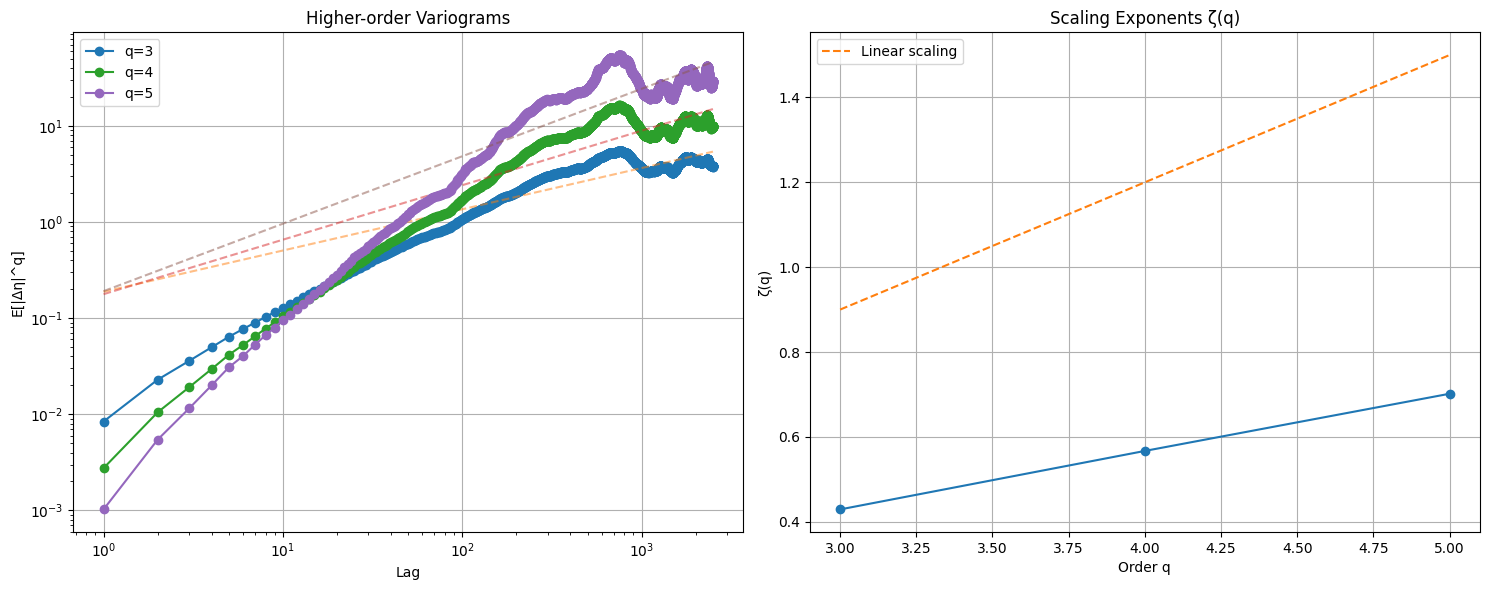

Orders: [3 4 5]
Scaling exponents: [0.42895536 0.56679151 0.70157438]
Expected exponents: [0.8999999999999999, 1.2, 1.5]
Relative difference: [0.52338293 0.52767374 0.53228374]

Analyzing scaling exponents for H = 0.1


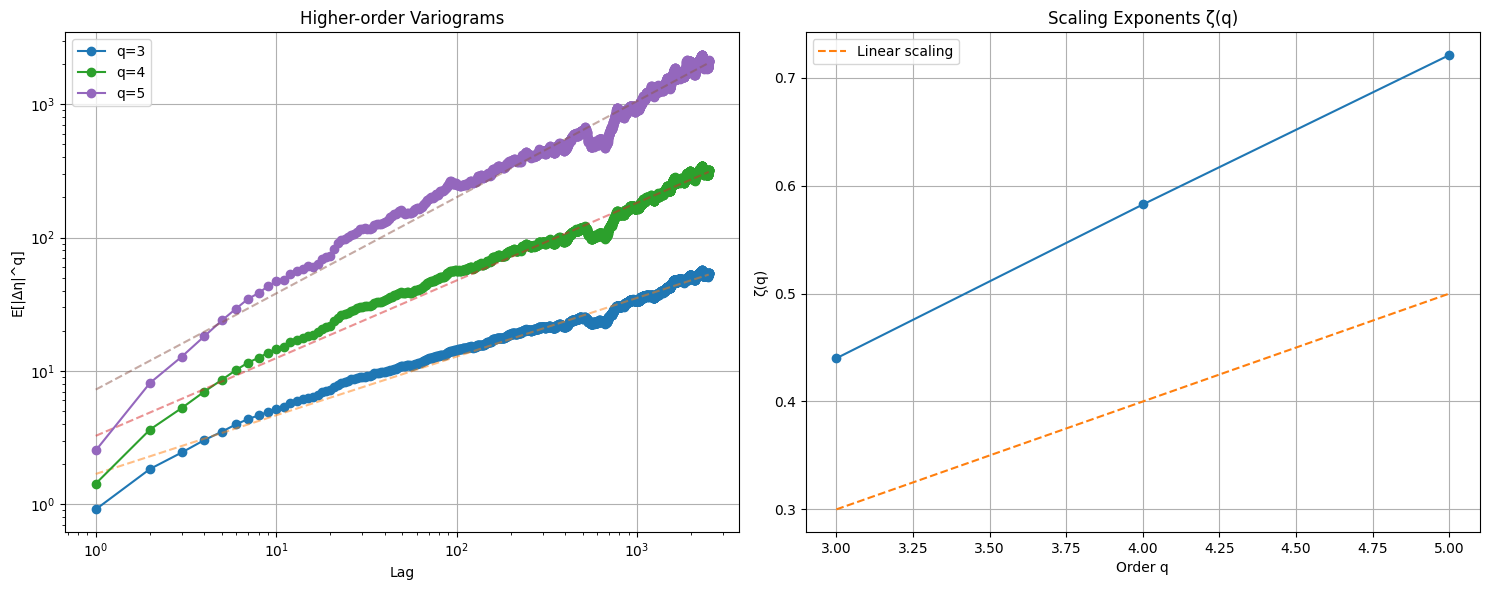

Orders: [3 4 5]
Scaling exponents: [0.44004616 0.58258452 0.72106595]
Expected exponents: [0.30000000000000004, 0.4, 0.5]
Relative difference: [0.46682053 0.45646129 0.4421319 ]

Analyzing H = 0.5 case (Brownian motion)...


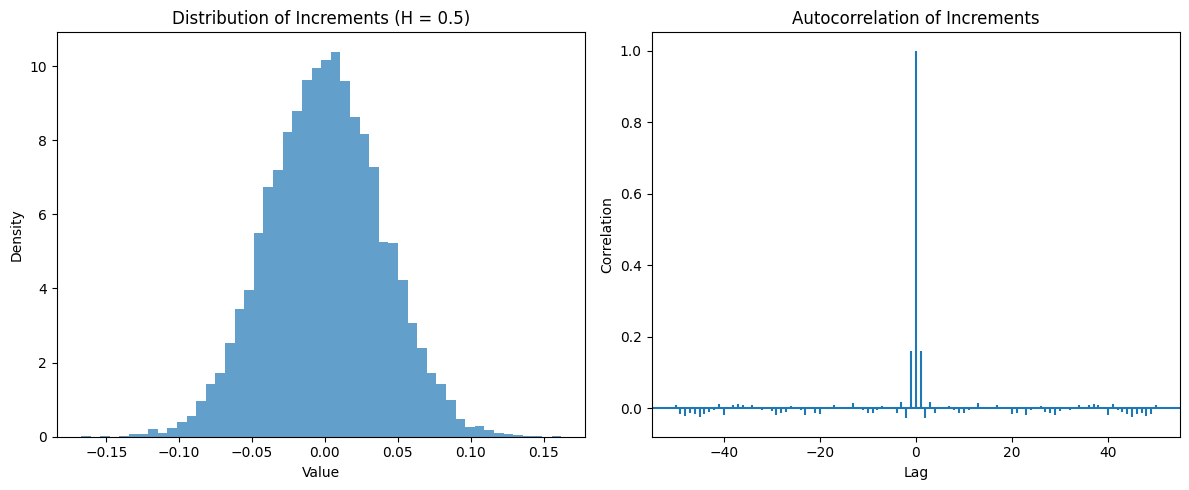

In [ ]:
def analyze_different_H(N=3000):
    """
    Generate and analyze Fractional Random Walks for different values of H.
    """
    H_values = [0.7, 0.5, 0.3, 0.1]
    processes = {}
    
    # Generate processes for different H values
    for H in H_values:
        print(f"Generating process for H = {H} and N = {N}")
        frw = FractionalRandomWalk(N, H)
        processes[H] = frw
        frw.generate_time_series()
    
    # Plot time series for each H
    print("\nPlotting time series...")
    plt.figure(figsize=(15, 10))
    for i, (H, frw) in enumerate(processes.items(), 1):
        plt.subplot(4, 1, i)
        plt.plot(frw.time_series[:1000])  # Plot first 1000 points of the time series
        plt.title(f'H = {H}')
        plt.xlabel('Time')
        plt.ylabel('$\eta_t$')
        plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Analyze correlation function for each H
    print("\nAnalyzing correlation functions...")
    for H, frw in processes.items():
        print(f"\nH = {H}")
        lags, corr = frw.plot_correlation_analysis(max_lag=1000)
        # Print some statistics about the correlation function
        print(f"Correlation at lag 1: {corr[1]:.4f}")
        print(f"Correlation decay rate: {(corr[1] - corr[10])/9:.4f} per unit lag")
    
    # Plot variograms
    plt.figure(figsize=(12, 8))
    for H, frw in processes.items():
        lags, variogram = frw.compute_variogram(max_lag=1000)
        plt.loglog(lags[1:], variogram[1:], label=f'H = {H}')
    
    # Add reference lines
    x = np.logspace(0, 3, 100)
    for H in H_values:
        y = x ** (2 * H) * 0.1
        plt.loglog(x, y, '--', alpha=0.5)
    
    plt.title('Variogram Analysis for Different H Values')
    plt.xlabel('Lag (l)')
    plt.ylabel('V(l)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Analyze higher-moment variograms for each H
    orders = [3, 4, 5]
    scaling_results = {}
    
    for H, frw in processes.items():
        print(f"\nAnalyzing scaling exponents for H = {H}")
        orders, exponents = frw.analyze_scaling_exponents(orders=orders)
        scaling_results[H] = exponents
        print("Orders:", orders)
        print("Scaling exponents:", exponents)
        print("Expected exponents:", [q * H for q in orders])
        print("Relative difference:", 
              np.abs(exponents - np.array([q * H for q in orders])) / (np.array([q * H for q in orders])))
    
    return processes, scaling_results

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    
    print("Analyzing Fractional Random Walks...")
    processes, scaling_results = analyze_different_H(3000)
    
    # Special case analysis for H = 0.5 (standard Brownian motion)
    print("\nAnalyzing H = 0.5 case (Brownian motion)...")
    frw_05 = processes[0.5]
    
    # Compute and plot increments
    increments = np.diff(frw_05.time_series)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(increments, bins=50, density=True, alpha=0.7)
    plt.title('Distribution of Increments (H = 0.5)')
    plt.xlabel('Value')
    plt.ylabel('Density')
    
    plt.subplot(1, 2, 2)
    plt.acorr(increments, maxlags=50)
    plt.title('Autocorrelation of Increments')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.tight_layout()
    plt.show() 

# Old

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
from src.gaussian_random_variables import validate_variance

In [2]:
N = 1000
theoretical, empirical, error = validate_variance(N, 500)

print(f"Theoretical variance: {theoretical:.6f}")
print(f"Empirical variance:   {empirical:.6f}")
print(f"Relative error:       {error:.6f}")
del(N, theoretical, empirical, error)

Theoretical variance: 3.285872
Empirical variance:   2.950454
Relative error:       0.102079


In [4]:
from src.fractional_walk import FractionalRandomWalk

H=0.1
H=0.3
H=0.5
H=0.7
H=0.9


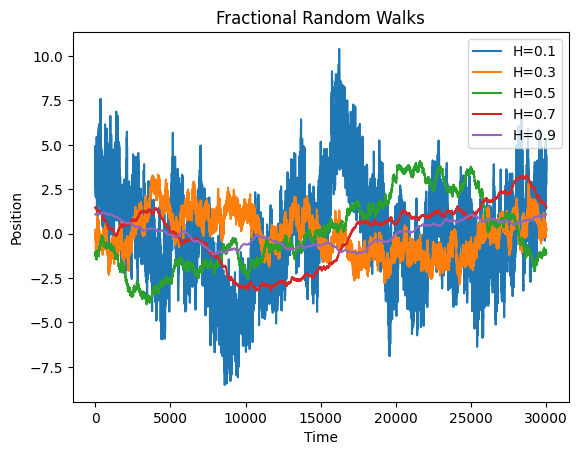

In [9]:
x_t = {}
H_values = [0.1, 0.3, 0.5, 0.7, 0.9]
for H in H_values:
    print(f"H={H}")
    frw = FractionalRandomWalk(N=30000, H=H)
    x_t[H] = frw.generate()
    plt.plot(x_t[H], label=f'H={H}')
plt.title('Fractional Random Walks')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

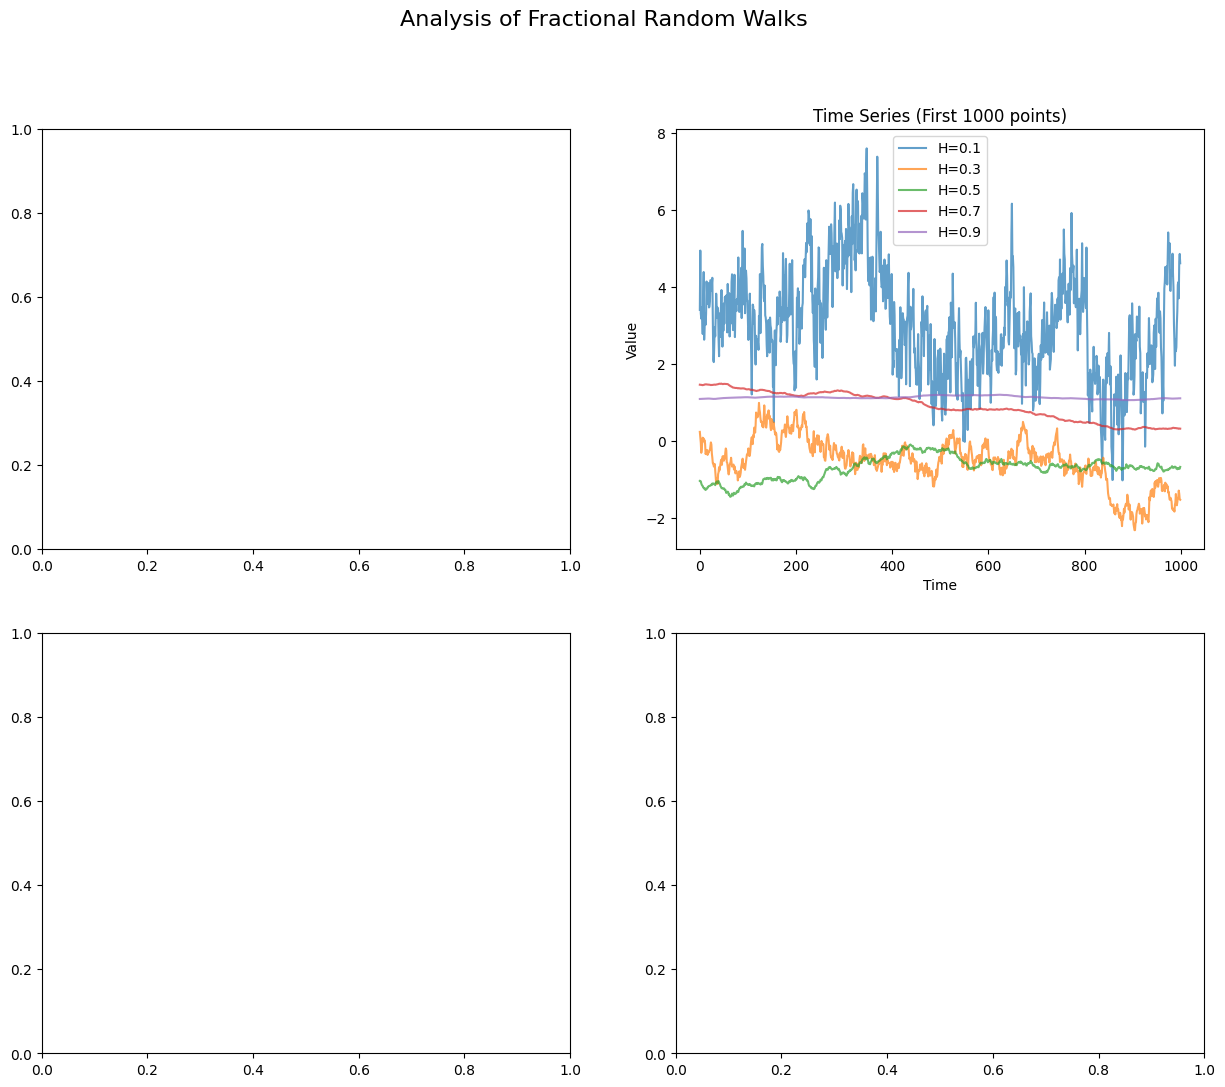

In [24]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Analysis of Fractional Random Walks', fontsize=16)

# 1. Plot time series
ax1 = axes[0, 1]
for H, series in x_t.items():
    ax1.plot(series[:1000], label=f'H={H}', alpha=0.7)  # Plot first 1000 points for clarity
ax1.set_title('Time Series (First 1000 points)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.legend()
ax1.grid(True, alpha=0)

In [ ]:
# from src.rough_volatility import RoughVolatilityModel
# from src.visualization import (
#     plot_fractional_walks,
#     plot_correlation_function,
#     plot_variogram_scaling,
#     plot_price_paths,
#     plot_return_distribution,
#     plot_drawdown_analysis
# )

In [ ]:
# def get_latest_data_file(pattern: str, subdir: str = 'raw') -> str:
#     """Get the path of the most recent data file matching the pattern."""
#     data_dir = f'data/{subdir}'
#     if not os.path.exists(data_dir):
#         return None
    
#     files = [f for f in os.listdir(data_dir) if f.startswith(pattern) and f.endswith('.csv')]
#     if not files:
#         return None
    
#     # Sort by timestamp (assuming format pattern_timestamp.csv)
#     files.sort(reverse=True)
#     return os.path.join(data_dir, files[0])

In [ ]:
# def load_or_generate_data(generate_func, filename: str, subdir: str = 'raw', **kwargs):
#     """Load existing data or generate new data if it doesn't exist."""
#     data_file = get_latest_data_file(filename, subdir)
    
#     if data_file and os.path.exists(data_file):
#         print(f"Loading existing data from {data_file}")
#         return pd.read_csv(data_file)
#     else:
#         print(f"Generating new data for {filename}")
#         return generate_func(**kwargs)

In [ ]:
# def save_data(data, filename, subdir='raw'):
#     """Save data to CSV file in the specified subdirectory"""
#     os.makedirs(f'data/{subdir}', exist_ok=True)
#     timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
#     filepath = f'data/{subdir}/{filename}_{timestamp}.csv'
#     data.to_csv(filepath, index=False)
#     print(f"Data saved to {filepath}")
#     return filepath

In [5]:
def analyze_variance(N: int = 1000, num_realizations: int = 10000):
    """Variance Analysis and Validation"""
    print("\nVariance Analysis")
    print("=" * 50)
    
    def generate_variance_data():
        theoretical, empirical, error = validate_variance(N, num_realizations)
        return pd.DataFrame({
            'N': [N],
            'num_realizations': [num_realizations],
            'theoretical_variance': [theoretical],
            'empirical_variance': [empirical],
            'relative_error': [error]
        })
    
    results = load_or_generate_data(generate_variance_data, 'variance_analysis', 'processed')
    
    print(f"Theoretical variance: {results['theoretical_variance'].iloc[0]:.6f}")
    print(f"Empirical variance:   {results['empirical_variance'].iloc[0]:.6f}")
    print(f"Relative error:       {results['relative_error'].iloc[0]:.6%}")


In [6]:
def analyze_fractional_walk(N: int = 30000):
    """Fractional Random Walk Analysis"""
    print("\nFractional Random Walk Analysis")
    print("=" * 50)
    
    # Generate processes for different H values
    H_values = [0.7, 0.5, 0.3, 0.1]
    print("\nGenerating fractional random walks for different H values...")
    
    def generate_fractional_walk(H):
        frw = FractionalRandomWalk(N=N, H=H)
        theta_t = frw.generate()
        return pd.DataFrame({
            'time': range(N),
            'theta_t': theta_t,
            'H': H
        })
    
    # Store all fractional walks
    all_walks = pd.DataFrame()
    
    for H in H_values:
        walk_data = load_or_generate_data(
            generate_fractional_walk,
            f'fractional_walk_H_{H}',
            'raw',
            H=H
        )
        all_walks = pd.concat([all_walks, walk_data])
    
    # Save combined dataset if it doesn't exist
    combined_file = get_latest_data_file('fractional_walks_combined', 'processed')
    if not combined_file:
        save_data(all_walks, 'fractional_walks_combined', 'processed')
    
    fig = plot_fractional_walks(H_values, N)
    plt.savefig('fractional_walks.png')
    
    print("Roughness ranking (from smoothest to roughest):")
    print("H = 0.7 (smoothest) > H = 0.5 > H = 0.3 > H = 0.1 (roughest)")
    
    # Analysis of Gaussian properties
    print("\nAnalysis of Gaussian properties:")
    print("The θt variables are Gaussian because:")
    print("- They are linear combinations of independent Gaussian variables (ωk and εk)")
    print("- Linear combinations of Gaussian variables are also Gaussian")
    print("- This follows from the properties of characteristic functions")
    
    # Correlation function and variogram analysis
    print("\nAnalyzing correlation function and variogram...")
    H = 0.3  # Example value
    frw = FractionalRandomWalk(N=N, H=H)
    
    def generate_correlation_data():
        return pd.DataFrame(frw.calculate_correlation_function())
    
    def generate_variogram_data():
        return pd.DataFrame(frw.calculate_variogram())
    
    # Load or generate correlation and variogram data
    corr_data = load_or_generate_data(generate_correlation_data, 'correlation_function', 'processed')
    variogram_data = load_or_generate_data(generate_variogram_data, 'variogram', 'processed')
    
    # Plot correlation function
    fig = plot_correlation_function(frw)
    plt.savefig('correlation_function.png')
    
    # Plot variogram scaling
    fig = plot_variogram_scaling(frw)
    plt.savefig('variogram_scaling.png')
    
    # Special case H = 1/2
    print("\nSpecial case H = 1/2:")
    print("- For H = 1/2, we recover standard Brownian motion")
    print("- The increments θt+1 - θt become independent")
    print("- This is because the correlation structure of ωk, εk gives variance ~ 1/k^2")
    print("- This leads to the characteristic uncorrelated increments of Brownian motion")
    
    # Numerical validation
    print("\nNumerical validation of scaling behavior...")
    scaling = frw.analyze_scaling(q_values=[2, 3, 4])
    
    def generate_scaling_data():
        return pd.DataFrame([
            {'q': q, 'empirical_slope': slope, 'theoretical_slope': q*H, 'r_squared': r2}
            for q, (slope, r2) in scaling.items()
        ])
    
    scaling_data = load_or_generate_data(generate_scaling_data, 'scaling_analysis', 'processed')
    
    for q, (slope, r2) in scaling.items():
        print(f"\nOrder q={q}:")
        print(f"Empirical scaling exponent: {slope:.3f}")
        print(f"Theoretical exponent (qH):  {q*H:.3f}")
        print(f"R-squared:                  {r2:.3f}")



In [7]:
def analyze_price_returns(N: int = 30000):
    """Price Returns and Rough Volatilities Analysis"""
    print("\nPrice Returns and Rough Volatilities Analysis")
    print("=" * 50)
    
    # Initialize parameters
    H = 0.1
    sigma = 1.0
    nu_values = [0.0, 0.3, 0.6]
    
    def generate_price_data(nu):
        model = RoughVolatilityModel(N=N, H=H, nu=nu, sigma=sigma)
        prices, returns = model.generate_price_path()
        volatility = model.calculate_volatility()
        min_len = min(len(prices), len(returns), len(volatility))
        prices = prices[:min_len]
        returns = returns[:min_len]
        volatility = volatility[:min_len]
        return pd.DataFrame({
            'time': range(min_len),
            'price': prices,
            'returns': returns,
            'volatility': volatility,
            'nu': [nu] * min_len,
            'H': [H] * min_len,
            'sigma': [sigma] * min_len
        })
    
    # Store all results
    all_results = pd.DataFrame()
    
    # Verify return variance
    print("\nVerifying variance of returns...")
    for nu in nu_values:
        price_data = load_or_generate_data(
            generate_price_data,
            f'price_returns_nu_{nu}',
            'raw',
            nu=nu
        )
        
        # Calculate statistics
        empirical_var = np.var(price_data['returns'])
        model = RoughVolatilityModel(N=N, H=H, nu=nu, sigma=sigma)
        stats = model.analyze_returns_distribution()
        max_dd, _ = model.calculate_drawdowns()
        
        # Store results
        results = pd.DataFrame({
            'nu': [nu],
            'theoretical_variance': [sigma**2],
            'empirical_variance': [empirical_var],
            'kurtosis': [stats['kurtosis']],
            'skewness': [stats['skewness']],
            'max_drawdown': [max_dd]
        })
        all_results = pd.concat([all_results, results])
        
        print(f"ν = {nu}:")
        print(f"Theoretical variance: {sigma**2:.6f}")
        print(f"Empirical variance:   {empirical_var:.6f}")
    
    # Save combined results if they don't exist
    combined_file = get_latest_data_file('price_returns_analysis', 'processed')
    if not combined_file:
        save_data(all_results, 'price_returns_analysis', 'processed')
    
    # Vol of vol interpretation
    print("\nVol of vol interpretation:")
    print("- ν controls the amplitude of volatility fluctuations")
    print("- Larger ν leads to more extreme volatility swings")
    print("- This creates more pronounced volatility clustering")
    
    # Generate and analyze price sequences
    print("\nGenerating price sequences...")
    for nu in nu_values:
        def generate_price_path_data(nu):
            model = RoughVolatilityModel(N=N, H=H, nu=nu, sigma=sigma)
            prices, returns = model.generate_price_path()
            return pd.DataFrame({
                'time': range(N),
                'price': prices,
                'returns': returns,
                'volatility': model.calculate_volatility(),
                'nu': nu
            })
        
        price_path_data = load_or_generate_data(
            generate_price_path_data,
            f'price_paths_nu_{nu}',
            'raw',
            nu=nu
        )
        
        model = RoughVolatilityModel(N=N, H=H, nu=nu, sigma=sigma)
        fig = plot_price_paths(model)
        plt.savefig(f'price_paths_nu_{nu}.png')
        
        # Analyze return distribution
        fig = plot_return_distribution(model)
        plt.savefig(f'return_dist_nu_{nu}.png')
    
    print("Intermittency observations:")
    print("- Larger ν leads to more pronounced volatility clustering")
    print("- Periods of high volatility become more extreme")
    print("- Quiet periods are interspersed with bursts of activity")
    
    # Correlation analysis
    print("\nAnalyzing return correlations and price variograms...")
    model = RoughVolatilityModel(N=N, H=H, nu=0.3, sigma=sigma)
    _, returns = model.generate_price_path()
    
    def generate_correlation_data():
        lags, corr = model.absolute_return_correlation()
        return pd.DataFrame({
            'lag': lags,
            'correlation': corr
        })
    
    corr_data = load_or_generate_data(generate_correlation_data, 'absolute_return_correlation', 'processed')
    
    plt.figure(figsize=(10, 6))
    plt.plot(corr_data['lag'], corr_data['correlation'])
    plt.title('Absolute Return Correlation')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.grid(True)
    plt.savefig('abs_return_corr.png')
    
    # Return distribution and drawdowns
    print("\nAnalyzing return distributions and drawdowns...")
    for nu in nu_values:
        model = RoughVolatilityModel(N=N, H=H, nu=nu, sigma=sigma)
        
        def generate_drawdown_data(nu):
            drawdowns = model.calculate_drawdowns()
            return pd.DataFrame({
                'time': range(len(drawdowns[1])),
                'drawdown': drawdowns[1],
                'nu': nu
            })
        
        drawdown_data = load_or_generate_data(
            generate_drawdown_data,
            f'drawdowns_nu_{nu}',
            'raw',
            nu=nu
        )
        
        fig = plot_drawdown_analysis(model)
        plt.savefig(f'drawdowns_nu_{nu}.png')
        
        # Get distribution statistics
        stats = model.analyze_returns_distribution()
        print(f"\nν = {nu}:")
        print(f"Kurtosis:    {stats['kurtosis']:.2f}")
        print(f"Skewness:    {stats['skewness']:.2f}")
        
        max_dd, _ = model.calculate_drawdowns()
        print(f"Max drawdown: {max_dd:.2%}")
    
    # Impact on option prices
    print("\nImpact on option prices (qualitative analysis):")
    print("\nHurst parameter H affects:")
    print("- Term structure of volatility")
    print("- Path roughness and therefore path-dependent options")
    print("- Mean reversion speed of volatility")
    
    print("\nVol of vol ν affects:")
    print("- Smile convexity")
    print("- Wing behavior")
    print("- Term structure of implied volatility")
    print("- Kurtosis of return distribution")



In [8]:
np.random.seed(42)
    
# Run all analyses
analyze_variance()


Variance Analysis
Loading existing data from data/processed/variance_analysis_20250519_105443.csv
Theoretical variance: 3.285872
Empirical variance:   3.265322
Relative error:       0.625418%



Fractional Random Walk Analysis

Generating fractional random walks for different H values...
Loading existing data from data/raw/fractional_walk_H_0.7_20250519_104521.csv
Loading existing data from data/raw/fractional_walk_H_0.5_20250519_104624.csv
Loading existing data from data/raw/fractional_walk_H_0.3_20250519_104728.csv
Loading existing data from data/raw/fractional_walk_H_0.1_20250519_104834.csv
Roughness ranking (from smoothest to roughest):
H = 0.7 (smoothest) > H = 0.5 > H = 0.3 > H = 0.1 (roughest)

Analysis of Gaussian properties:
The θt variables are Gaussian because:
- They are linear combinations of independent Gaussian variables (ωk and εk)
- Linear combinations of Gaussian variables are also Gaussian
- This follows from the properties of characteristic functions

Analyzing correlation function and variogram...
Generating new data for correlation_function
Generating new data for variogram

Special case H = 1/2:
- For H = 1/2, we recover standard Brownian motion
- The i

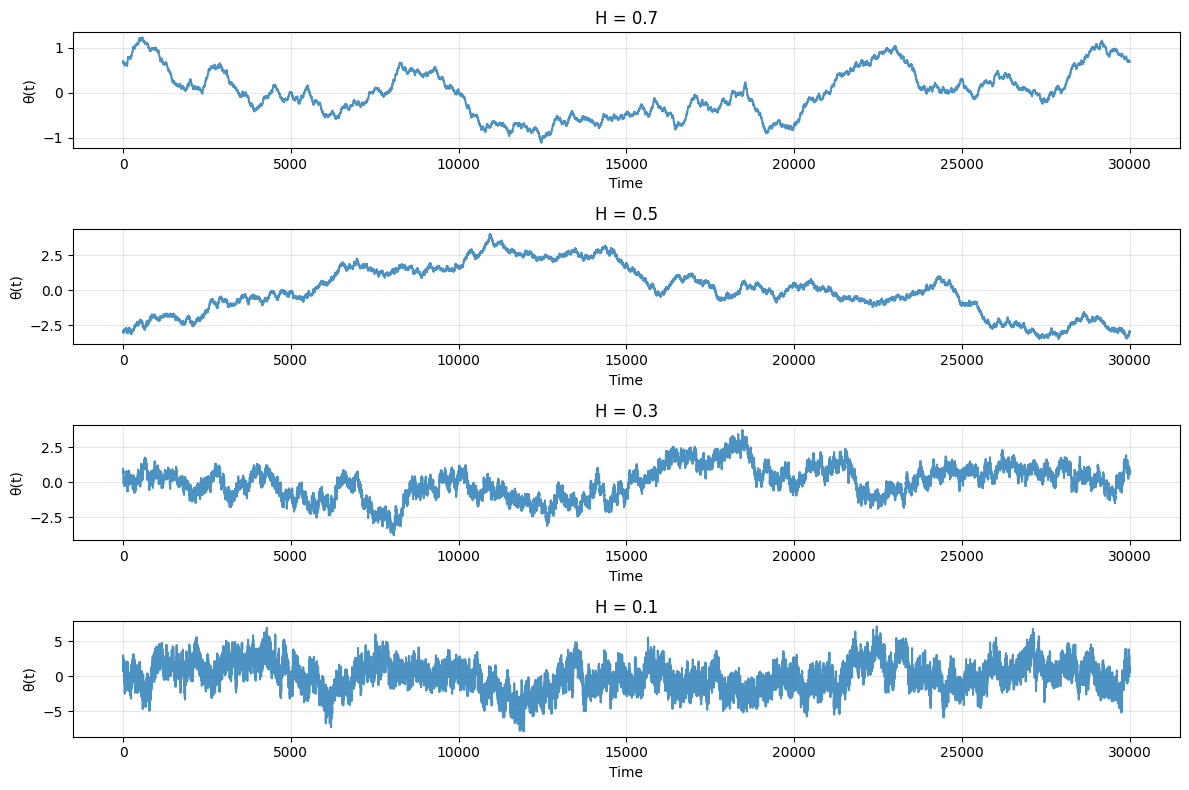

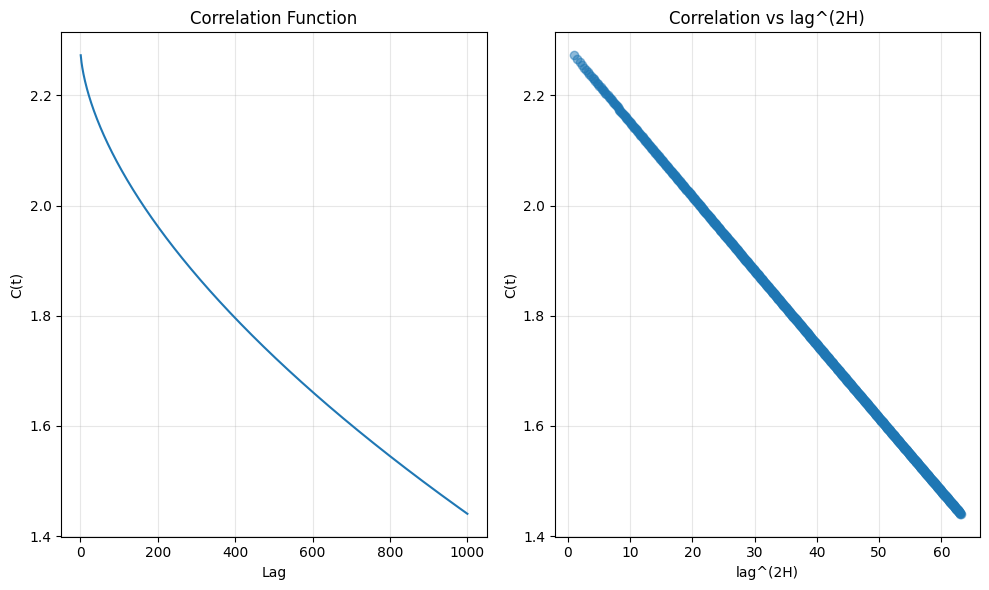

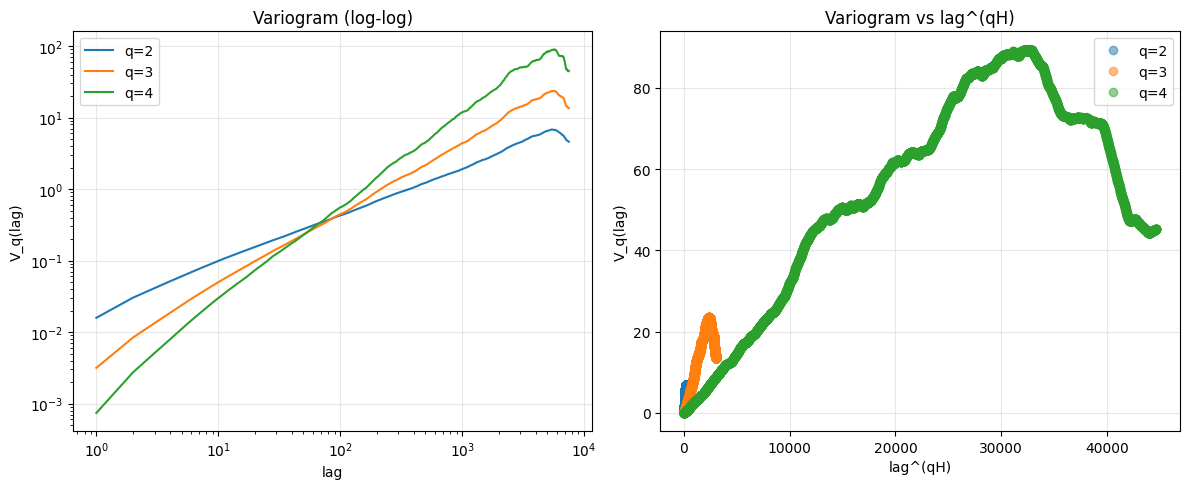

In [9]:
analyze_fractional_walk()

In [10]:
analyze_price_returns()


Price Returns and Rough Volatilities Analysis

Verifying variance of returns...
Generating new data for price_returns_nu_0.0
ν = 0.0:
Theoretical variance: 1.000000
Empirical variance:   1.007184
Generating new data for price_returns_nu_0.3
ν = 0.3:
Theoretical variance: 1.000000
Empirical variance:   7.204933
Generating new data for price_returns_nu_0.6
ν = 0.6:
Theoretical variance: 1.000000
Empirical variance:   46.232183
Data saved to data/processed/price_returns_analysis_20250519_114948.csv

Vol of vol interpretation:
- ν controls the amplitude of volatility fluctuations
- Larger ν leads to more extreme volatility swings
- This creates more pronounced volatility clustering

Generating price sequences...
Generating new data for price_paths_nu_0.0


ValueError: All arrays must be of the same length

In [ ]:
plt.show()